## Capstone Project: Fraud Detection Model Evaluation

Goal is to find model that suits best for Bank transaction Fraud detection.


In [2]:
# Optional dependency installation (safe to run multiple times)
try:
    from numerize.numerize import numerize  # noqa: F401
except Exception:
    import sys
    !{sys.executable} -m pip -q install numerize

## 1. Setup

In [4]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from numerize.numerize import numerize

In [5]:
# Setting the default size and dpi level of the plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 250

# Setting the default size of the plot title and axis labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12

# Setting the default weight of the plot title and axis labels
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["axes.labelweight"] = 'bold'

# To show all columns
pd.set_option("display.max_columns", None)

## 2. Data Loading

In [7]:
# Reading data from the file: 'synthetic_fraud_dataset.csv'
transactions_df = pd.read_csv("data/synthetic_fraud_dataset.csv")
transactions_df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  Previous_Fraudulent_Activity  \
0            Travel                0                             0   
1          Clothing                0                             0   
2       Restaurants                0                             0   
3          Clothing                0                             0   
4       Electronics                0                             1   

   Daily_Transaction_Count  Avg_Transaction_Amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   Failed_Transaction_Count_7d   Card_Type  Card_Age  Transaction_Distance  \
0                            3        Amex        65                883.17   
1                            4  Mastercard       186               2203.36   
2                            4        Visa       226               1909.29   
3                            4        Visa        76               1311.86   
4                            4  Mastercard       140                966.98   

  Authentication_Method  Risk_Score  Is_Weekend  Fraud_Label  
0             Biometric      0.8494           0            0  
1              Password      0.0959           0            1  
2             Biometric      0.8400           0            1  
3                   OTP      0.7935           0            1  
4              Password      0.3819           1            1

In [8]:
# Renaming columns to lower case
transactions_df.columns = [
    'transaction_id', 'user_id', 'transaction_amount', 'transaction_method', 'transaction_timestamp', 'account_balance', 
    'device_type', 'transaction_location', 'merchant_category', 'ip_address_flag', 'previous_fraudulent_activities', 
    'daily_transaction_count', 'avg_transaction_amount_7d', 'failed_transaction_count_7d', 'card_type', 'card_age_months', 
    'transaction_distance', 'authentication_method', 'fraud_risk_score', 'is_weekend', 'fraud_label'
]

In [9]:
# Checking the statistics of each numerical column
transactions_df.describe().T

count          mean           std       min  \
transaction_amount              50000.0     99.411012     98.687292    0.0000   
account_balance                 50000.0  50294.065981  28760.458557  500.4800   
ip_address_flag                 50000.0      0.050200      0.218360    0.0000   
previous_fraudulent_activities  50000.0      0.098400      0.297858    0.0000   
daily_transaction_count         50000.0      7.485240      4.039637    1.0000   
avg_transaction_amount_7d       50000.0    255.271924    141.382279   10.0000   
failed_transaction_count_7d     50000.0      2.003540      1.414273    0.0000   
card_age_months                 50000.0    119.999940     68.985817    1.0000   
transaction_distance            50000.0   2499.164155   1442.013834    0.2500   
fraud_risk_score                50000.0      0.501556      0.287774    0.0001   
is_weekend                      50000.0      0.299640      0.458105    0.0000   
fraud_label                     50000.0      0.321340      0.466996    0.0000   

                                       25%          50%           75%  \
transaction_amount                 28.6775     69.66000    138.852500   
account_balance                 25355.9950  50384.43000  75115.135000   
ip_address_flag                     0.0000      0.00000      0.000000   
previous_fraudulent_activities      0.0000      0.00000      0.000000   
daily_transaction_count             4.0000      7.00000     11.000000   
avg_transaction_amount_7d         132.0875    256.08500    378.032500   
failed_transaction_count_7d         1.0000      2.00000      3.000000   
card_age_months                    60.0000    120.00000    180.000000   
transaction_distance             1256.4975   2490.78500   3746.395000   
fraud_risk_score                    0.2540      0.50225      0.749525   
is_weekend                          0.0000      0.00000      1.000000   
fraud_label                         0.0000      0.00000      1.000000   

                                     max  
transaction_amount               1174.14  
account_balance                 99998.31  
ip_address_flag                     1.00  
previous_fraudulent_activities      1.00  
daily_transaction_count            14.00  
avg_transaction_amount_7d         500.00  
failed_transaction_count_7d         4.00  
card_age_months                   239.00  
transaction_distance             4999.93  
fraud_risk_score                    1.00  
is_weekend                          1.00  
fraud_label                         1.00

In [10]:
# Checking the statistics of each categorical columns
transactions_df.describe(include='object').T

count unique                  top   freq
transaction_id         50000  50000            TXN_33553      1
user_id                50000   8963            USER_6599     16
transaction_method     50000      4                  POS  12549
transaction_timestamp  50000  47724  2023-06-04 06:35:00      4
device_type            50000      3               Tablet  16779
transaction_location   50000      5                Tokyo  10208
merchant_category      50000      5             Clothing  10033
card_type              50000      4           Mastercard  12693
authentication_method  50000      4            Biometric  12591

In [11]:
# Checking the datatypes
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  50000 non-null  object 
 1   user_id                         50000 non-null  object 
 2   transaction_amount              50000 non-null  float64
 3   transaction_method              50000 non-null  object 
 4   transaction_timestamp           50000 non-null  object 
 5   account_balance                 50000 non-null  float64
 6   device_type                     50000 non-null  object 
 7   transaction_location            50000 non-null  object 
 8   merchant_category               50000 non-null  object 
 9   ip_address_flag                 50000 non-null  int64  
 10  previous_fraudulent_activities  50000 non-null  int64  
 11  daily_transaction_count         50000 non-null  int64  
 12  avg_transaction_amount_7d       

In [12]:
(transactions_df['fraud_label']
 .value_counts(normalize=True)
 .mul(100)
 .round(2)
 .astype(str) + '%')

fraud_label
0    67.87%
1    32.13%
Name: proportion, dtype: object

In [13]:
# Checking the number of null values in each column
transactions_df.isnull().sum()

transaction_id                    0
user_id                           0
transaction_amount                0
transaction_method                0
transaction_timestamp             0
account_balance                   0
device_type                       0
transaction_location              0
merchant_category                 0
ip_address_flag                   0
previous_fraudulent_activities    0
daily_transaction_count           0
avg_transaction_amount_7d         0
failed_transaction_count_7d       0
card_type                         0
card_age_months                   0
transaction_distance              0
authentication_method             0
fraud_risk_score                  0
is_weekend                        0
fraud_label                       0
dtype: int64

In [14]:
# Checking the number of duplicate rows
transactions_df.duplicated().sum()

0

In [15]:
# Creating a function for annotating bars
def annotate_bars(ax, decimal=True, type = None):
    """
    Function for annotating bars.

    Parameters:
        - ax: The axis object of the plot.
        - decimal: Whether to show decimals in the annotation.
        - type: The type of the plot.
    """
    
    # Loop through each bar
    for bar in ax.patches:
        height = bar.get_height()

        # Check if the height is greater than or equal to 1000 for numerization
        if height >= 1000:
            
            # Numerize the value
            value = numerize(height)
            
            if not decimal:
                value = f"{round(float(value[:-1]))}{value[-1]}"
            else:
                value = f"{round(float(value[:-1]), 1)}{value[-1]}"

        elif 0 < height < 1000:
            
            # For smaller values
            if not decimal:
                value = round(height)
            else:
                value = round(height, 1)


            if type == "percent":
                value = f"{value}%"

        if height > 0:
            # Annotate the bar with the computed value
            ax.annotate(
                value,
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontweight='bold'
            )

## 3. Exploratory Data Analysis

This section explores key patterns in the dataset (e.g., class imbalance, transaction behavior by time/category).

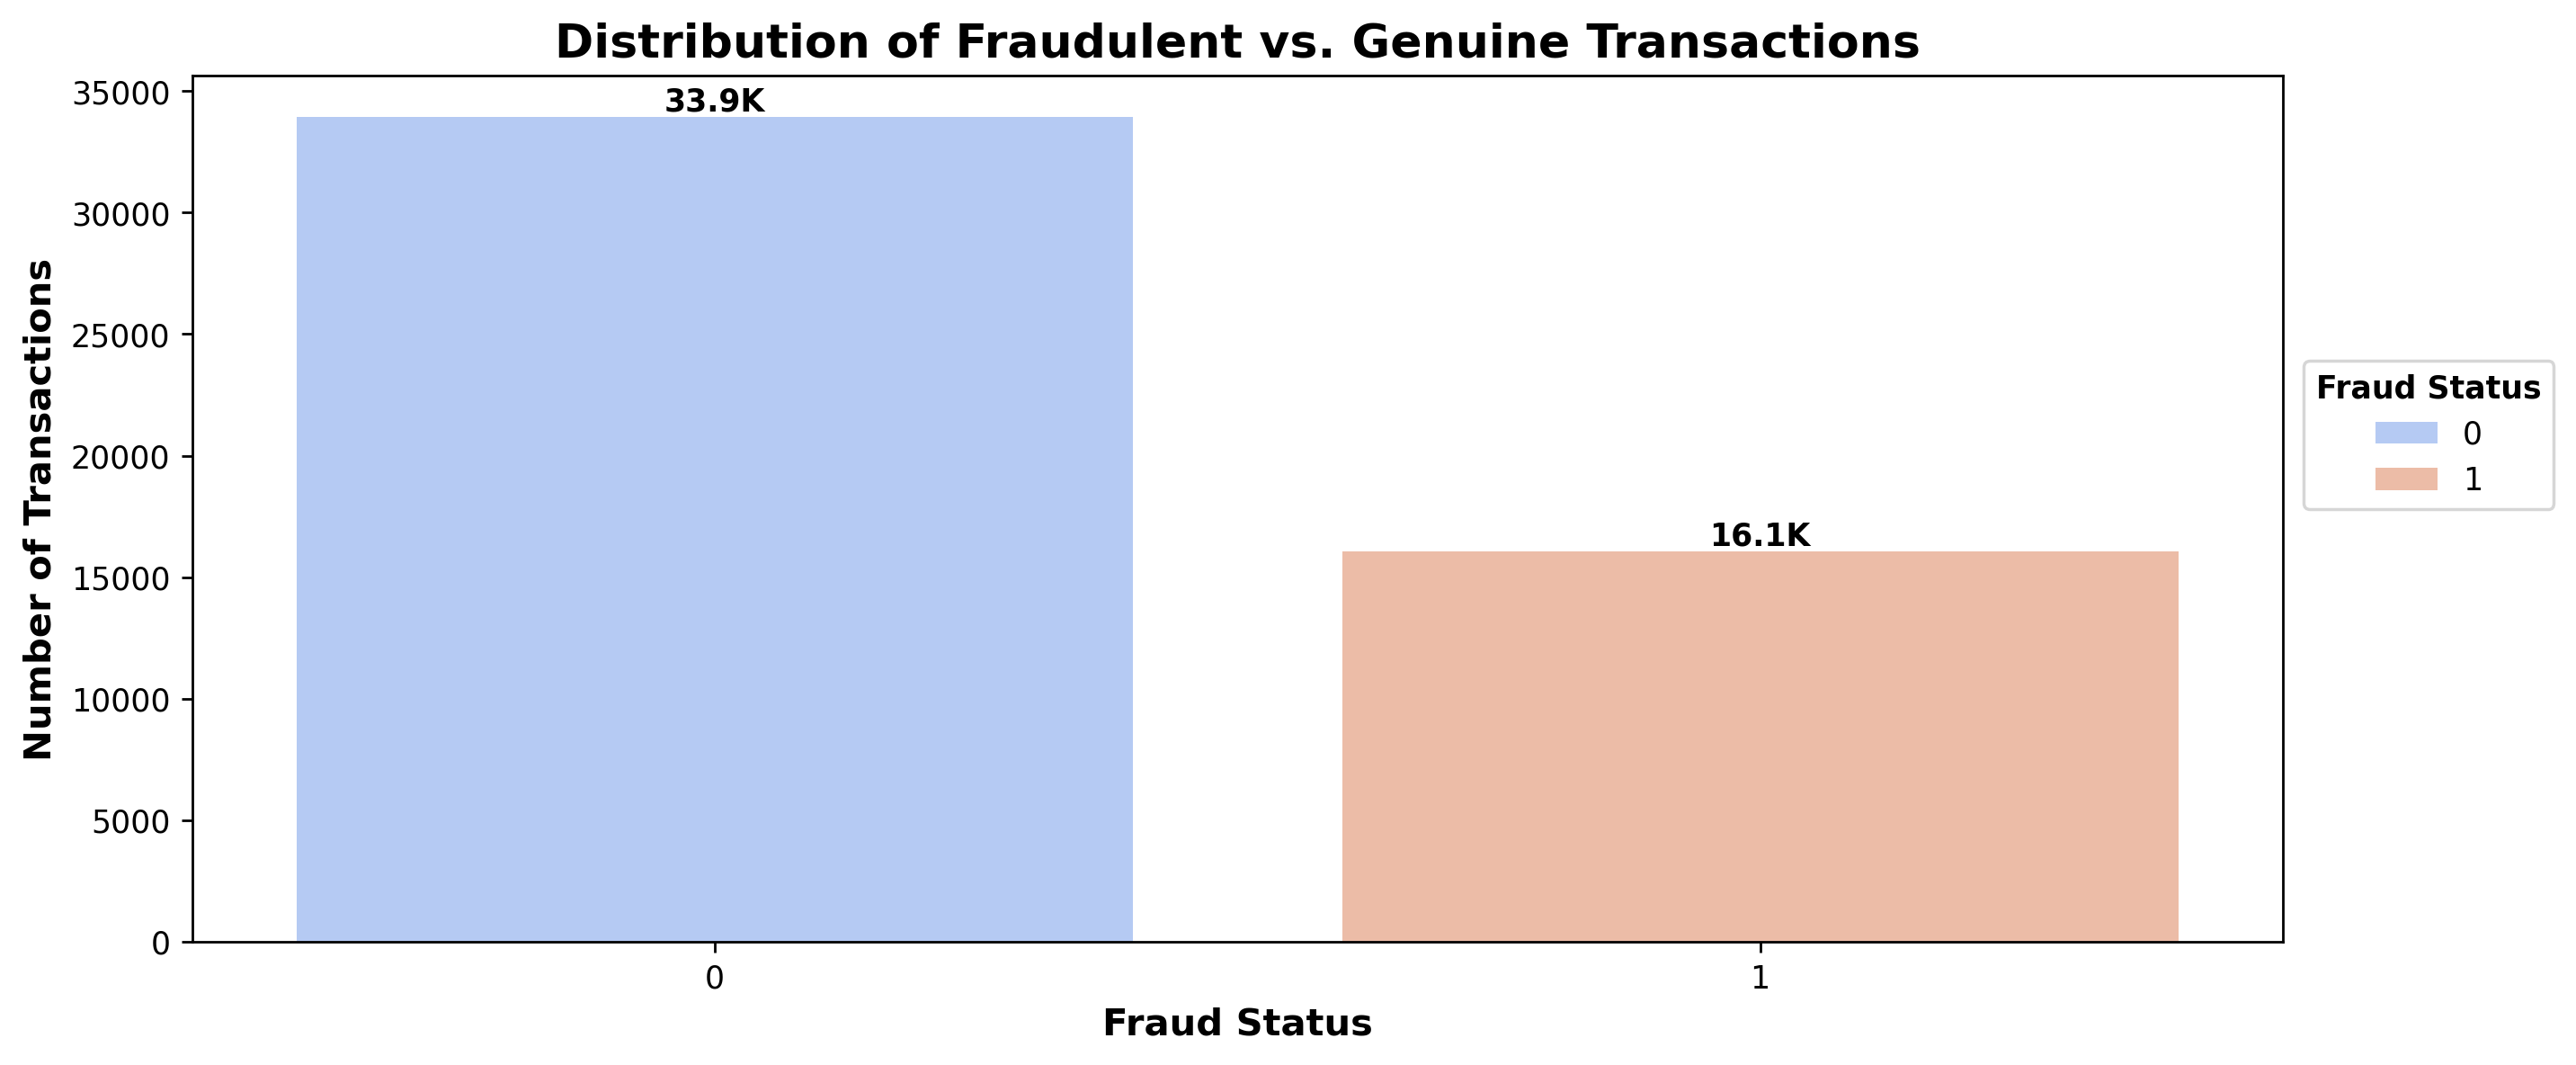

In [17]:
# Checking the number of fraudulent transactions compared to genuine ones
ax = sns.countplot(
    data = transactions_df,
    x = "fraud_label",
    hue = "fraud_label",
    palette = 'coolwarm',
    dodge = False
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Fraudulent vs. Genuine Transactions")
plt.xlabel("Fraud Status")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

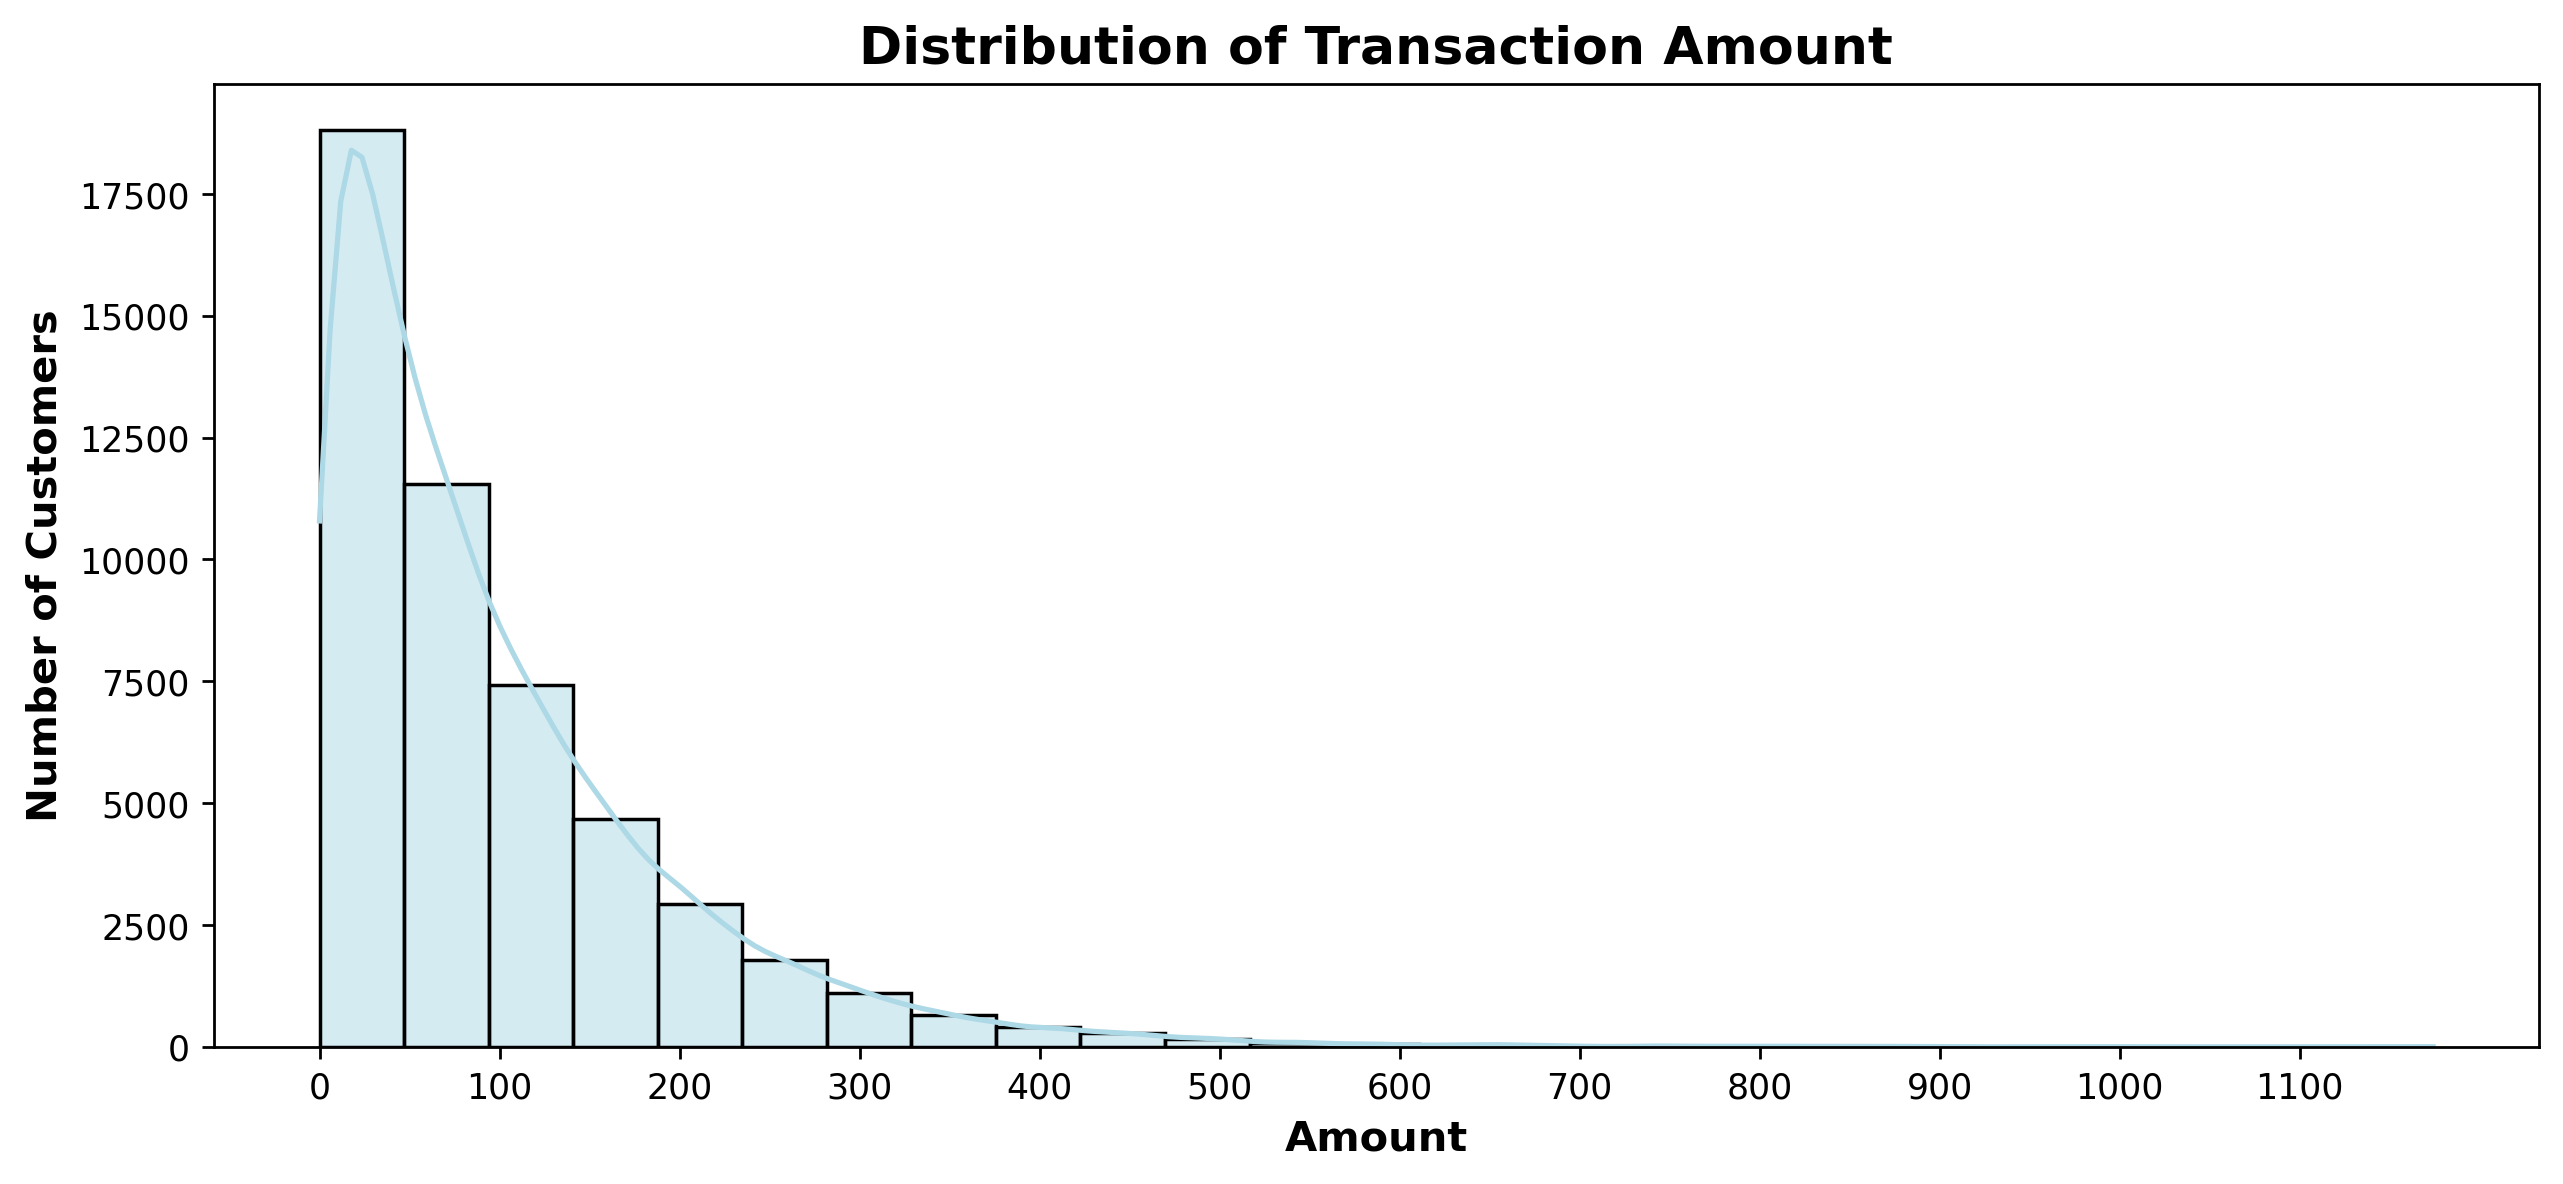

In [18]:
# Checking the distribution of transaction amount
sns.histplot(
    data = transactions_df,
    x = "transaction_amount",
    bins = 25,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Number of Customers")

# Changing the Xtick values
min_value = int(transactions_df['transaction_amount'].min())
max_value = int(transactions_df['transaction_amount'].max())
plt.xticks(range(min_value, max_value, 100));

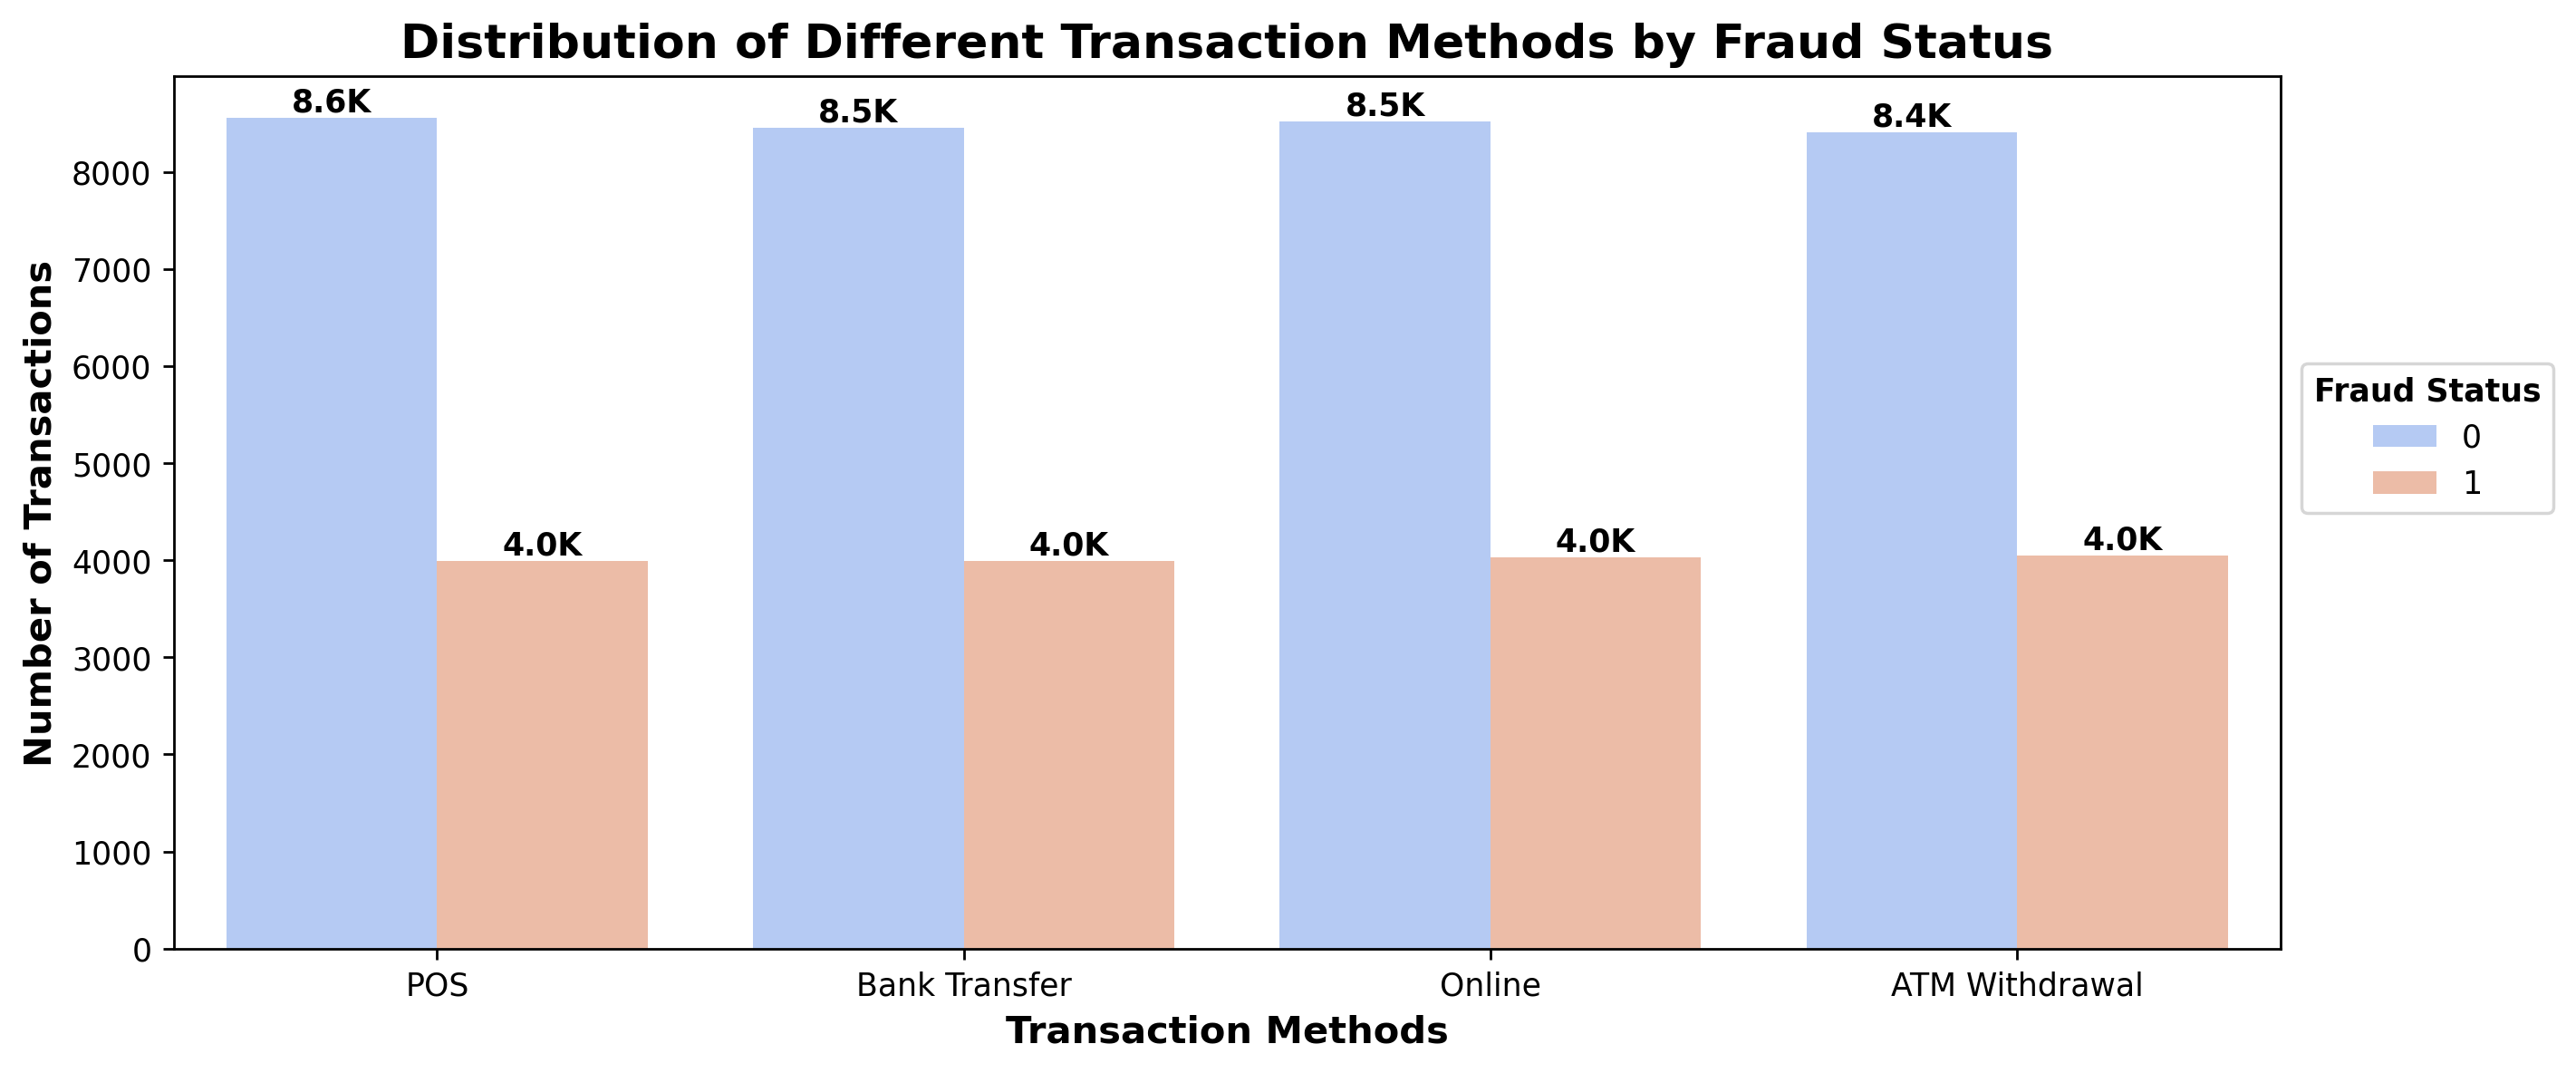

In [19]:
# Checking the distribution of different transaction methods by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "transaction_method",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Different Transaction Methods by Fraud Status")
plt.xlabel("Transaction Methods")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

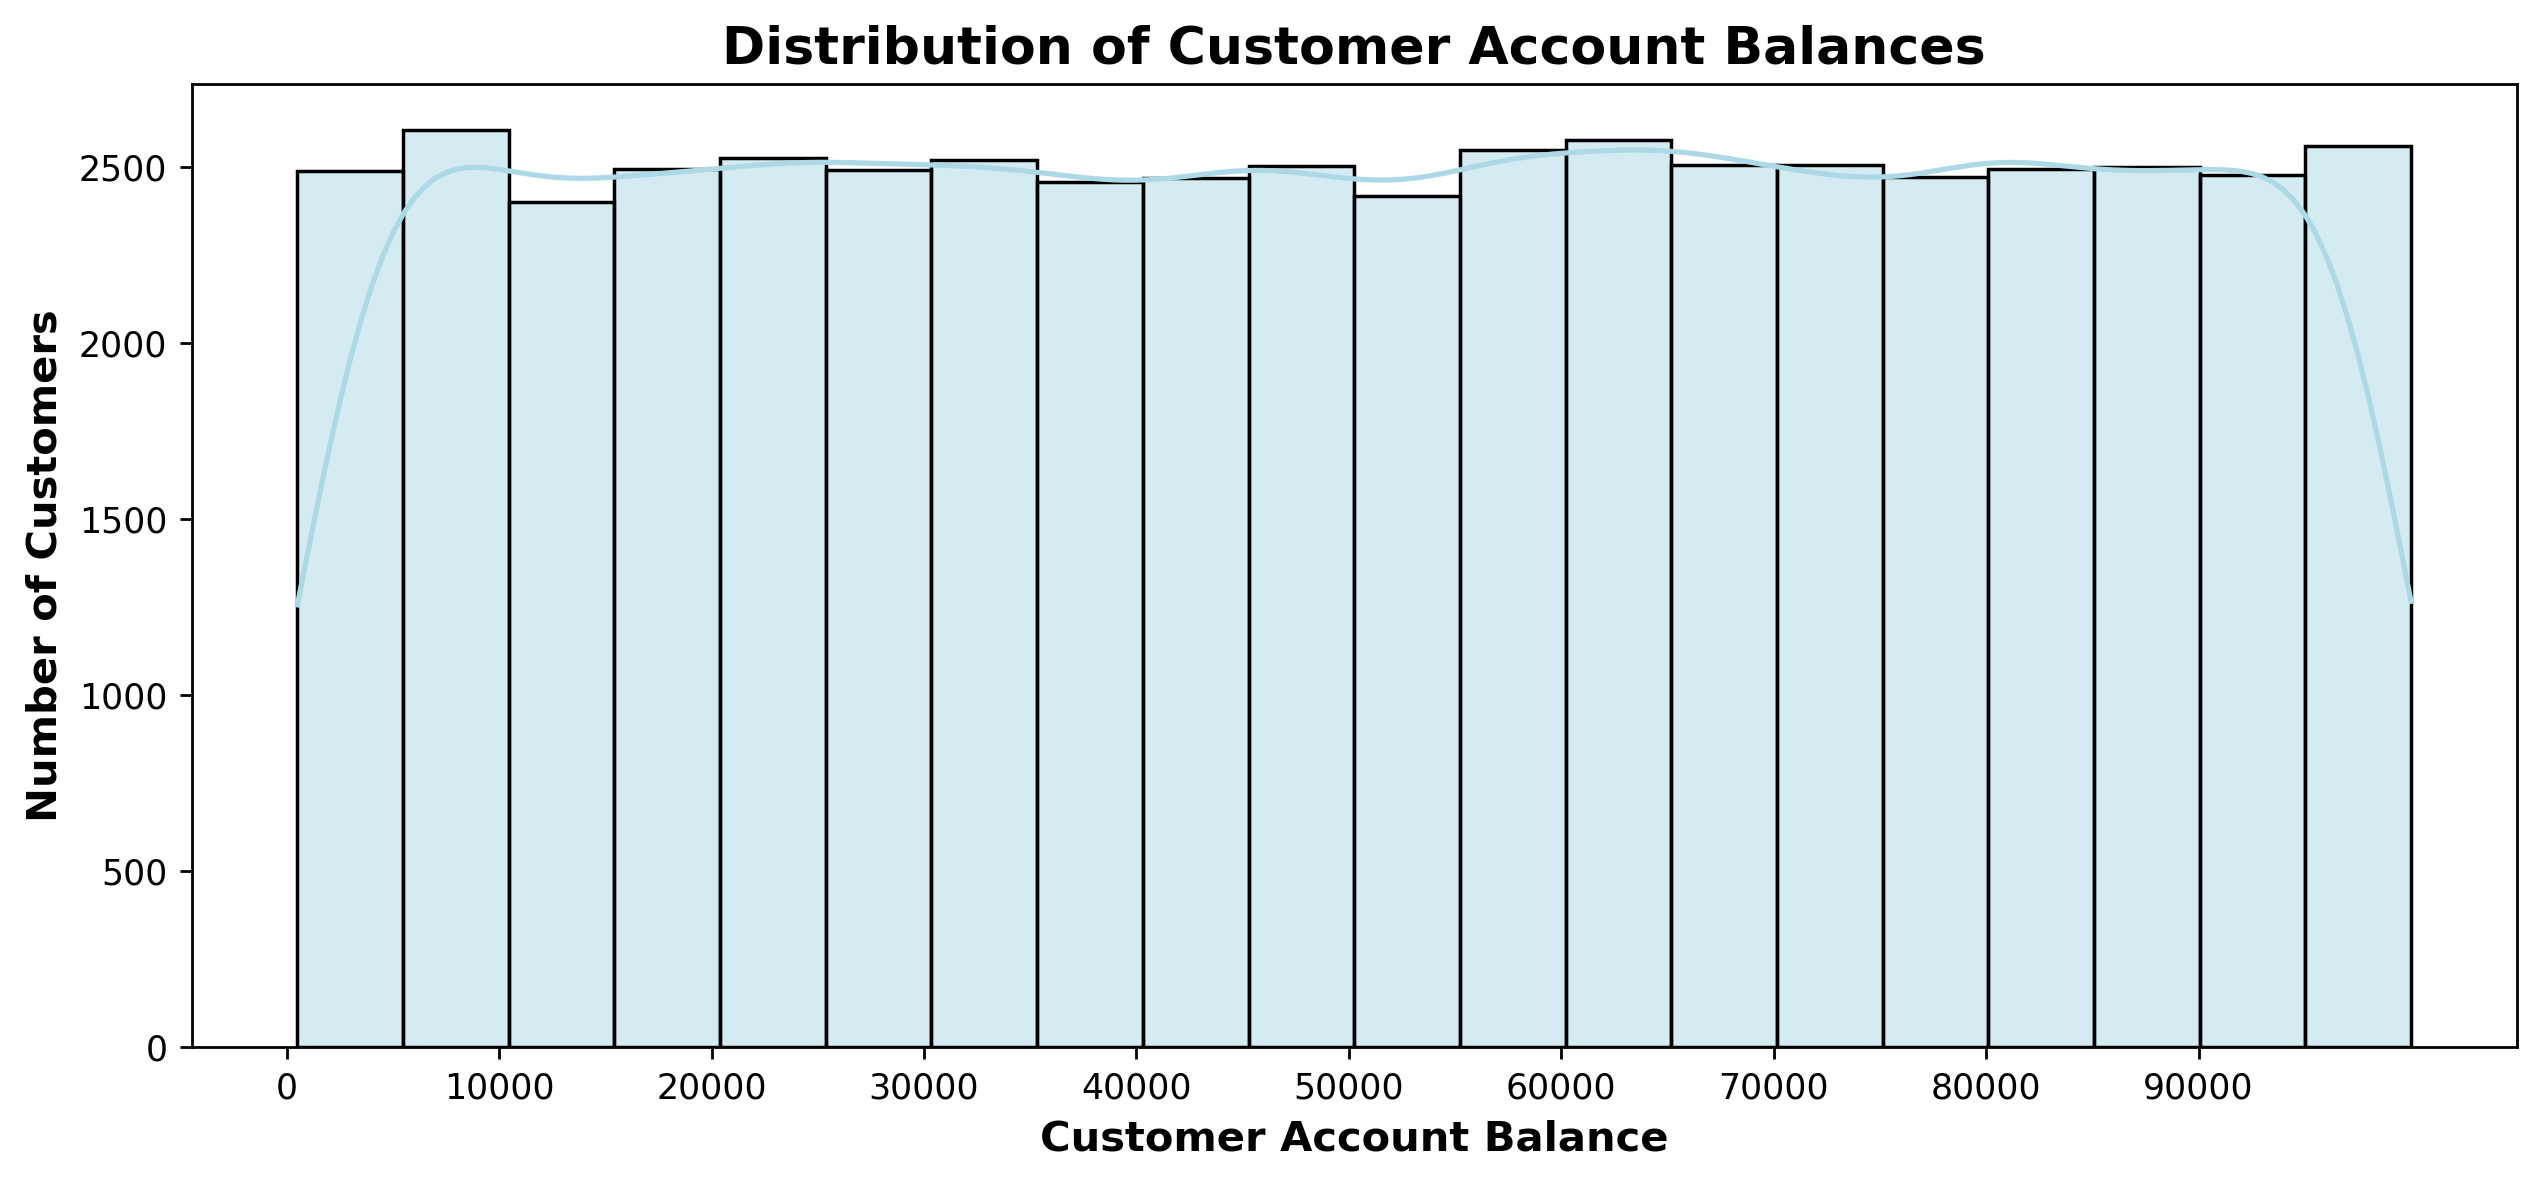

In [20]:
# Checking the distribution of account balances of customers
sns.histplot(
    data = transactions_df,
    x = "account_balance",
    bins = 20,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Customer Account Balances")
plt.xlabel("Customer Account Balance")
plt.ylabel("Number of Customers")

# Changing the Xtick values
min_value = int(transactions_df['account_balance'].min())
max_value = int(transactions_df['account_balance'].max())
plt.xticks(range(0, max_value, 10000));

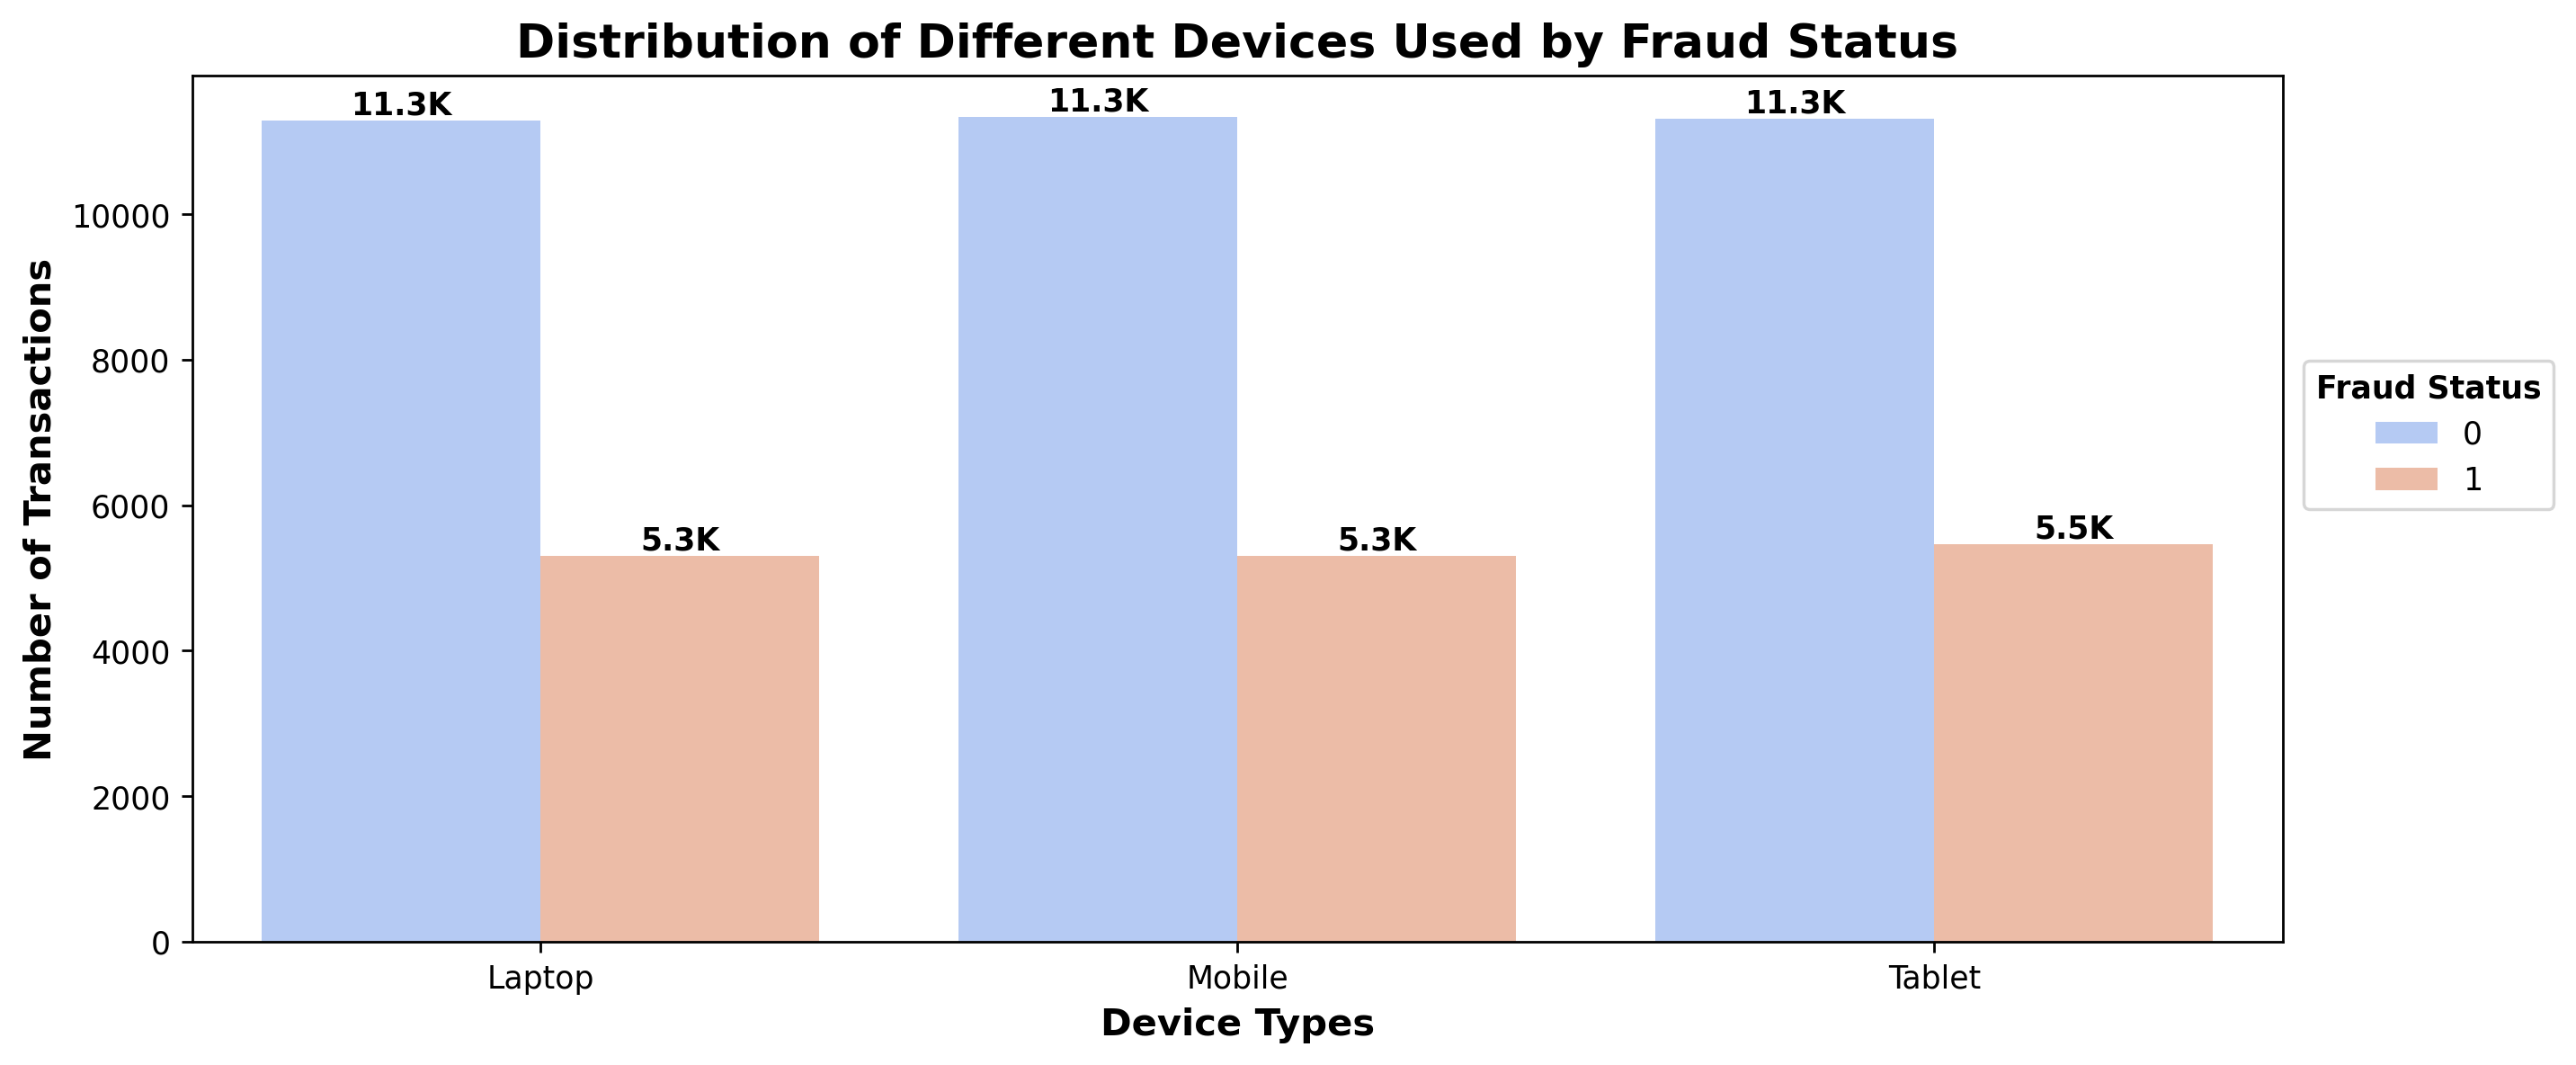

In [21]:
# Checking the distribution of device types by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "device_type",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Different Devices Used by Fraud Status")
plt.xlabel("Device Types")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

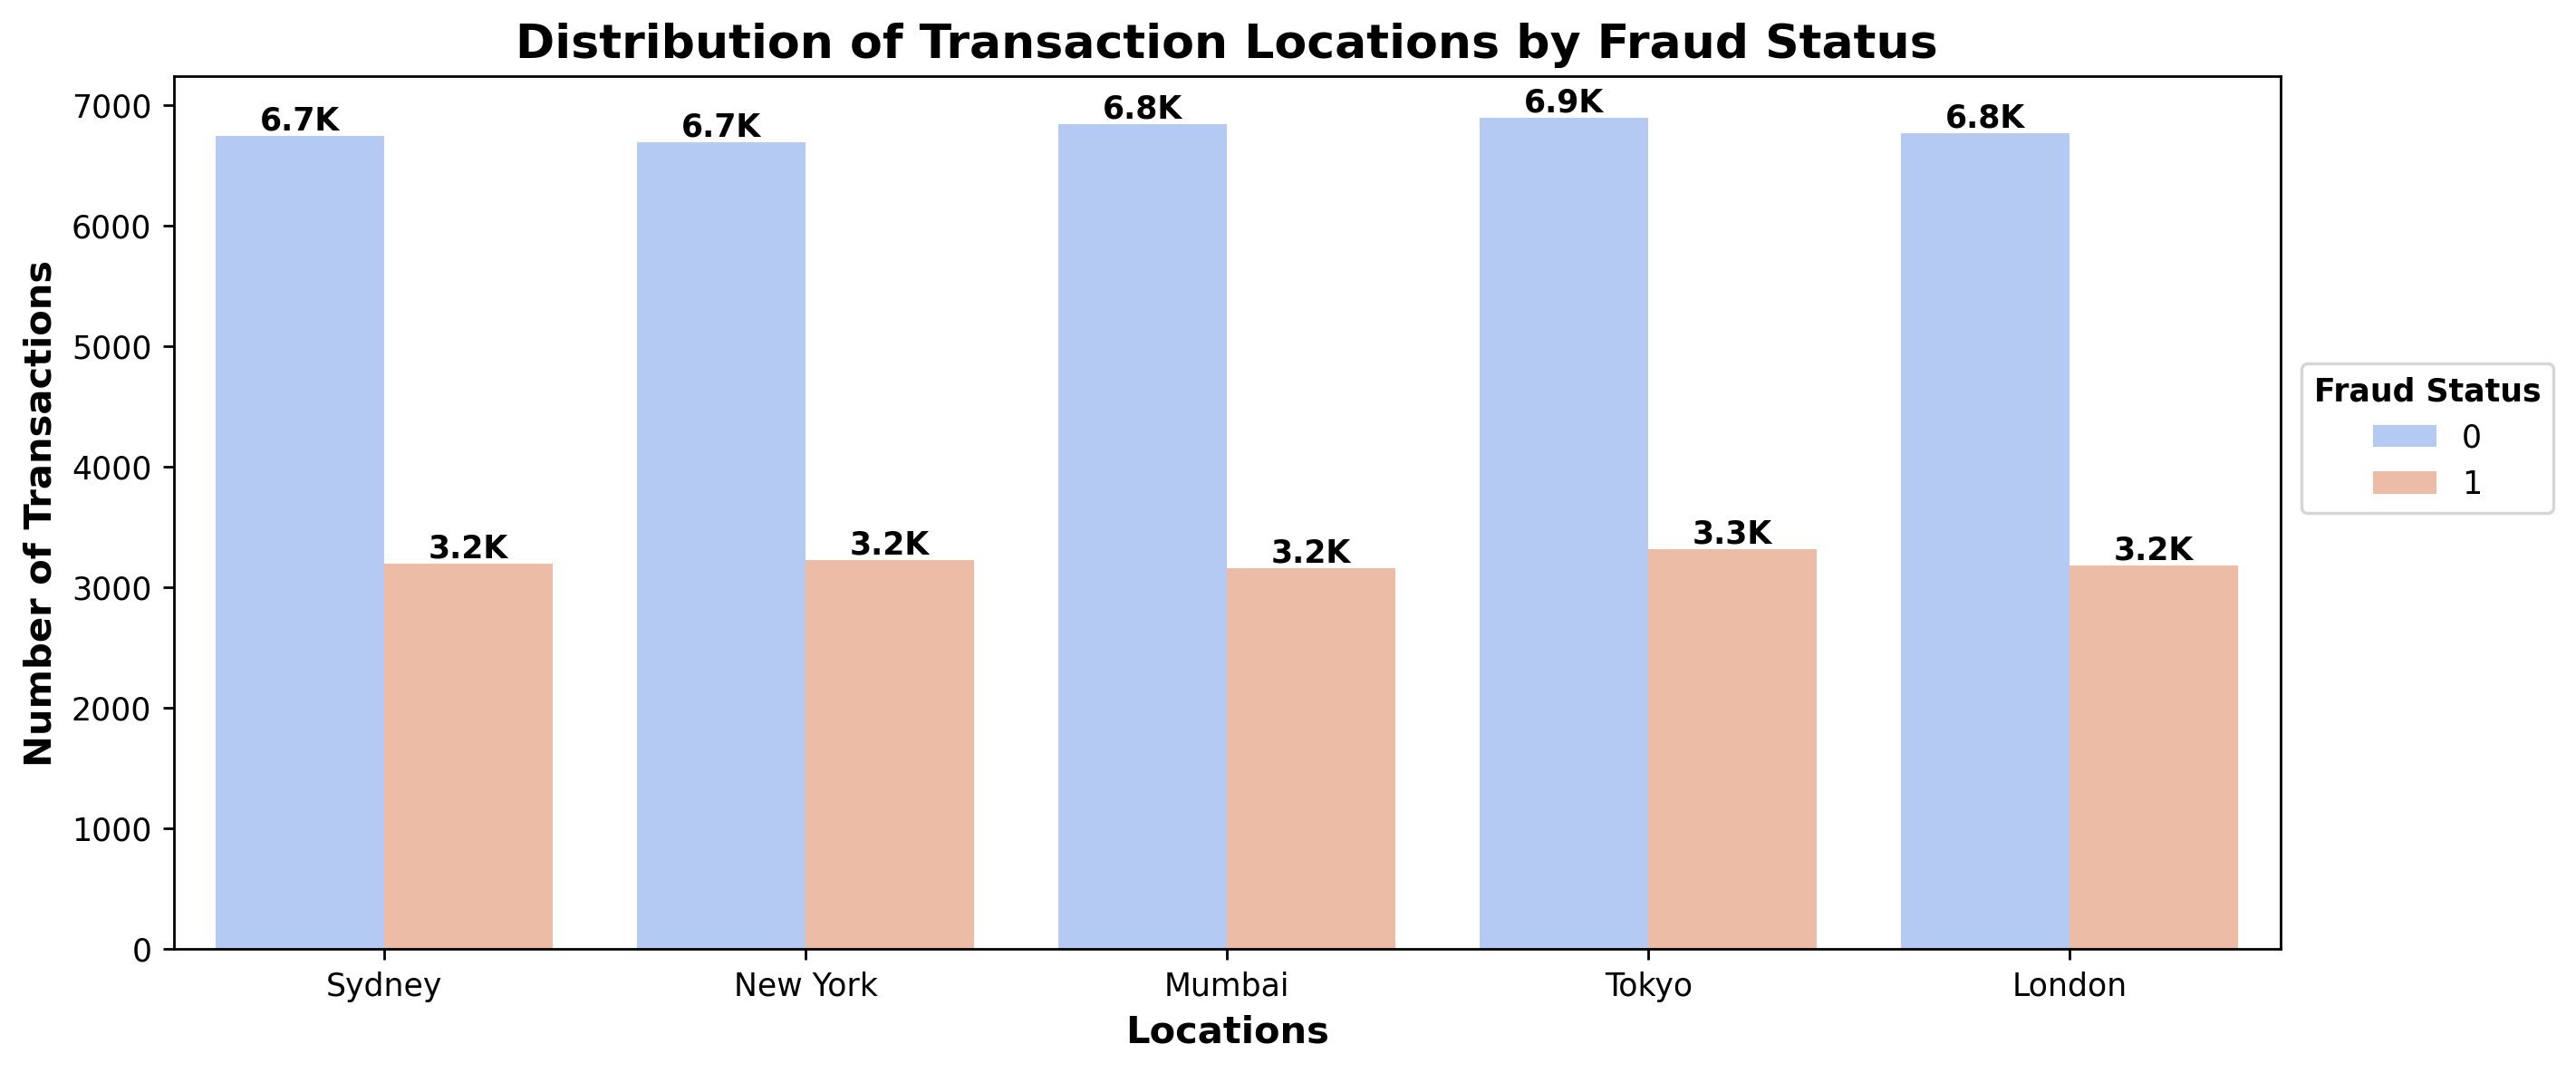

In [22]:
# Checking the distribution of transaction locations by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "transaction_location",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Locations by Fraud Status")
plt.xlabel("Locations")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

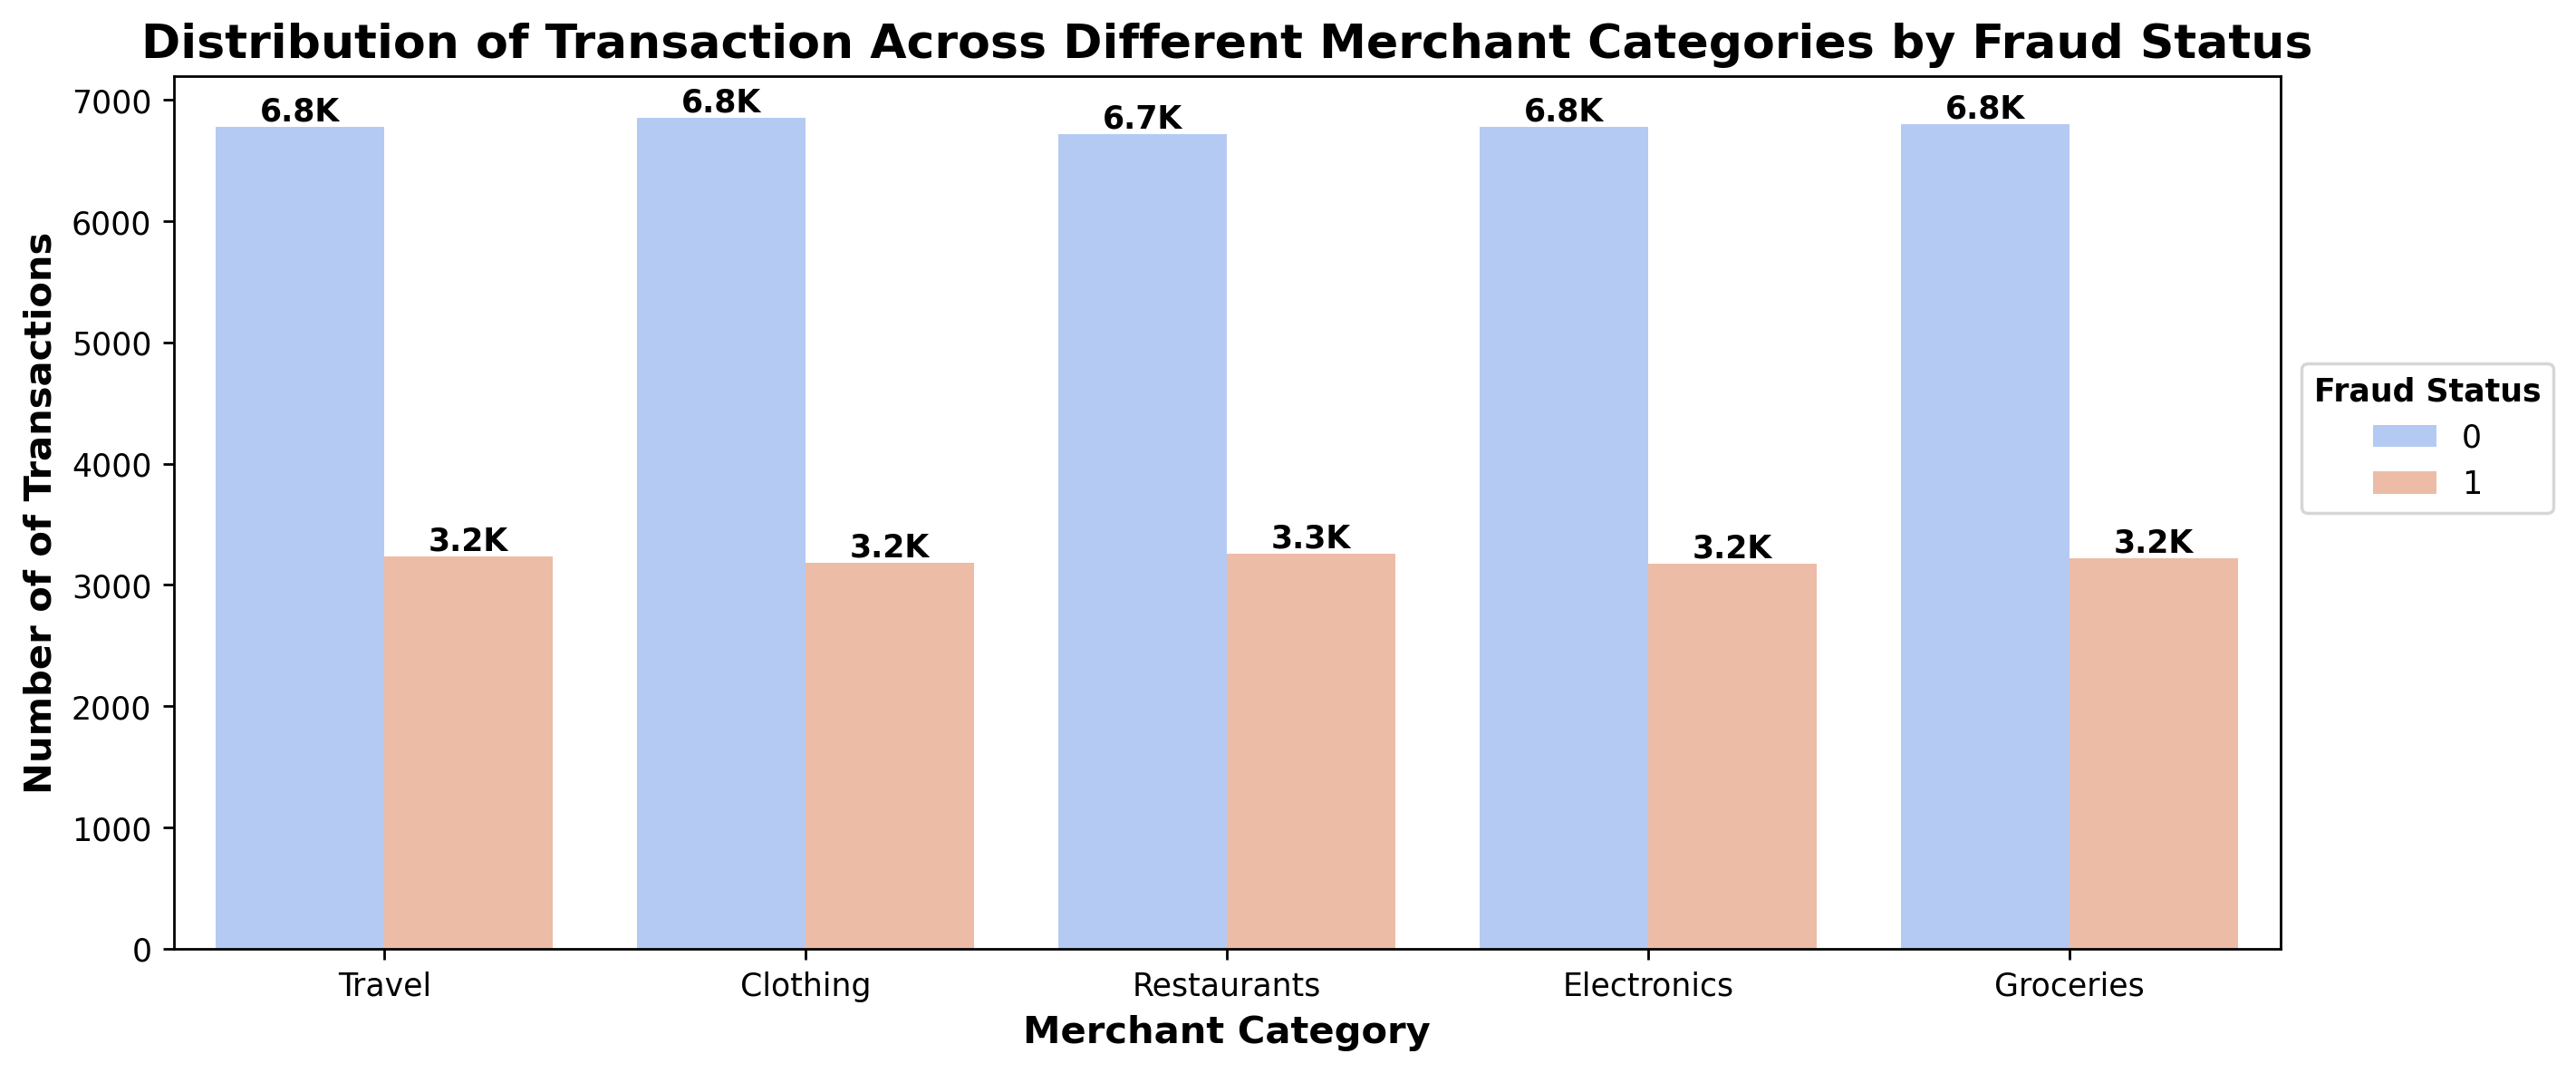

In [23]:
# Checking the distribution of transactions across different merchant categories by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "merchant_category",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Across Different Merchant Categories by Fraud Status")
plt.xlabel("Merchant Category")
plt.ylabel("Number of of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

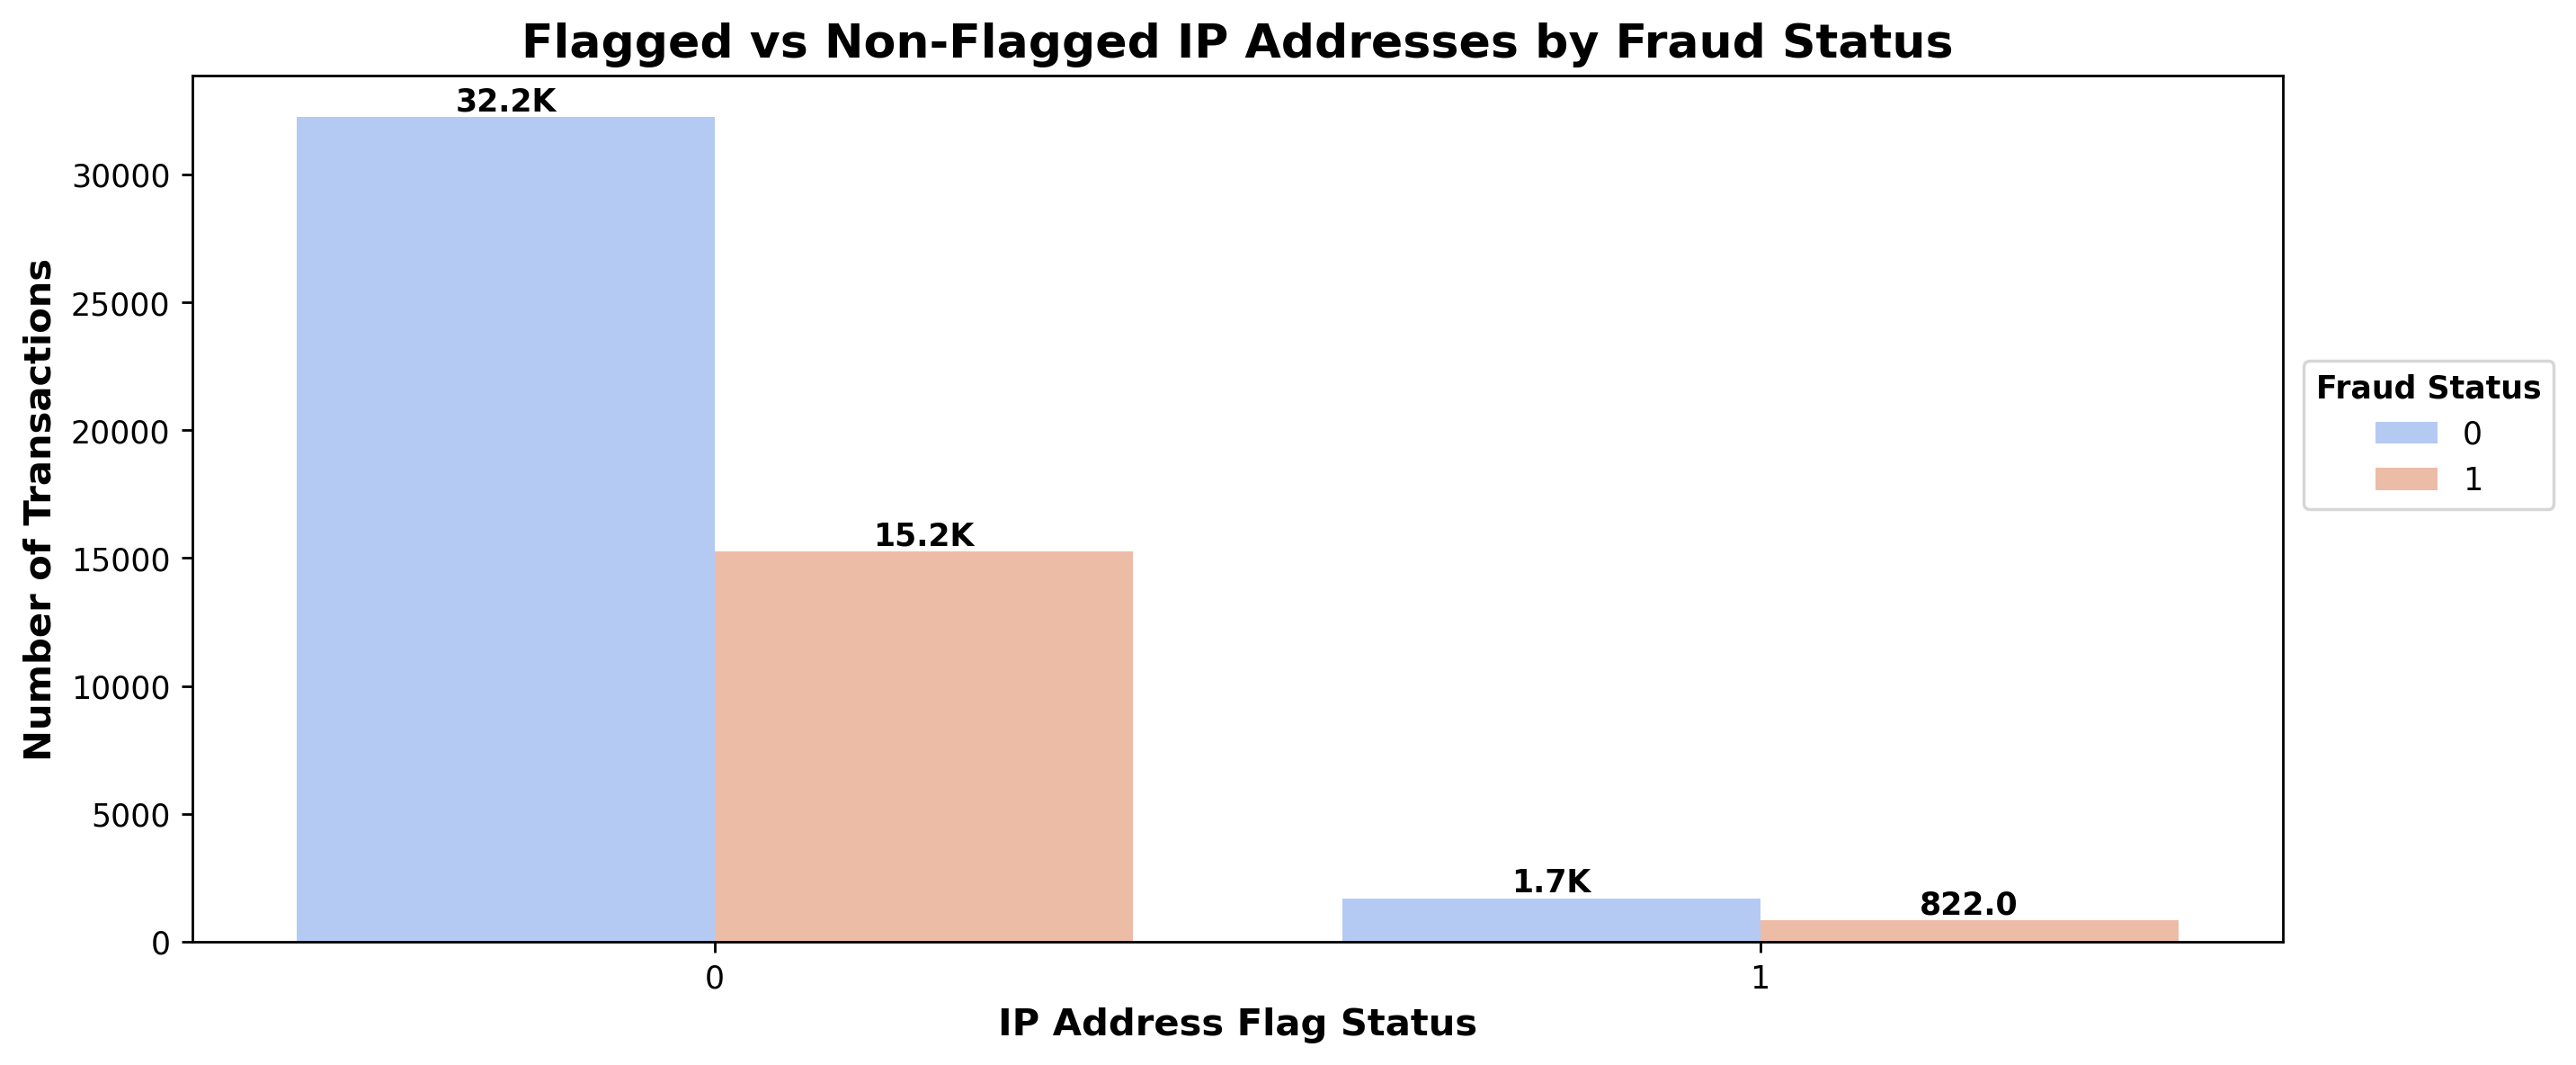

In [24]:
# Checking the number of IP addresses are flagged in the dataset by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "ip_address_flag",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Flagged vs Non-Flagged IP Addresses by Fraud Status")
plt.xlabel("IP Address Flag Status")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

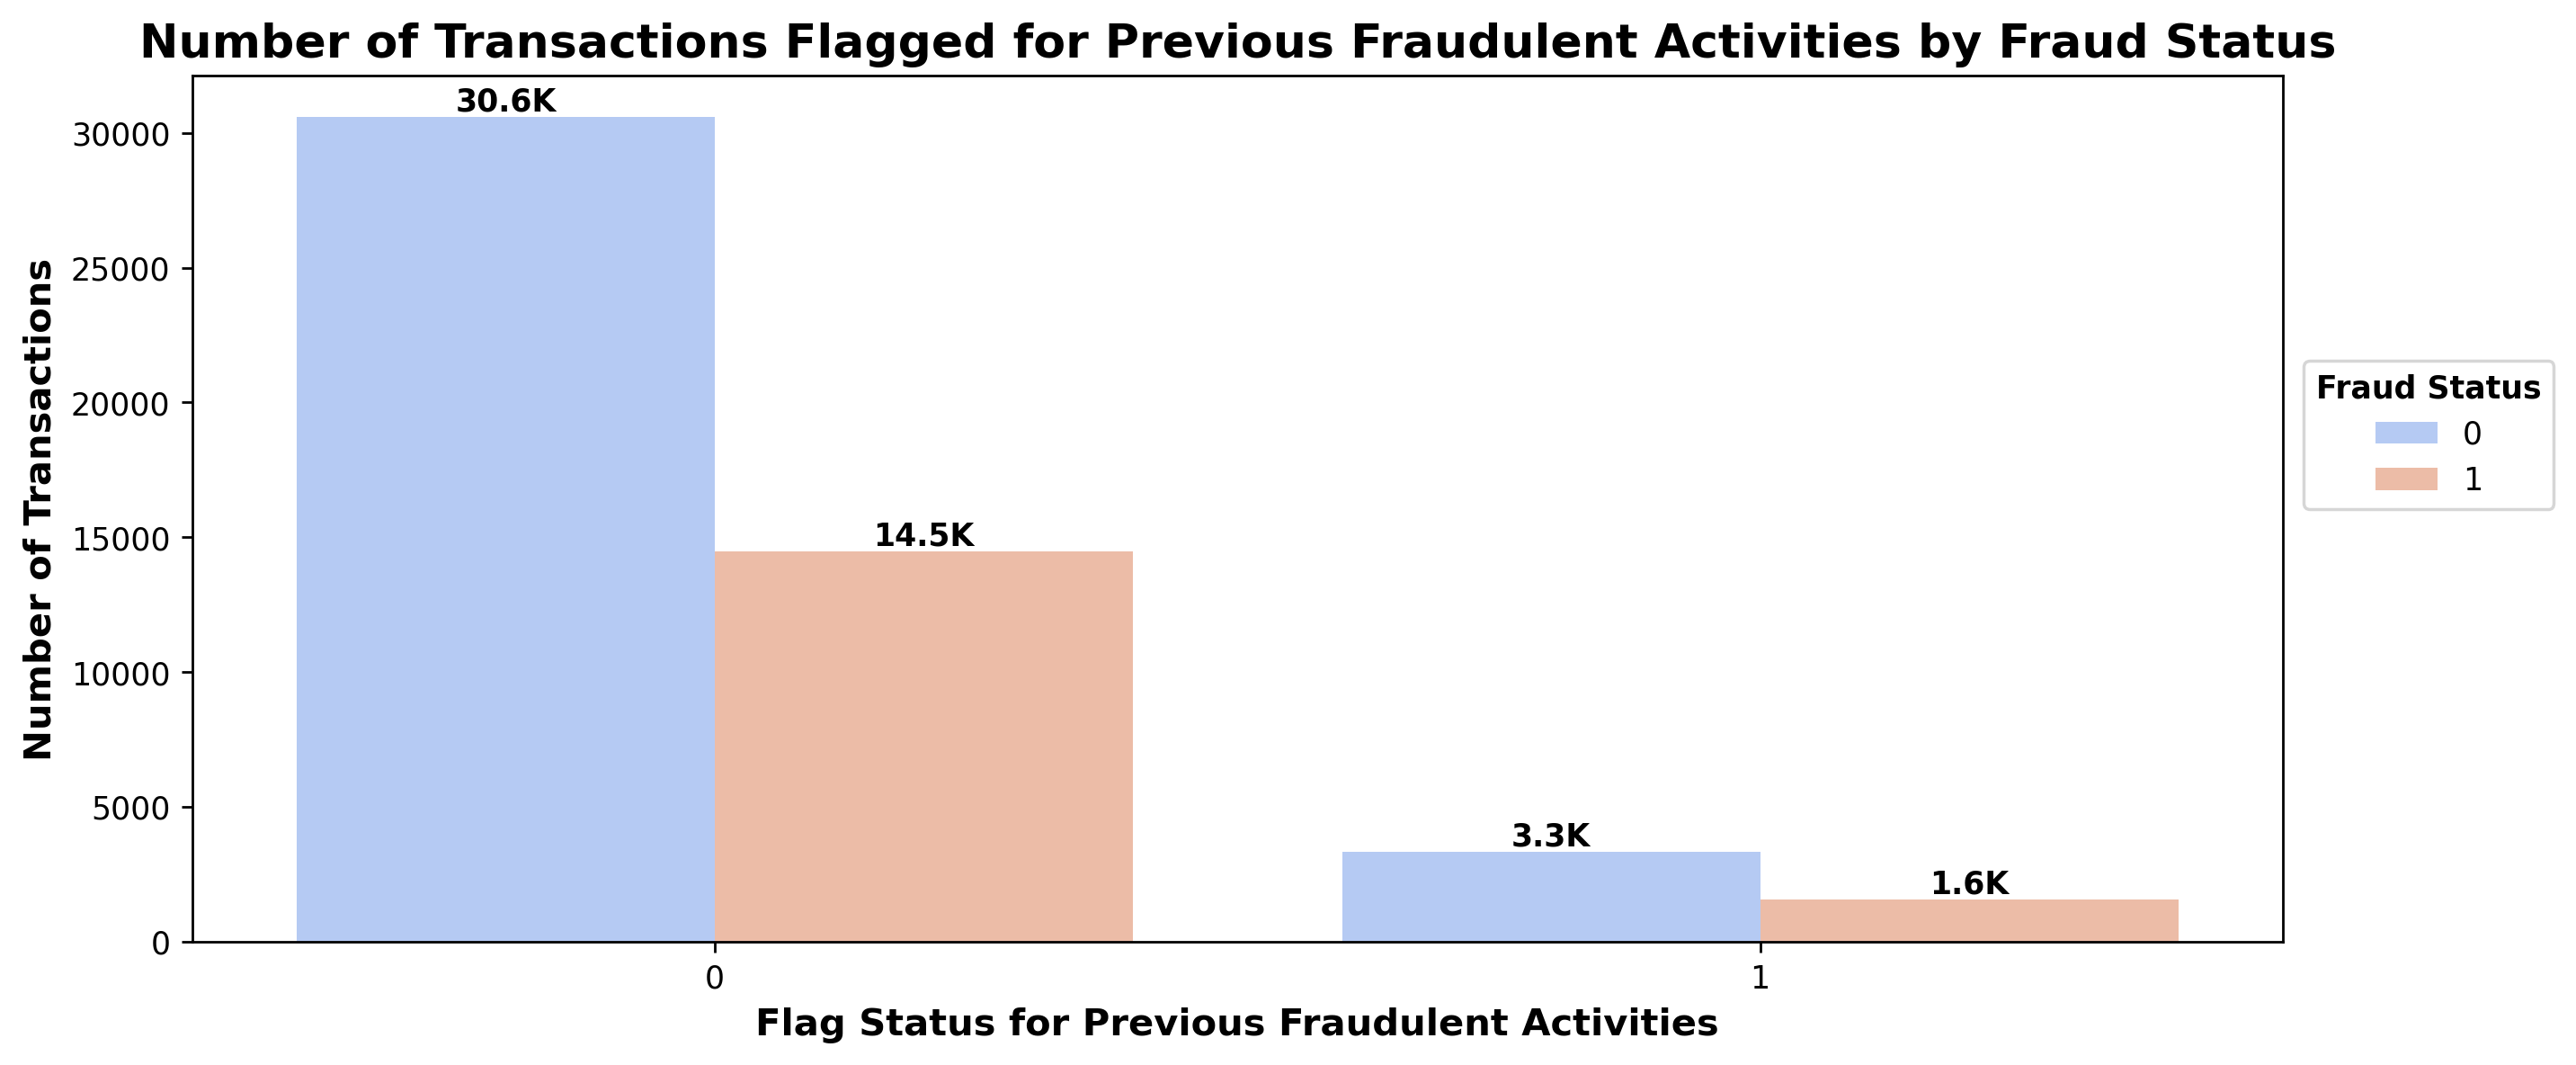

In [25]:
# Checking the number of transactions flagged for previous fraudulent activities in the dataset by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "previous_fraudulent_activities",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Number of Transactions Flagged for Previous Fraudulent Activities by Fraud Status")
plt.xlabel("Flag Status for Previous Fraudulent Activities")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

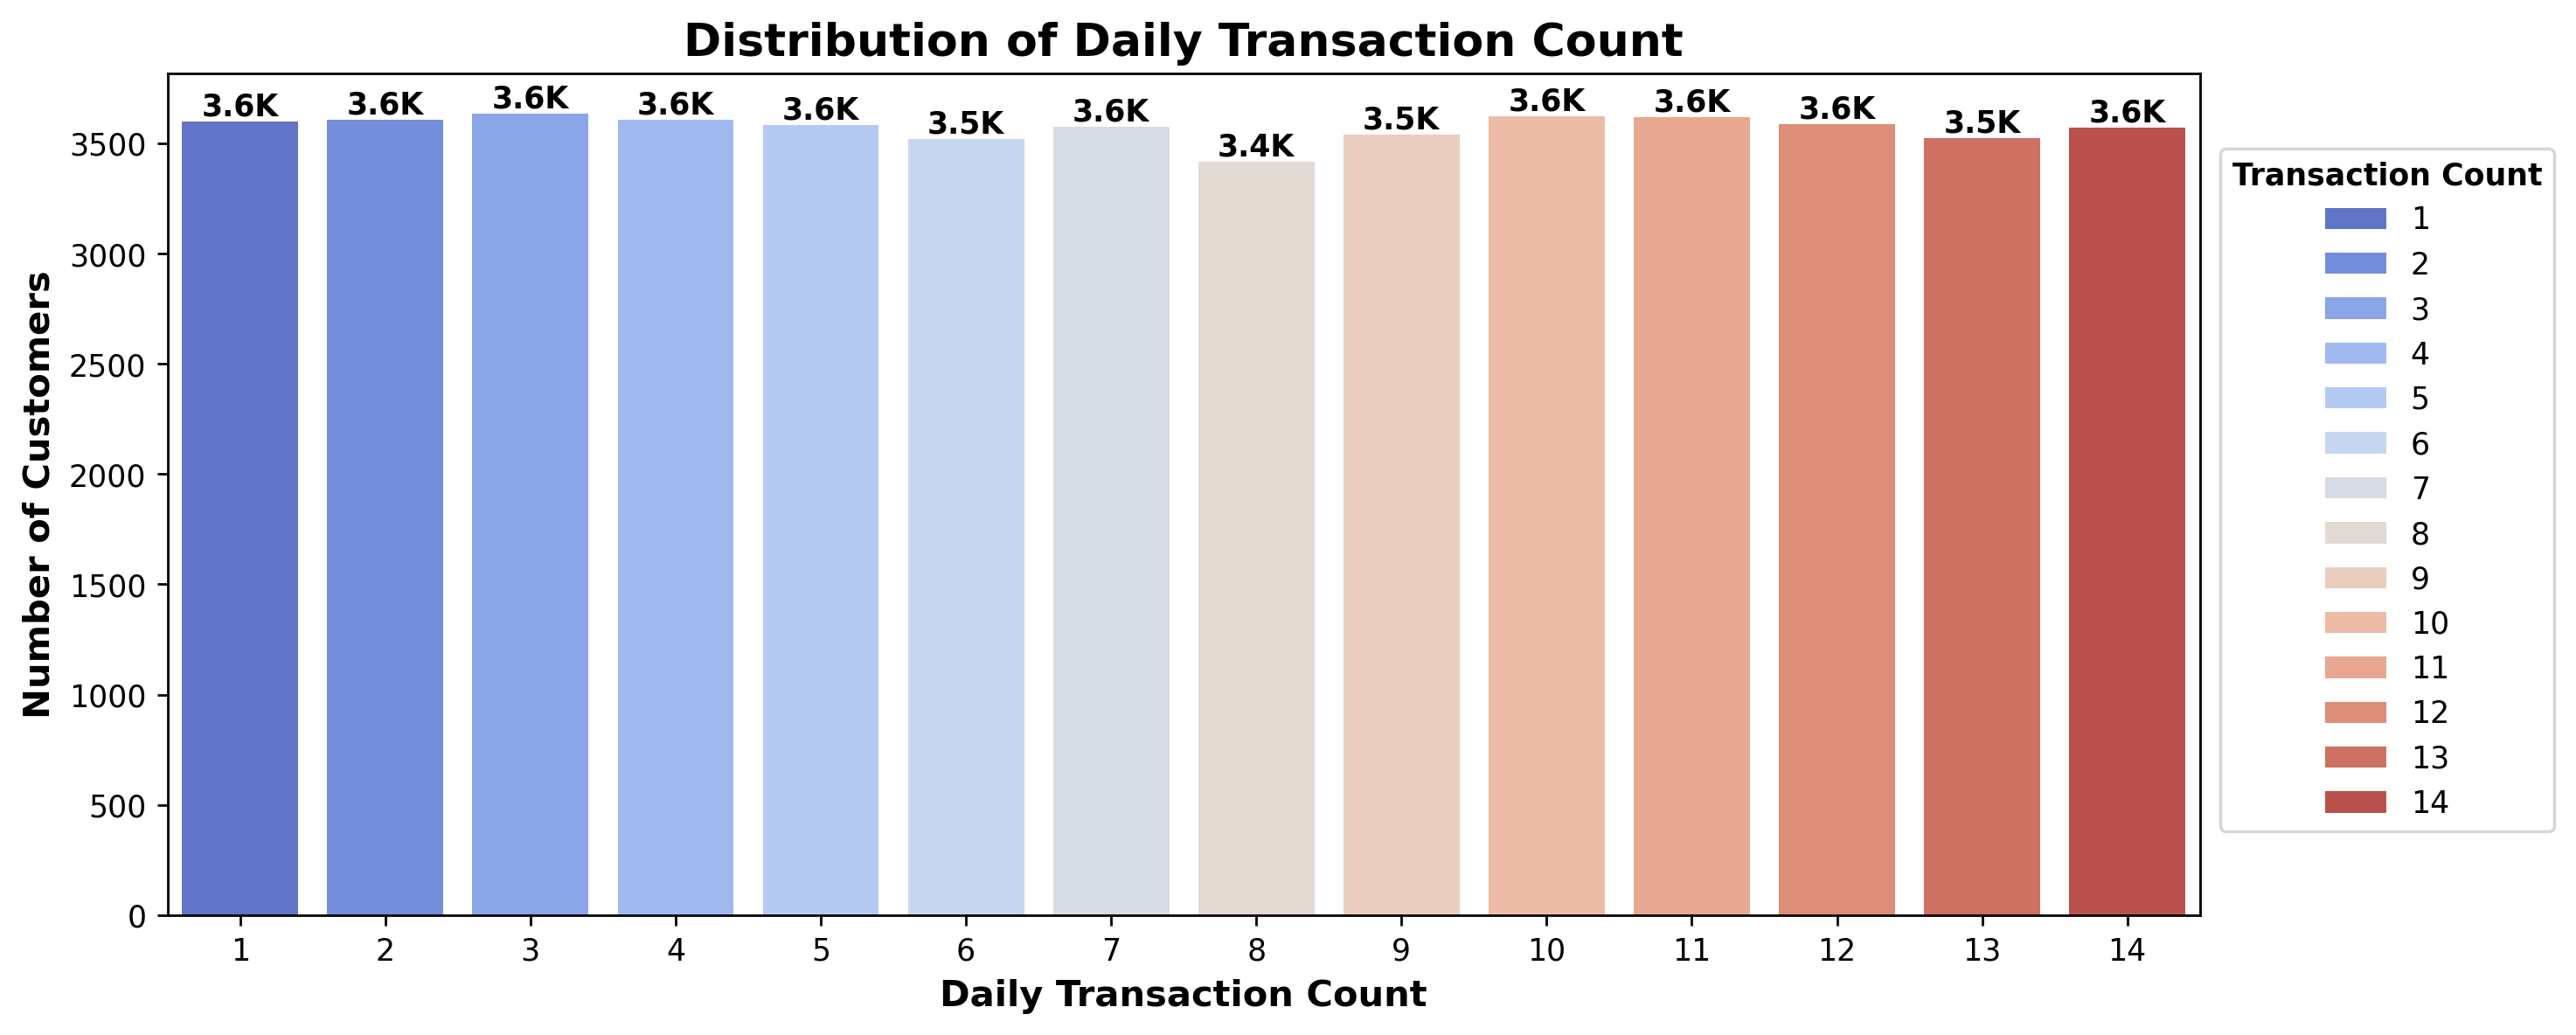

In [26]:
# Checking the distribution of daily transaction counts
ax = sns.countplot(
    data = transactions_df,
    x = "daily_transaction_count",
    hue = "daily_transaction_count",
    palette = "coolwarm",
    dodge = False
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Daily Transaction Count")
plt.xlabel("Daily Transaction Count")
plt.ylabel("Number of Customers")

# Setting location of the legend
plt.legend(title = "Transaction Count", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.1));

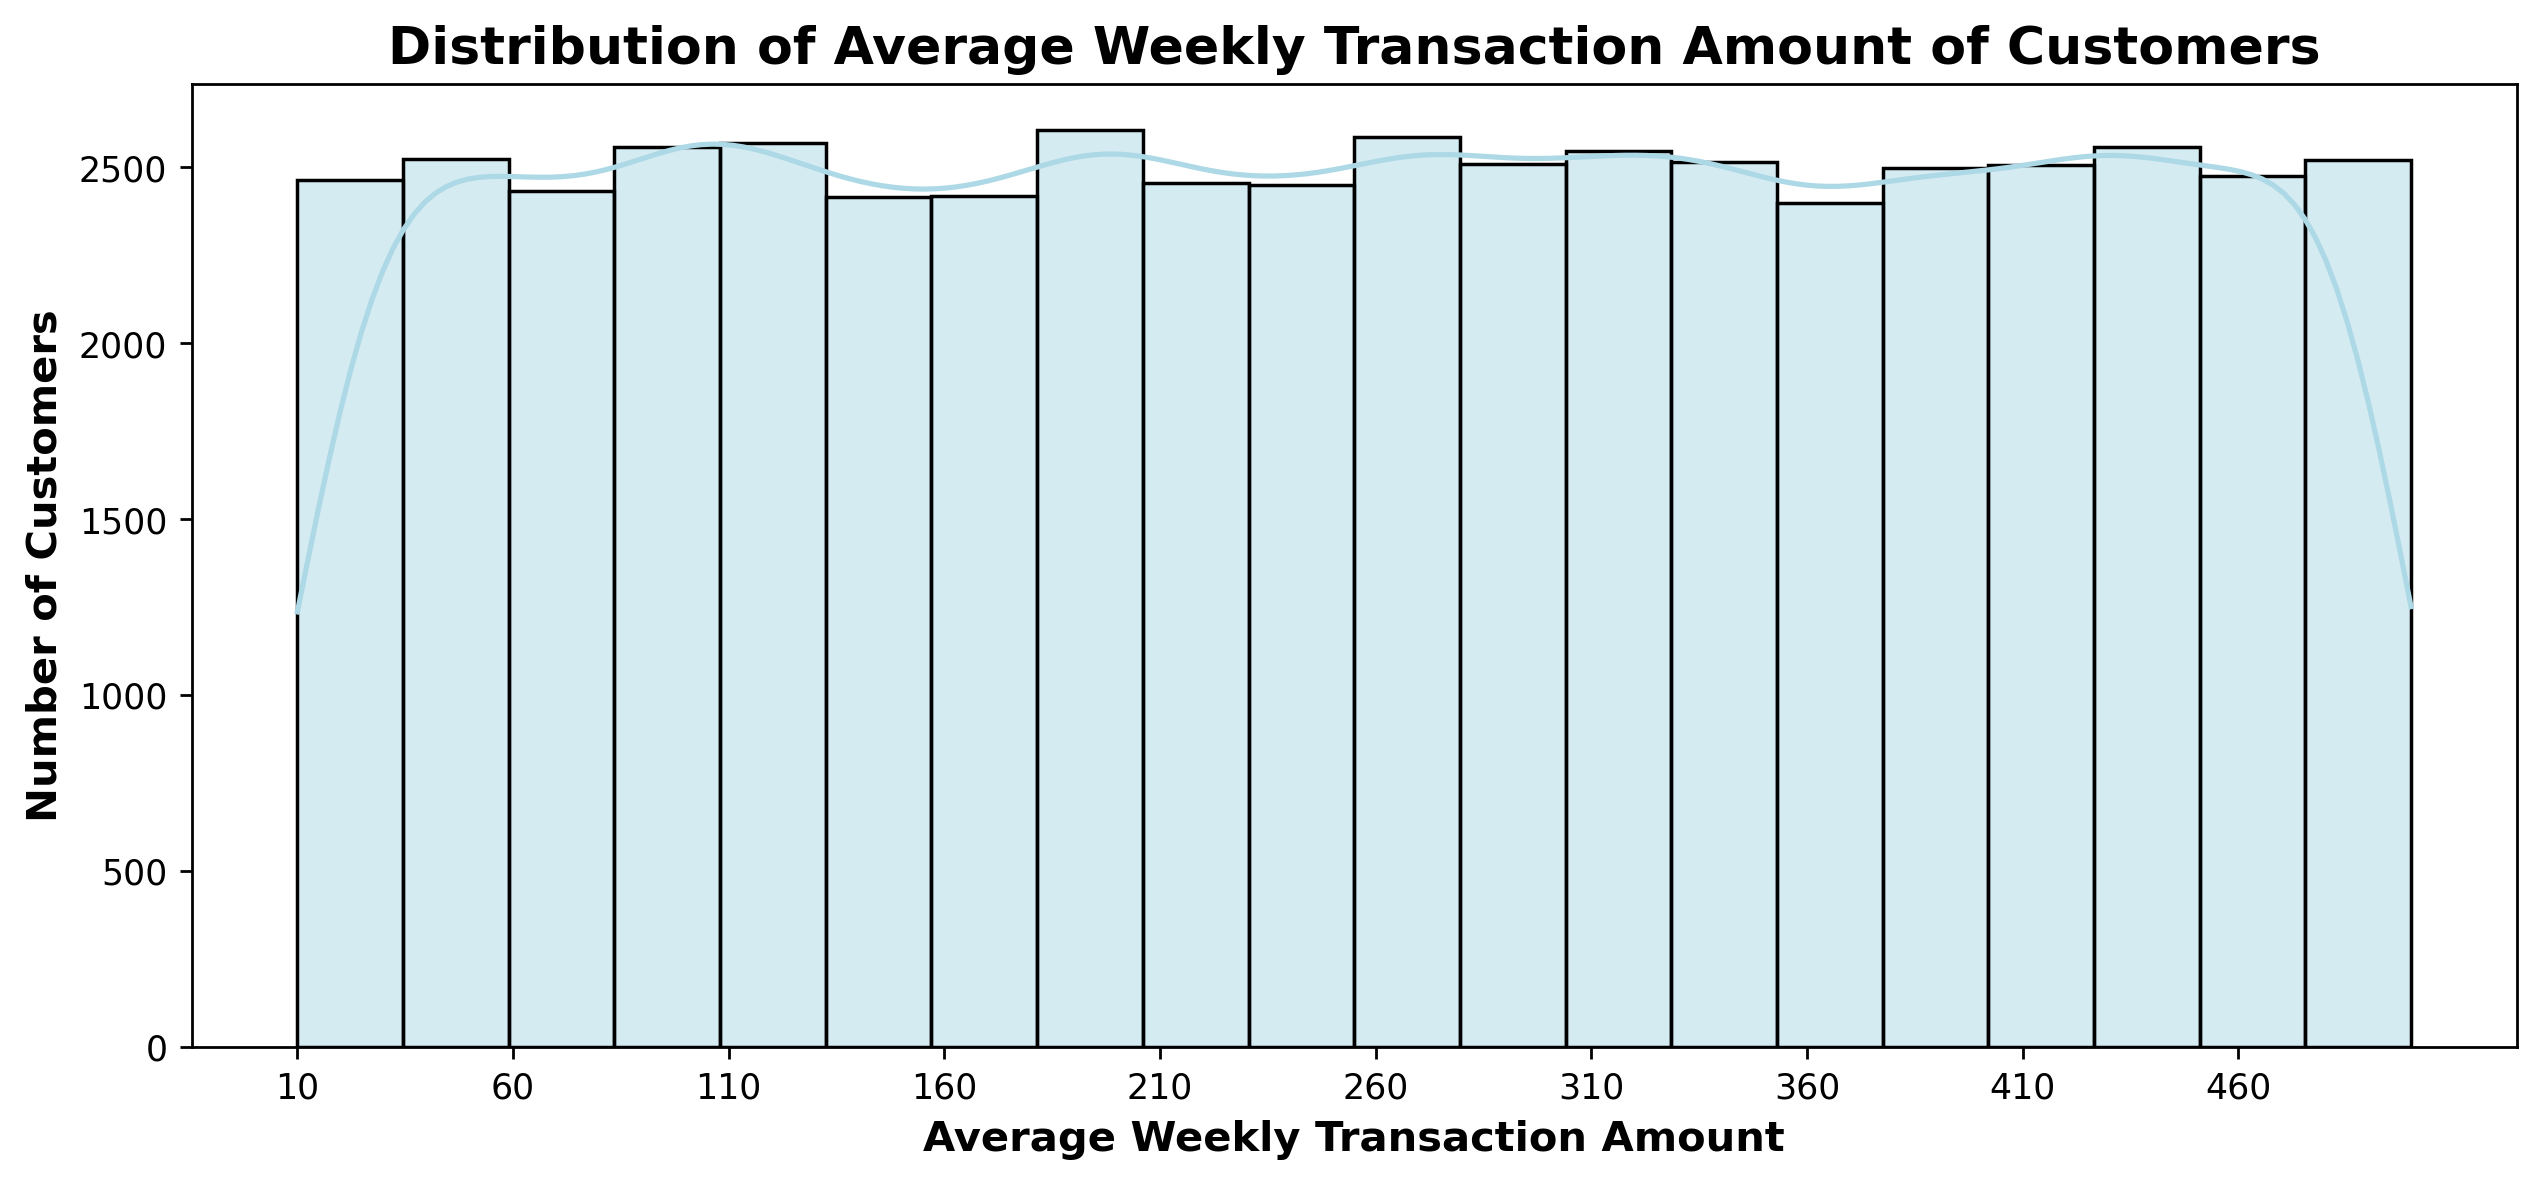

In [27]:
# Checking the distribution of the average weekly transaction amount for customers
sns.histplot(
    data = transactions_df,
    x = "avg_transaction_amount_7d",
    bins = 20,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Average Weekly Transaction Amount of Customers")
plt.xlabel("Average Weekly Transaction Amount")
plt.ylabel("Number of Customers")

# Changing the Xtick values
min_value = int(transactions_df['avg_transaction_amount_7d'].min())
max_value = int(transactions_df['avg_transaction_amount_7d'].max())
plt.xticks(range(min_value, max_value, 50));

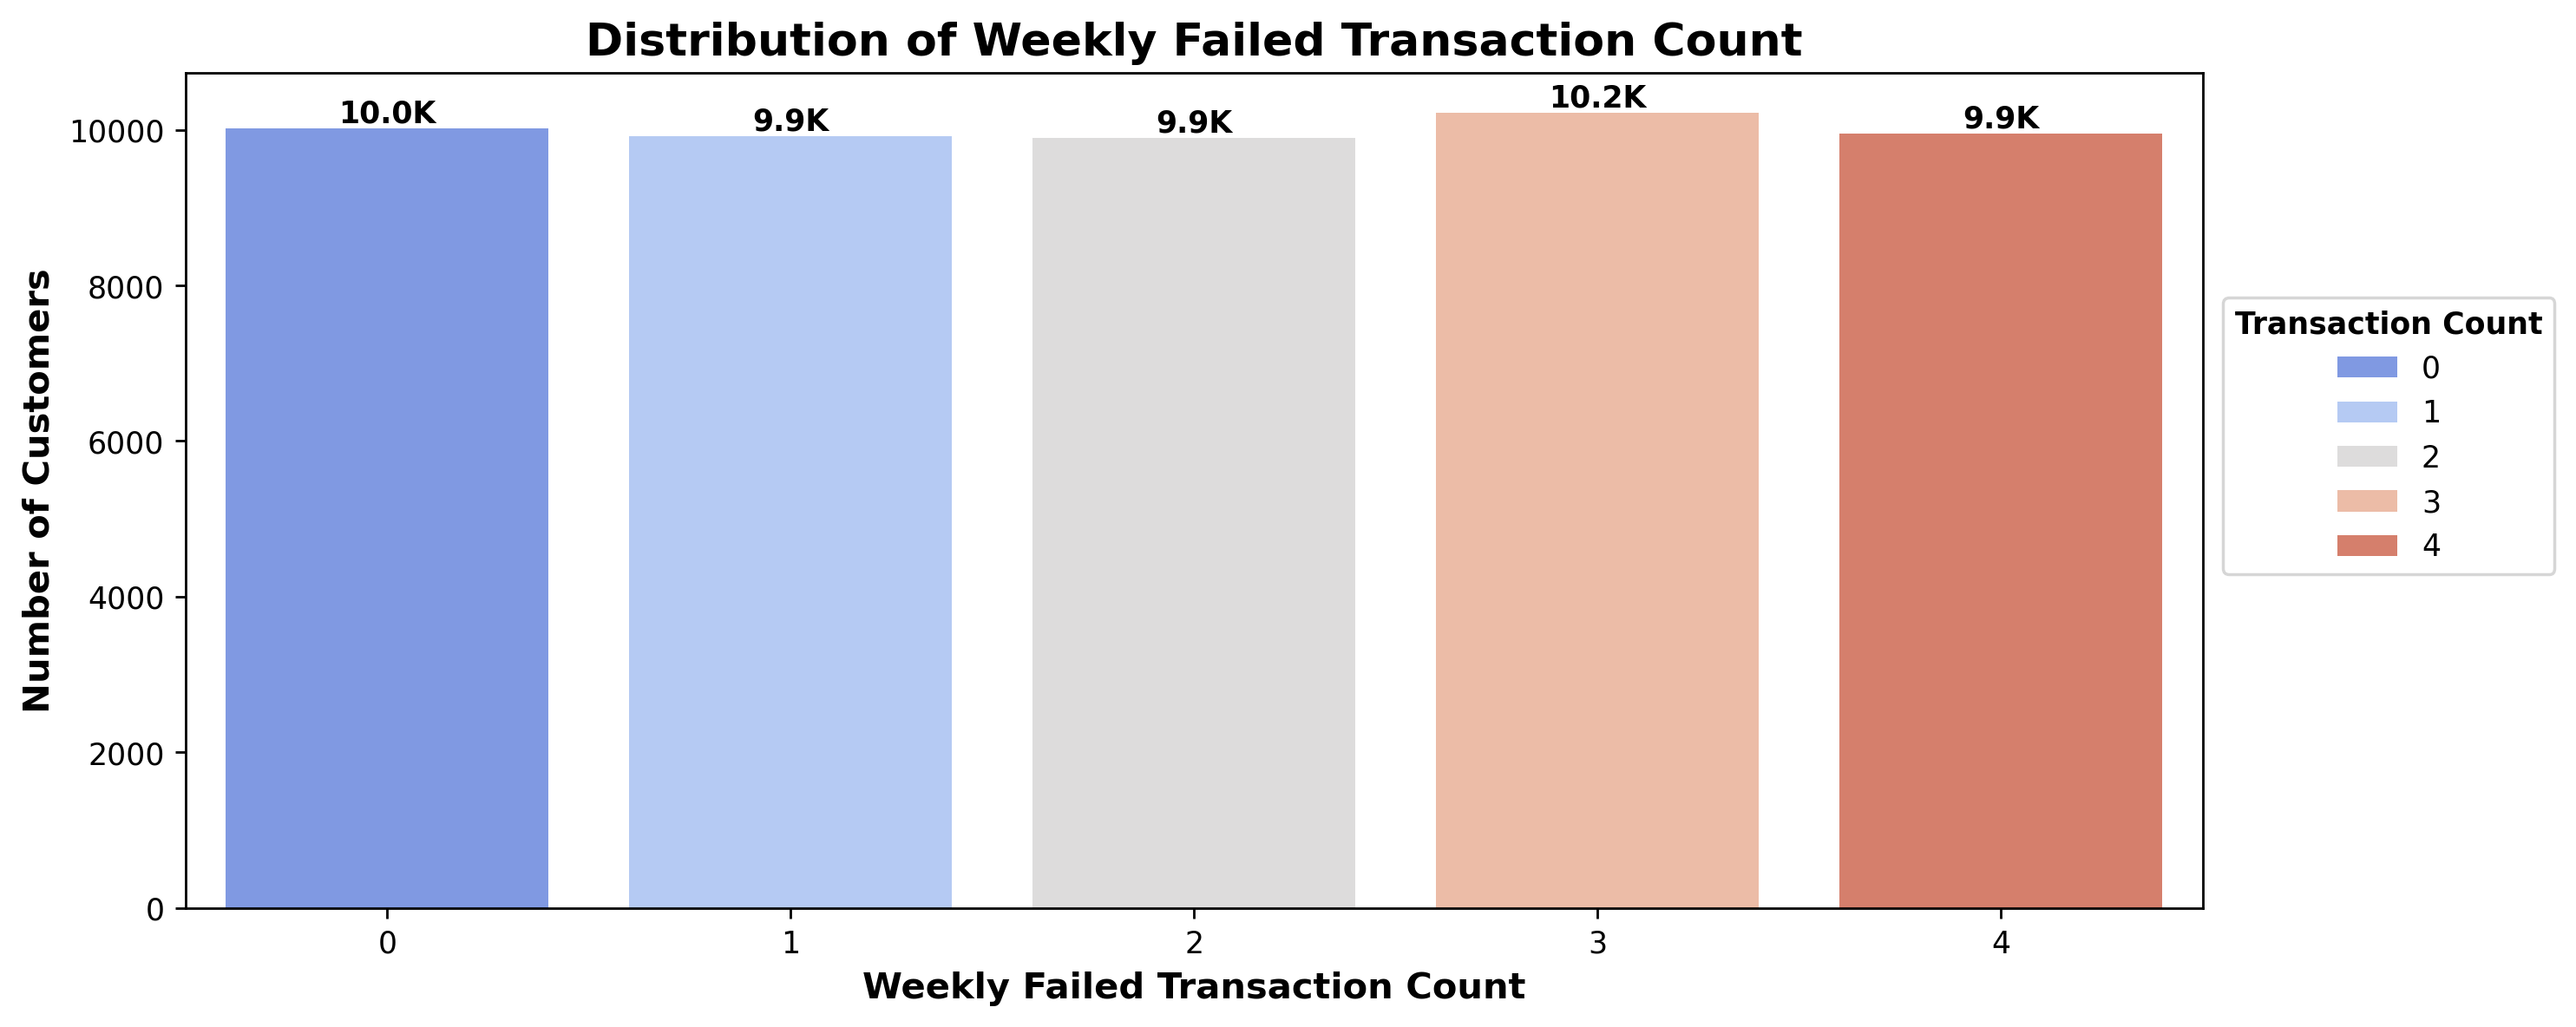

In [28]:
# Checking the distribution of weekly failed transaction counts
ax = sns.countplot(
    data = transactions_df,
    x = "failed_transaction_count_7d",
    hue = "failed_transaction_count_7d",
    palette = "coolwarm",
    dodge = False
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Weekly Failed Transaction Count")
plt.xlabel("Weekly Failed Transaction Count")
plt.ylabel("Number of Customers")

# Setting location of the legend
plt.legend(title = "Transaction Count", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.4));

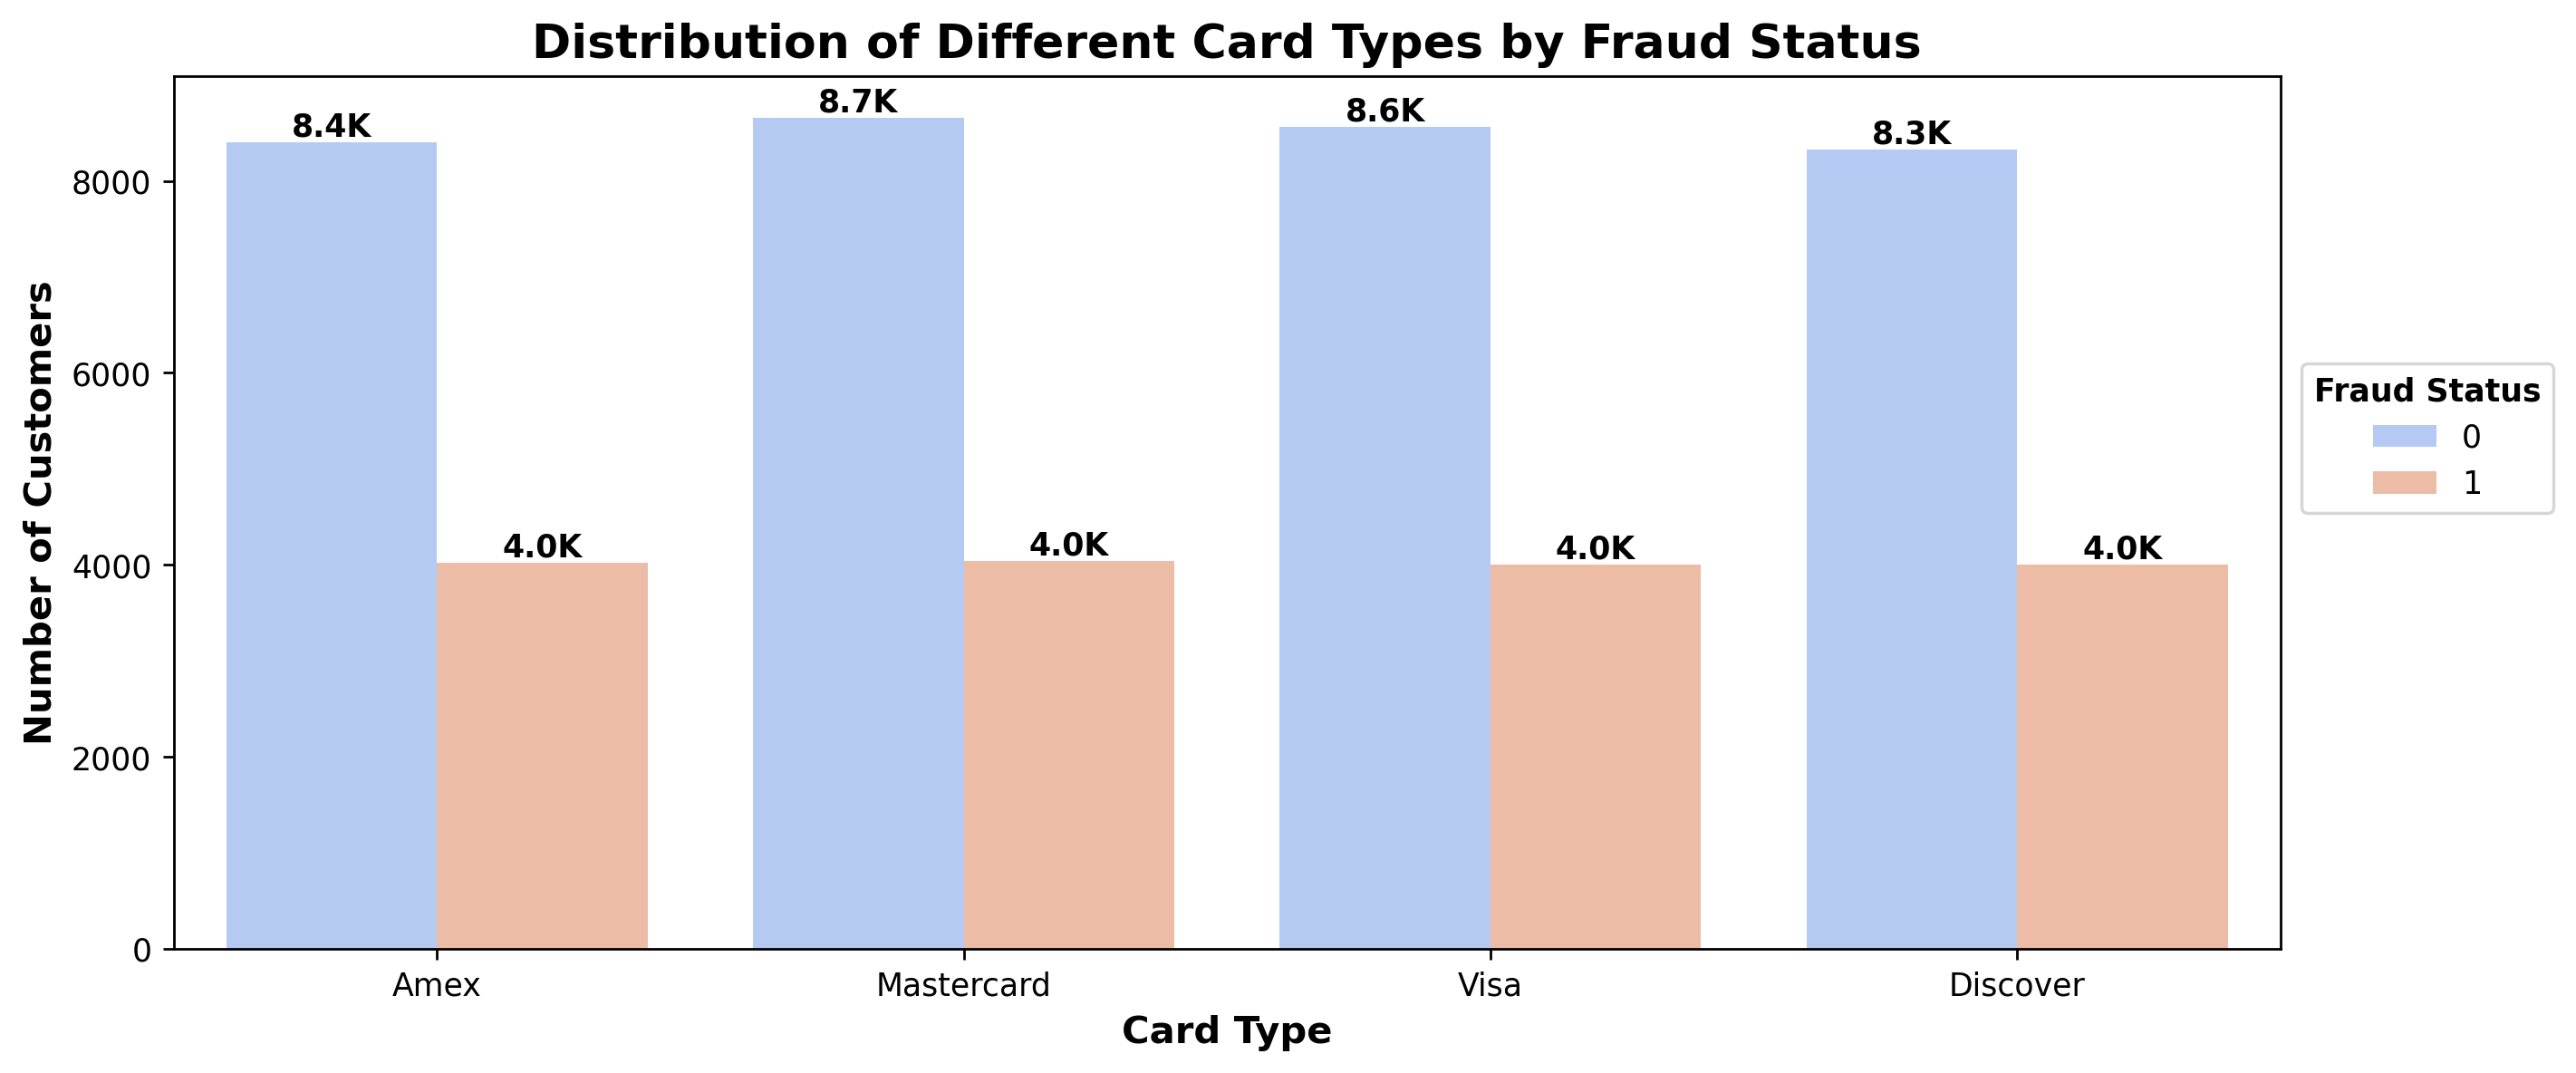

In [29]:
# Checking the distribution of different card types by fraud status
ax = sns.countplot(
    data = transactions_df,
    x = "card_type",
    hue = "fraud_label",
    palette = 'coolwarm'
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Different Card Types by Fraud Status")
plt.xlabel("Card Type")
plt.ylabel("Number of Customers")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

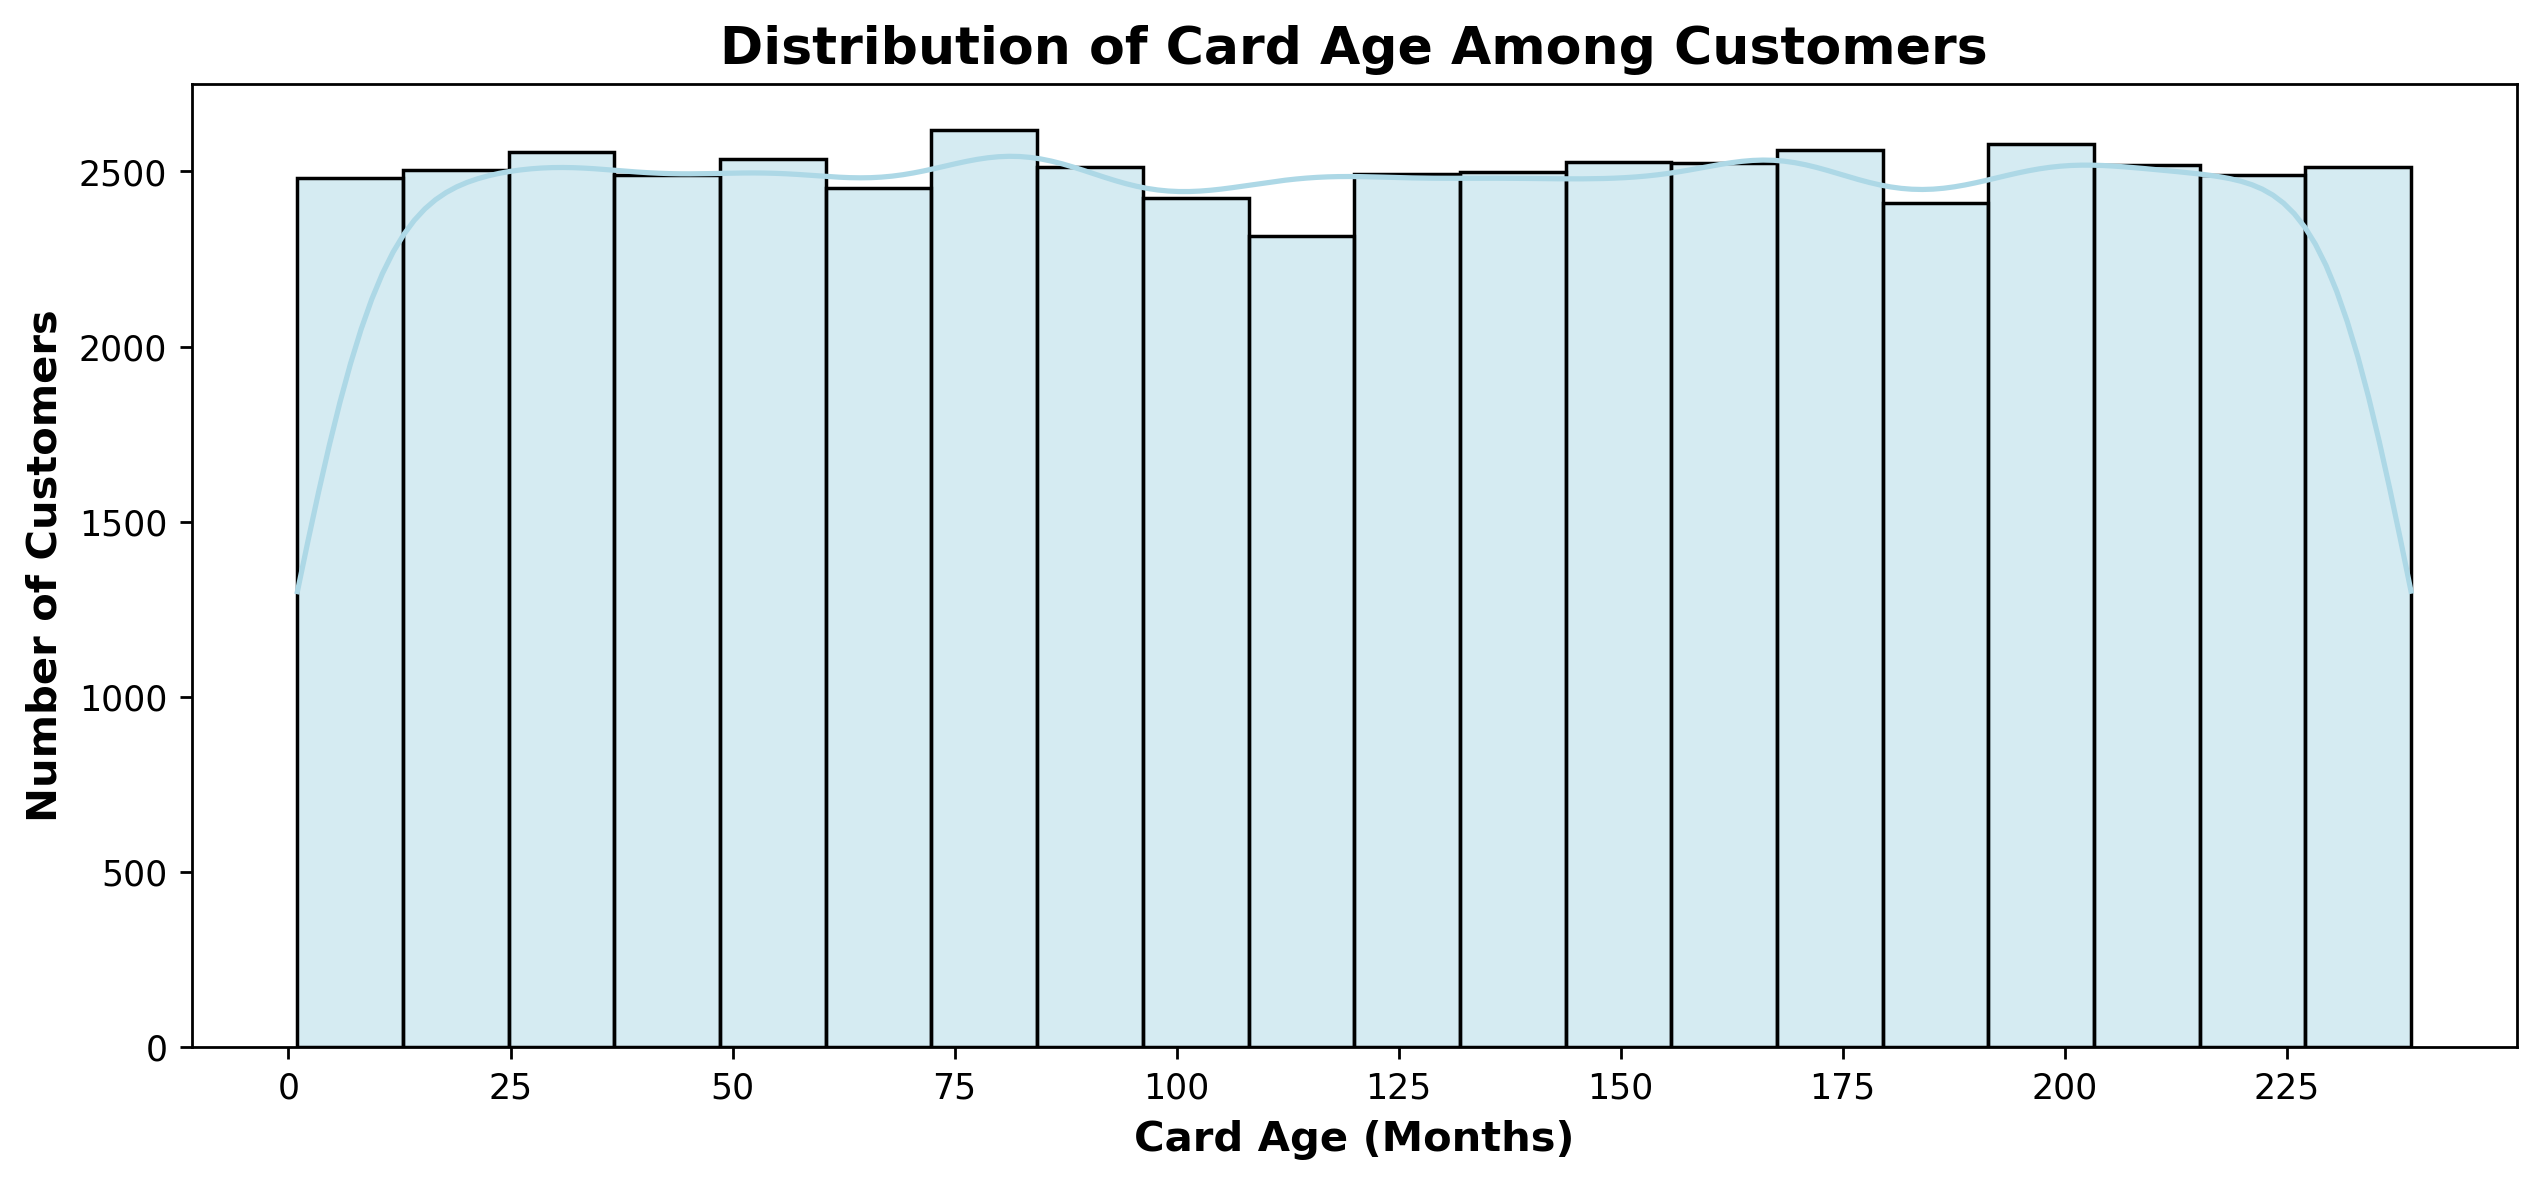

In [30]:
# Checking the distribution of card age among customers
sns.histplot(
    data = transactions_df,
    x = "card_age_months",
    bins = 20,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Card Age Among Customers")
plt.xlabel("Card Age (Months)")
plt.ylabel("Number of Customers")

# Changing the Xtick values
min_value = int(transactions_df['card_age_months'].min())
max_value = int(transactions_df['card_age_months'].max())
plt.xticks(range(0, max_value, 25));

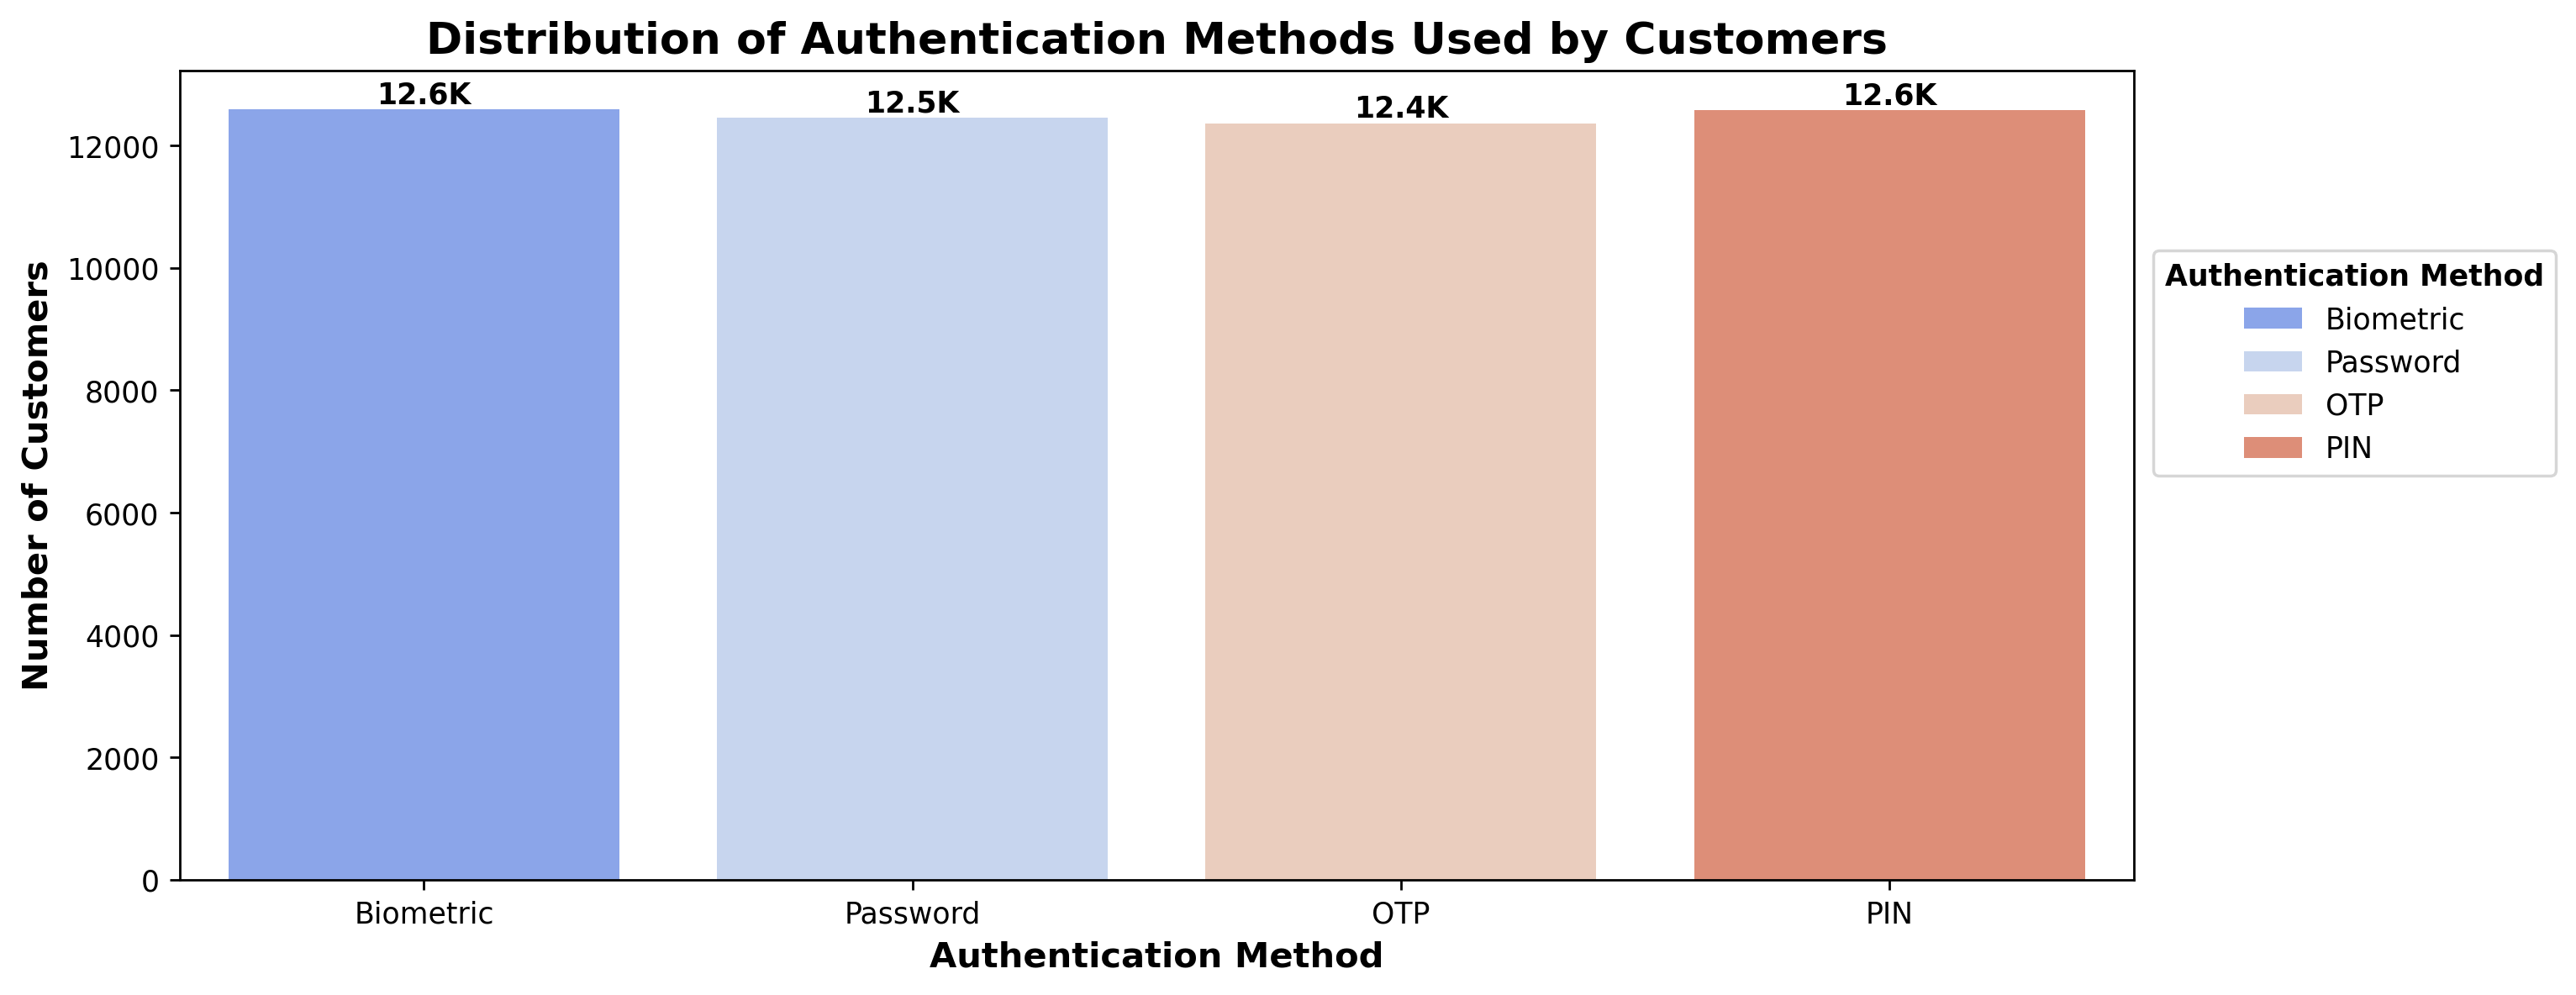

In [31]:
# Checking the distribution of authentication methods used by customers for money transfers
ax = sns.countplot(
    data = transactions_df,
    x = "authentication_method",
    hue = "authentication_method",
    palette = 'coolwarm',
    dodge = False
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Authentication Methods Used by Customers")
plt.xlabel("Authentication Method")
plt.ylabel("Number of Customers")

# Setting location of the legend
plt.legend(title = "Authentication Method", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

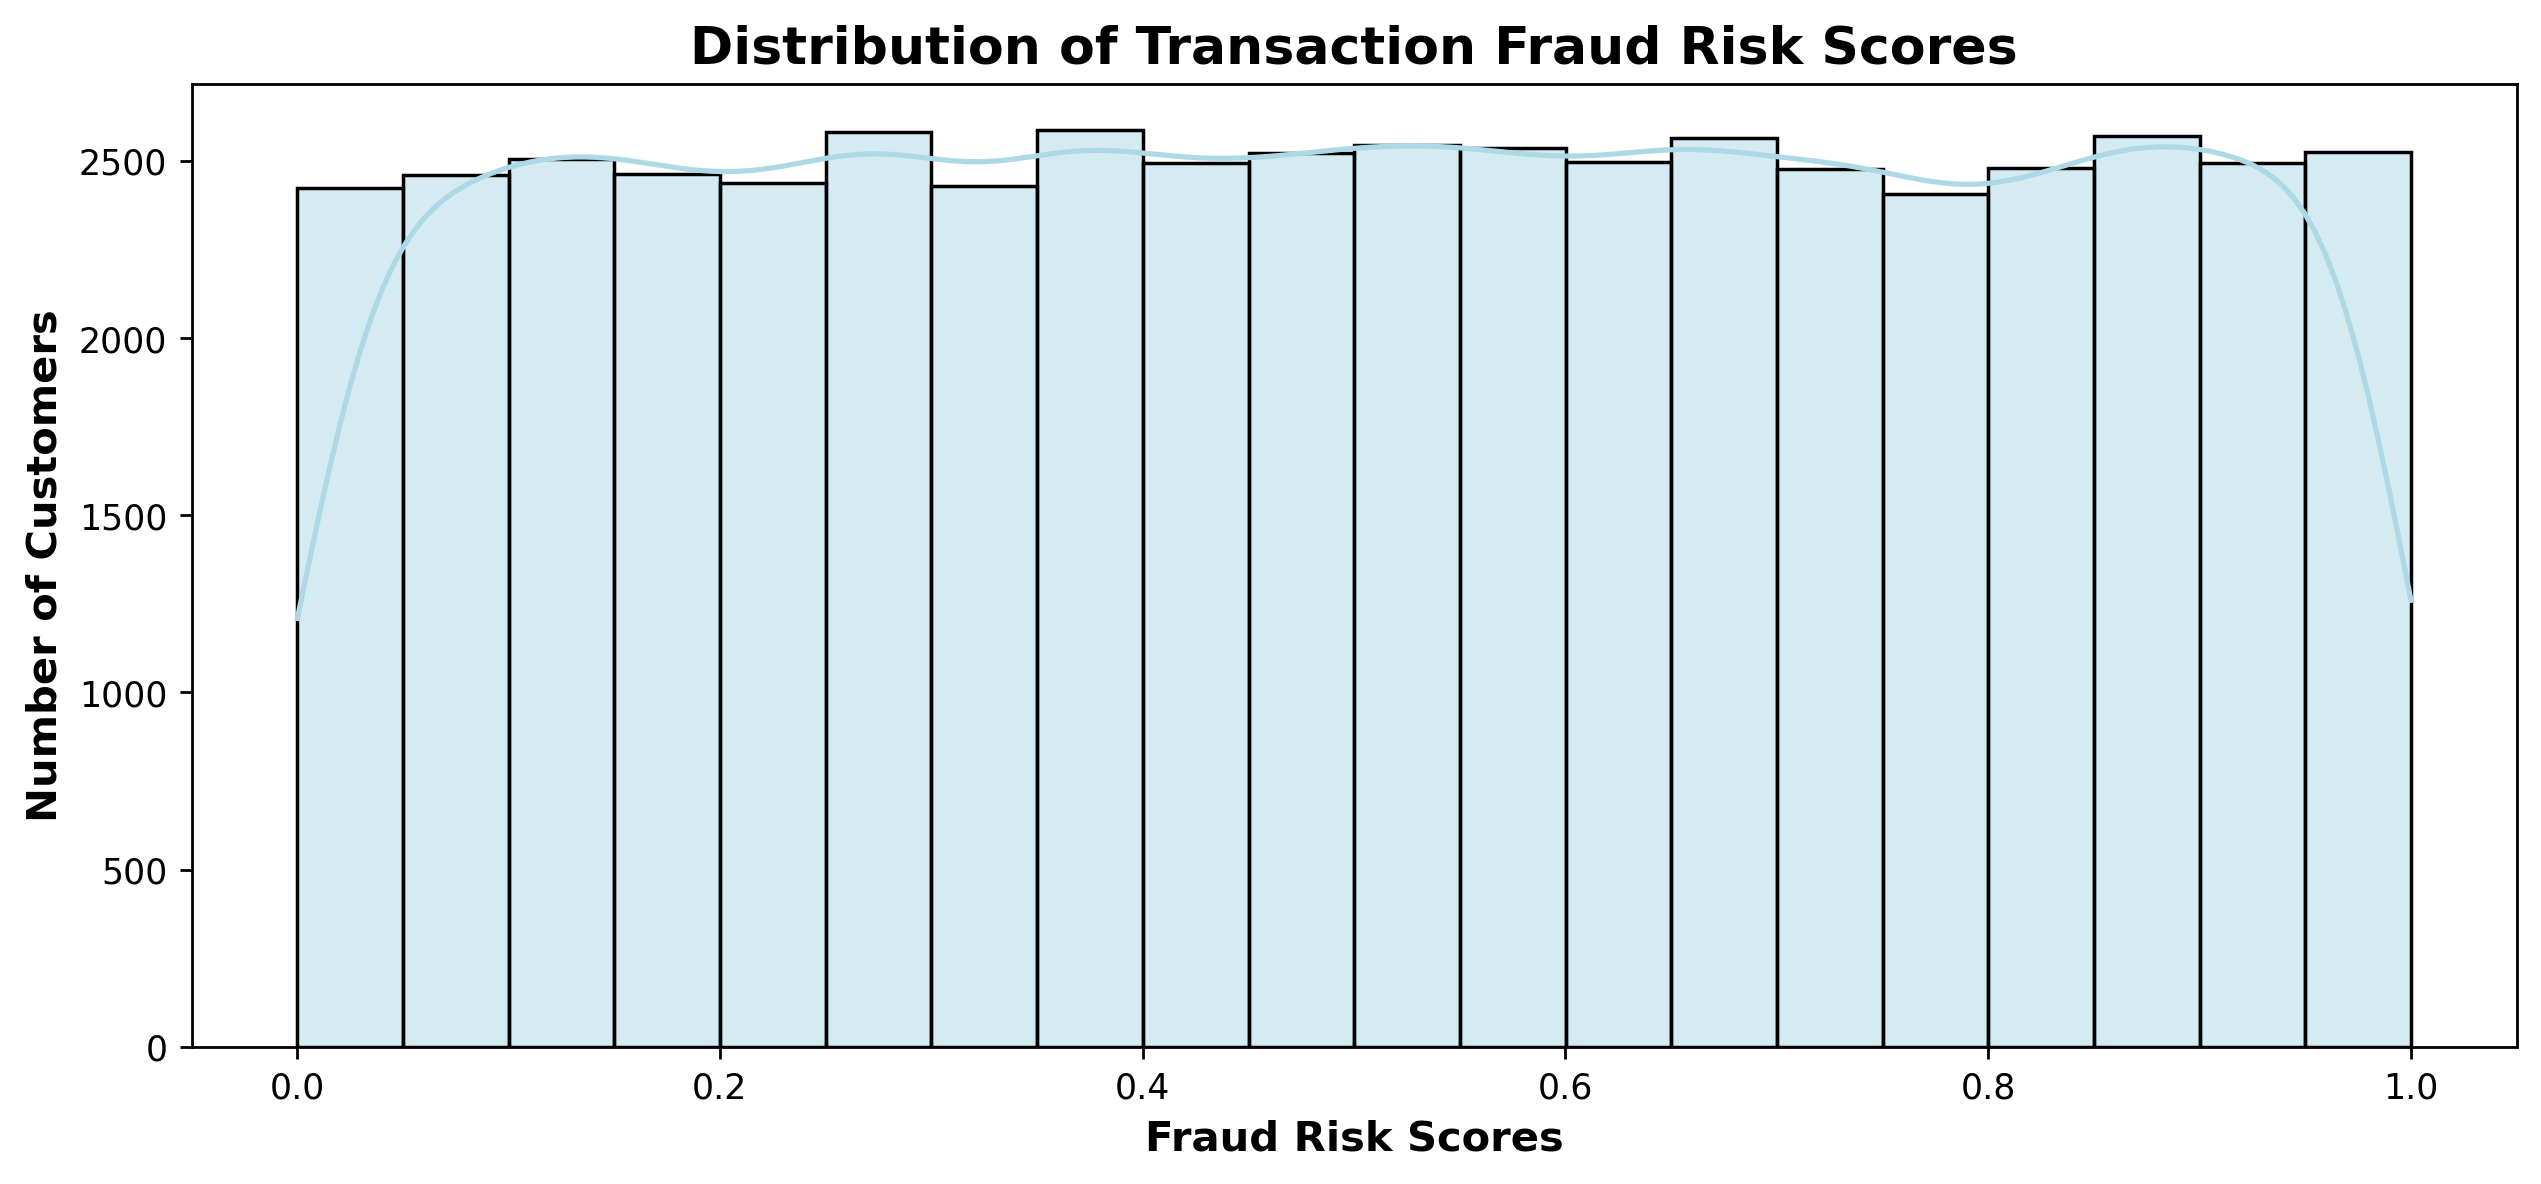

In [32]:
# Checking the distribution of transaction fraud risk scores
sns.histplot(
    data = transactions_df,
    x = "fraud_risk_score",
    bins = 20,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Fraud Risk Scores")
plt.xlabel("Fraud Risk Scores")
plt.ylabel("Number of Customers");

In [33]:
# Converting transaction timestamp column to pandas datetiem object
transactions_df['transaction_timestamp'] = pd.to_datetime(transactions_df['transaction_timestamp'])
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label  
0            0  
1            1  
2            1  
3            1  
4            1

In [34]:
# Adding a new column to show the day of the week when each transaction was made
transactions_df['day_of_week'] = transactions_df['transaction_timestamp'].dt.day_name()
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  
0            0      Monday  
1            1   Wednesday  
2            1     Tuesday  
3            1    Thursday  
4            1    Saturday

In [35]:
# Adding a new column to show the minute of each transaction
transactions_df['transaction_min'] = transactions_df['transaction_timestamp'].dt.minute
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  
0            0      Monday               30  
1            1   Wednesday                1  
2            1     Tuesday               25  
3            1    Thursday               31  
4            1    Saturday               44

In [36]:
# Adding a new column to show the hour of each transaction
transactions_df['transaction_hour'] = transactions_df['transaction_timestamp'].dt.hour
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  transaction_hour  
0            0      Monday               30                19  
1            1   Wednesday                1                 4  
2            1     Tuesday               25                15  
3            1    Thursday               31                 0  
4            1    Saturday               44                23

In [37]:
# Adding a new column to show the day of each transaction
transactions_df['transaction_date'] = transactions_df['transaction_timestamp'].dt.day
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  transaction_hour  \
0            0      Monday               30                19   
1            1   Wednesday                1                 4   
2            1     Tuesday               25                15   
3            1    Thursday               31                 0   
4            1    Saturday               44                23   

   transaction_date  
0                14  
1                 7  
2                20  
3                 7  
4                11

In [38]:
# Adding a new column to show the month of each transaction
transactions_df['transaction_month'] = transactions_df['transaction_timestamp'].dt.month
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  transaction_hour  \
0            0      Monday               30                19   
1            1   Wednesday                1                 4   
2            1     Tuesday               25                15   
3            1    Thursday               31                 0   
4            1    Saturday               44                23   

   transaction_date  transaction_month  
0                14                  8  
1                 7                  6  
2                20                  6  
3                 7                 12  
4                11                 11

In [39]:
# Dropping transaction timestamp column
transactions_df = transactions_df.drop("transaction_timestamp", axis = 1)
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_date  transaction_month  
0                19                14                  8  
1                 4                 7                  6  
2                15                20                  6  
3                 0                 7                 12  
4                23                11                 11

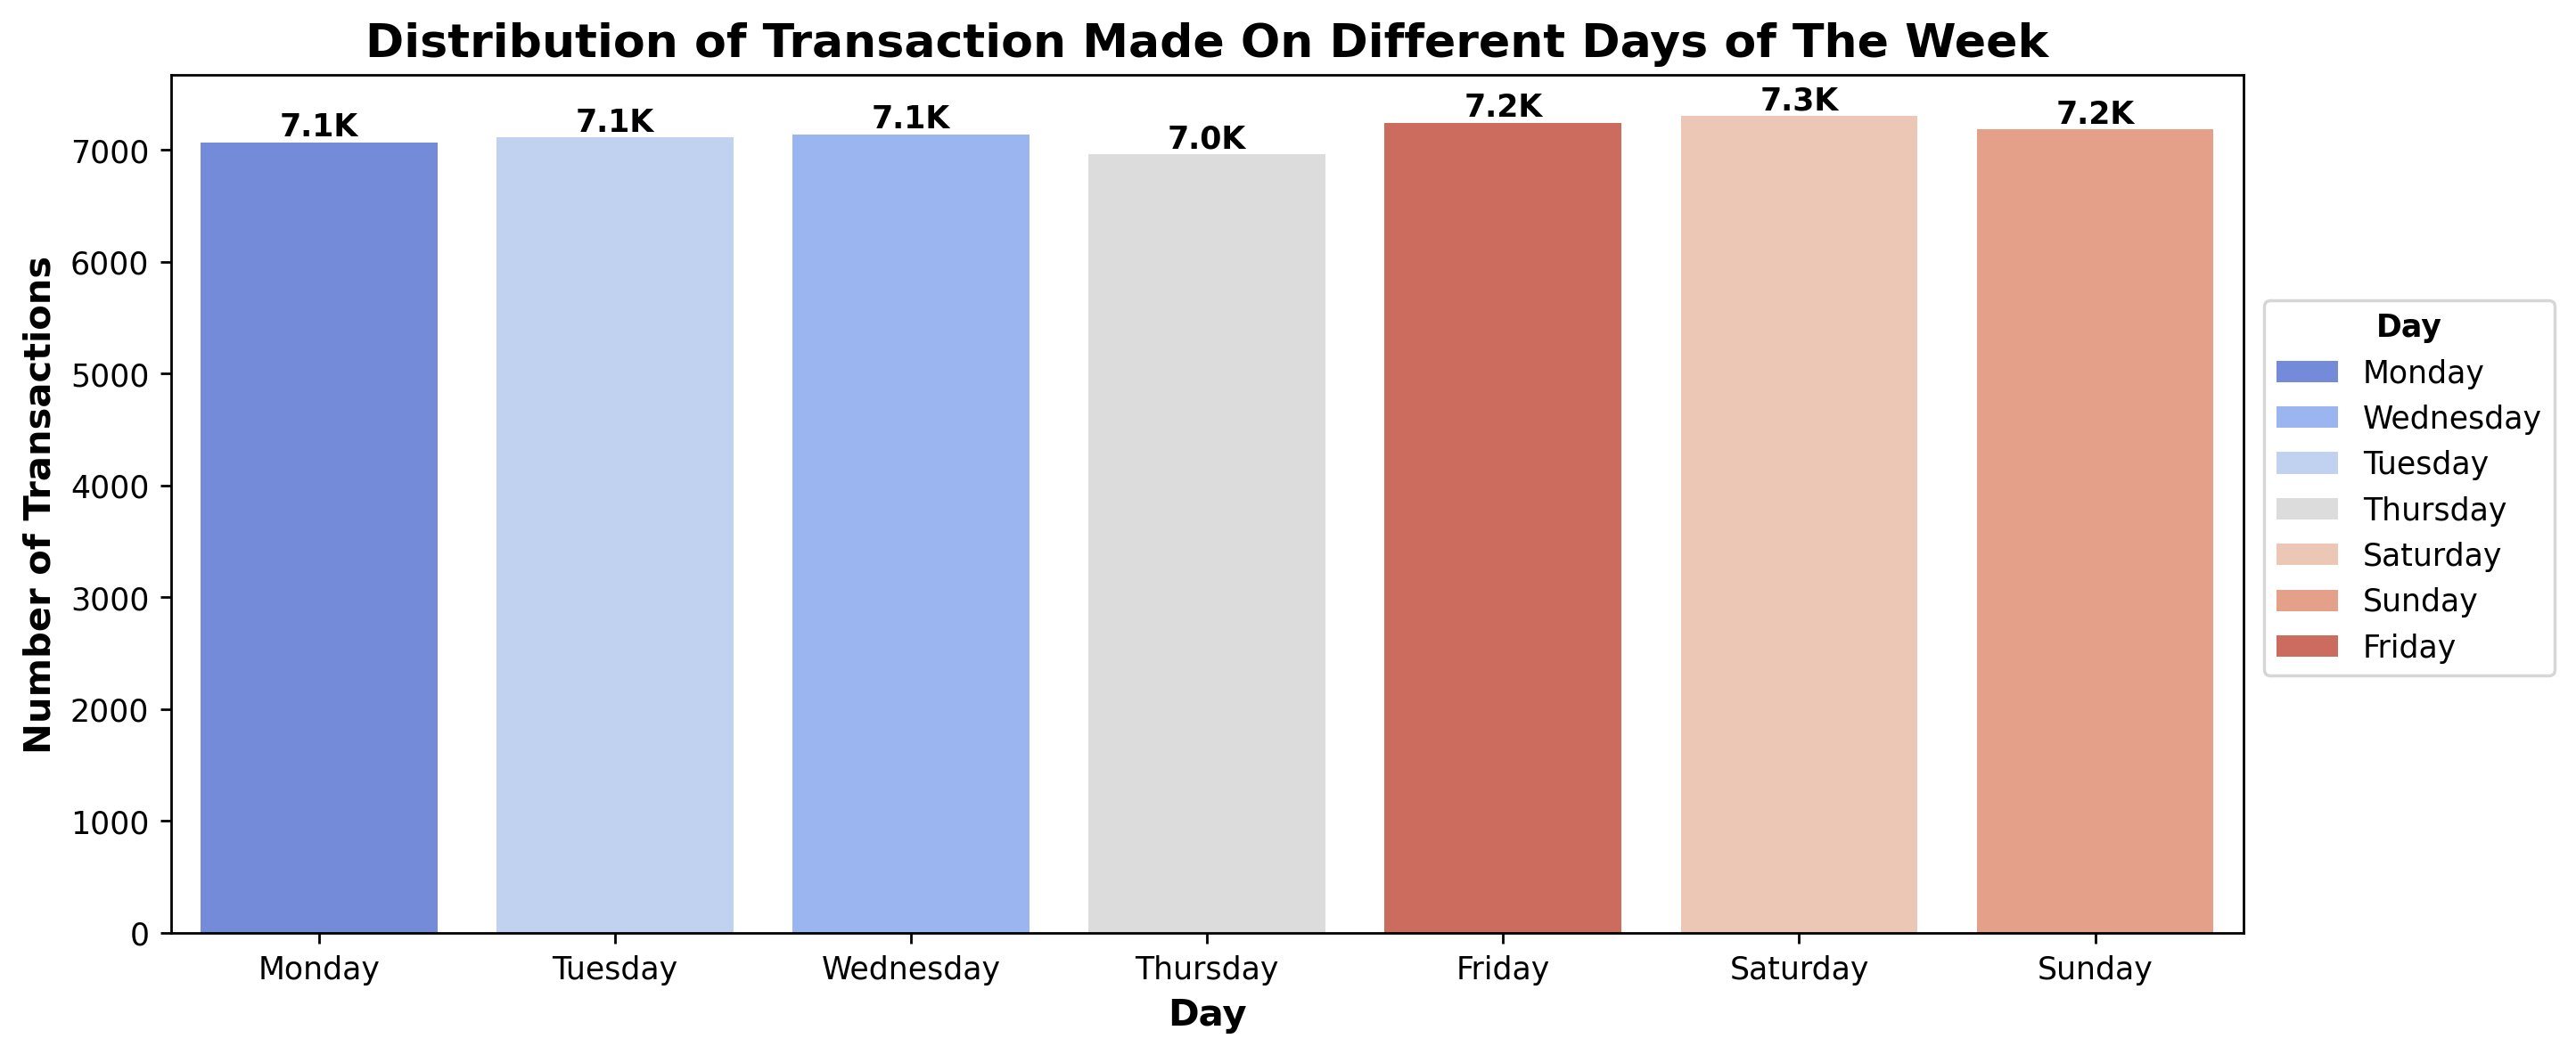

In [40]:
# Checking the distribution of transactions made on different days of the week
ax = sns.countplot(
    data = transactions_df,
    x = "day_of_week",
    hue = "day_of_week",
    palette = 'coolwarm',
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Made On Different Days of The Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Day", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.3));

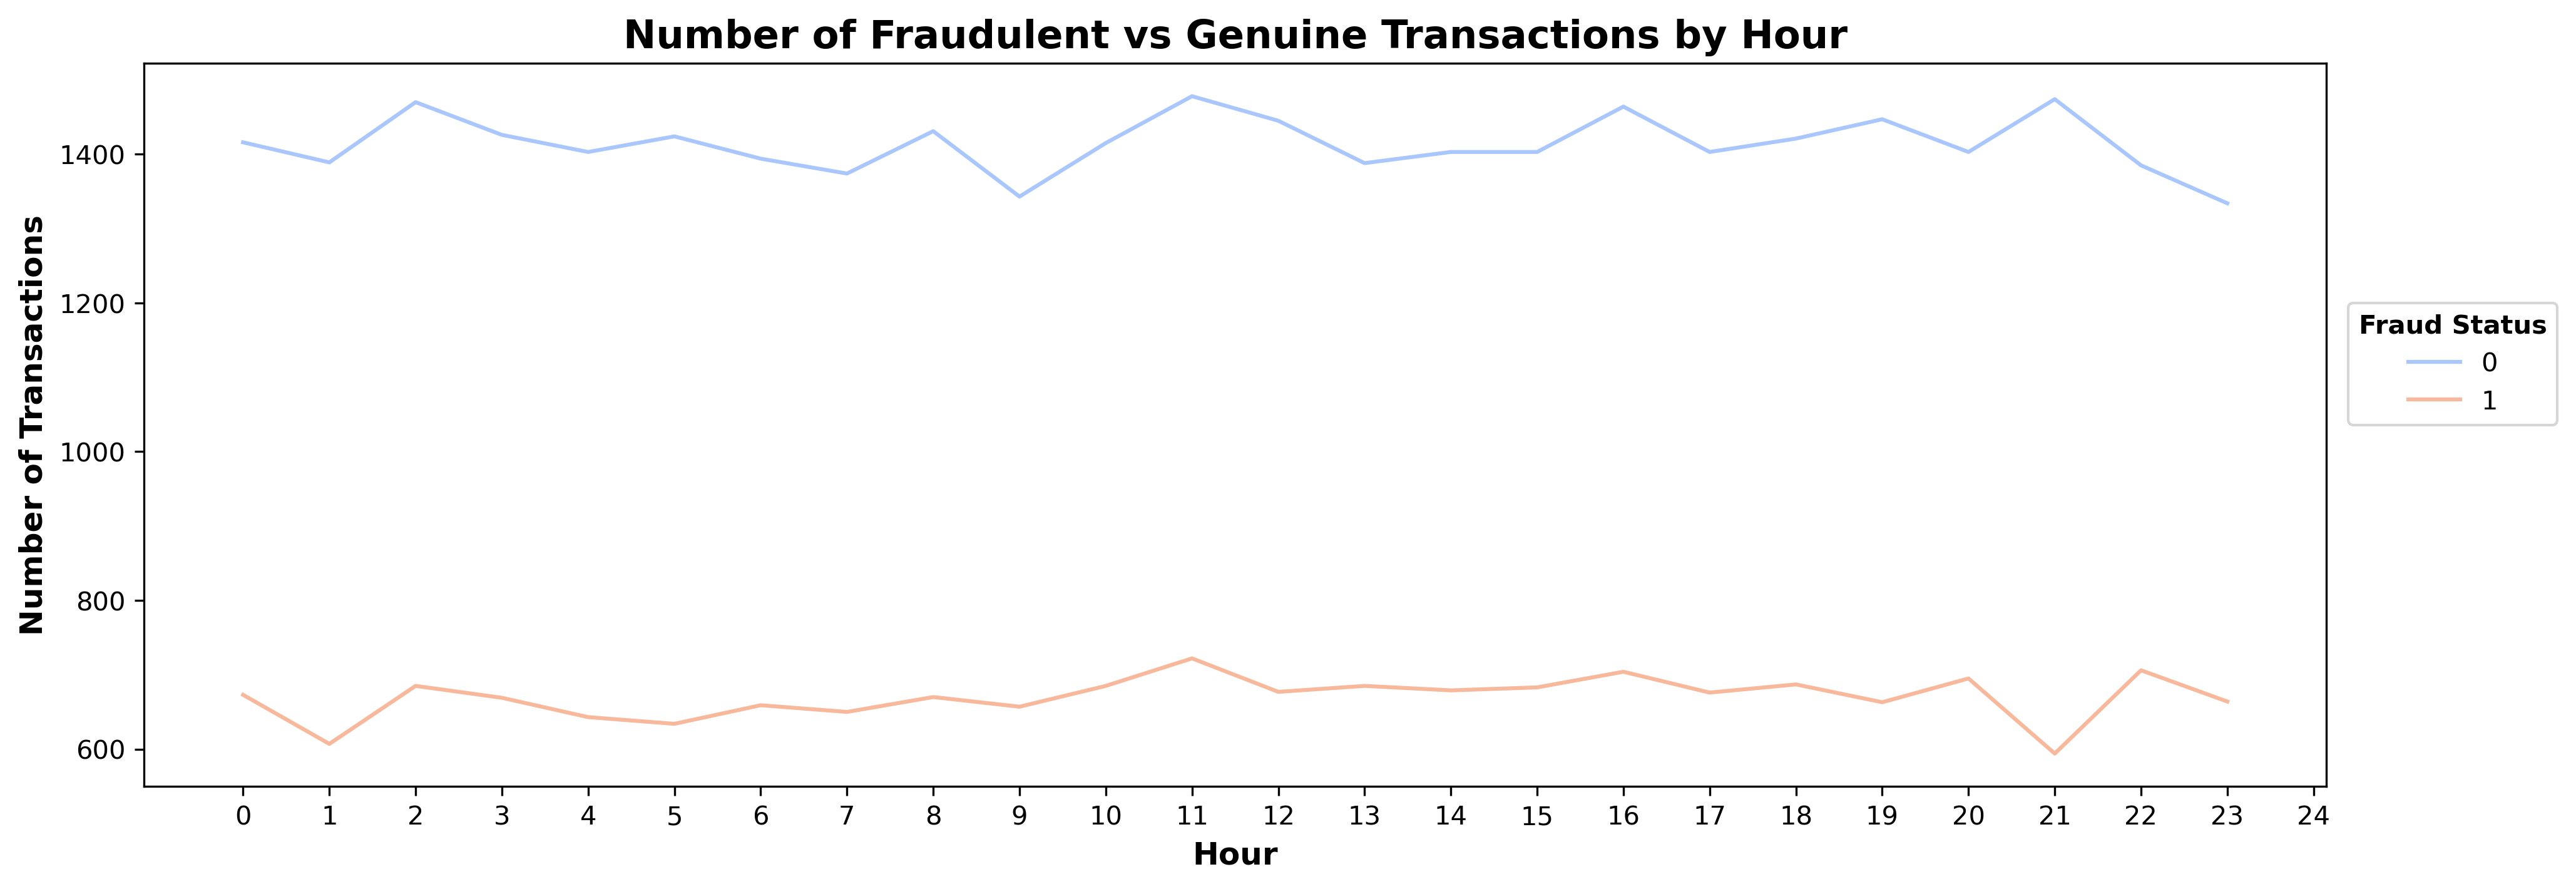

In [41]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each hour
sns.lineplot(
    data = transactions_df.groupby(["transaction_hour", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_hour",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 25))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));


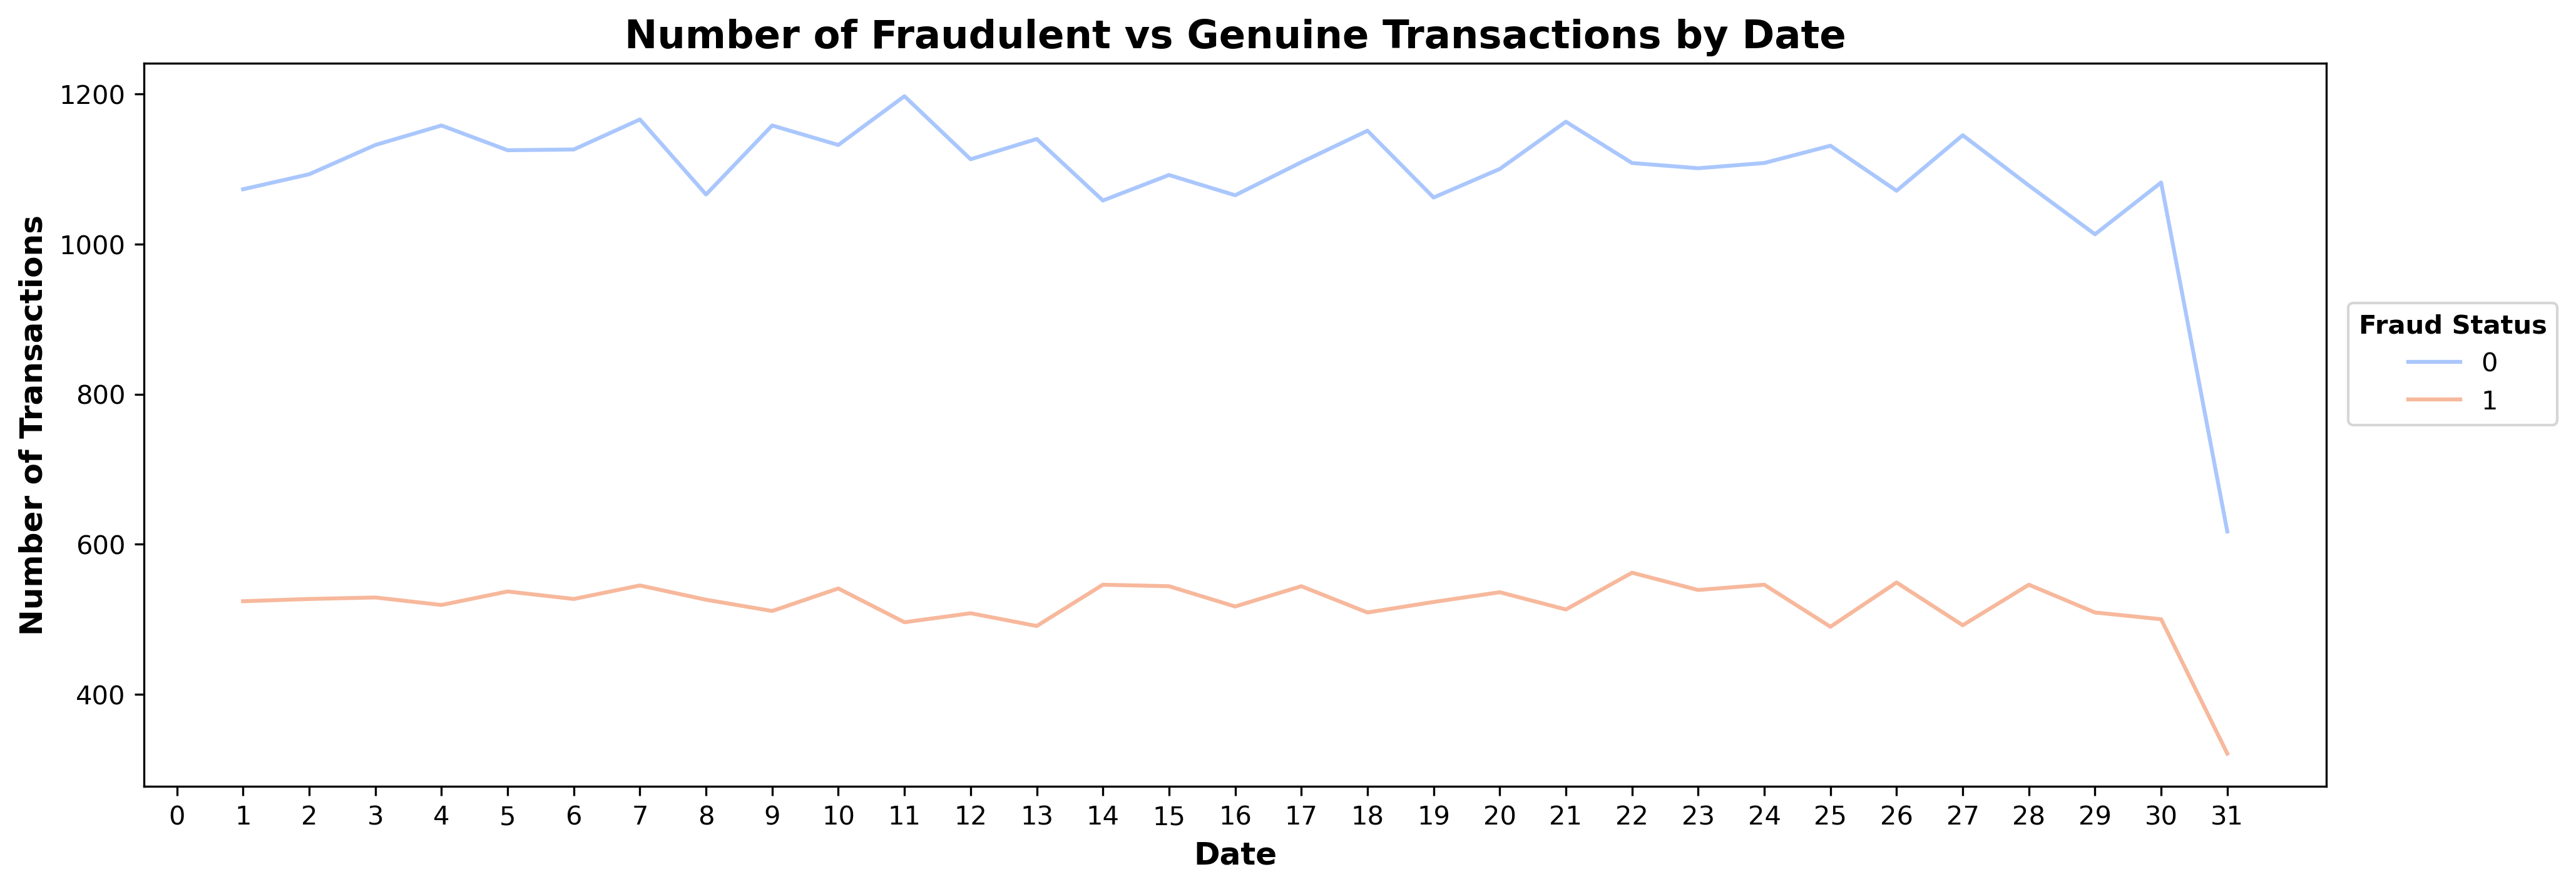

In [42]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each date
sns.lineplot(
    data = transactions_df.groupby(["transaction_date", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_date",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 32))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

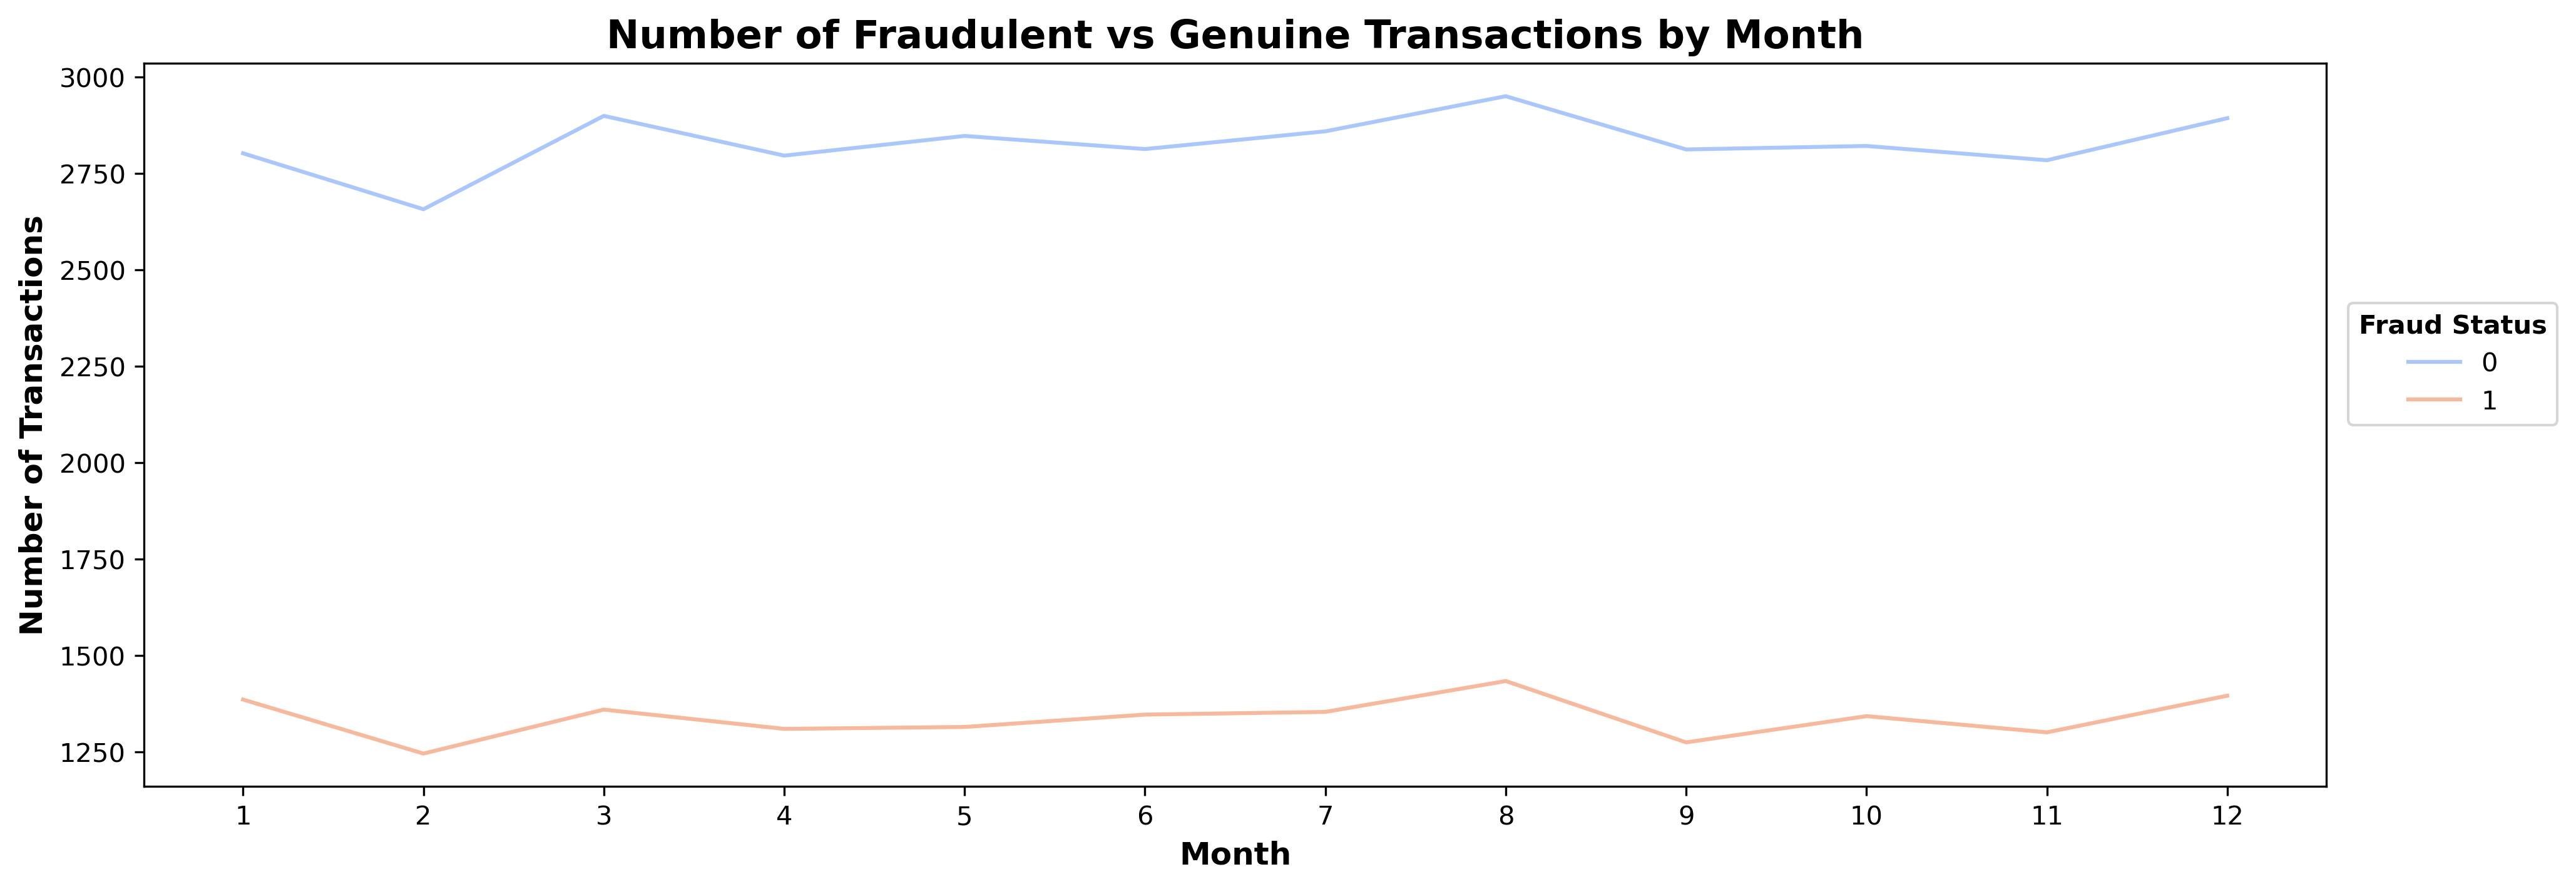

In [43]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how many fraudulent vs genuine transactions were made each month
sns.lineplot(
    data = transactions_df.groupby(["transaction_month", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_month",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(1, 13))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

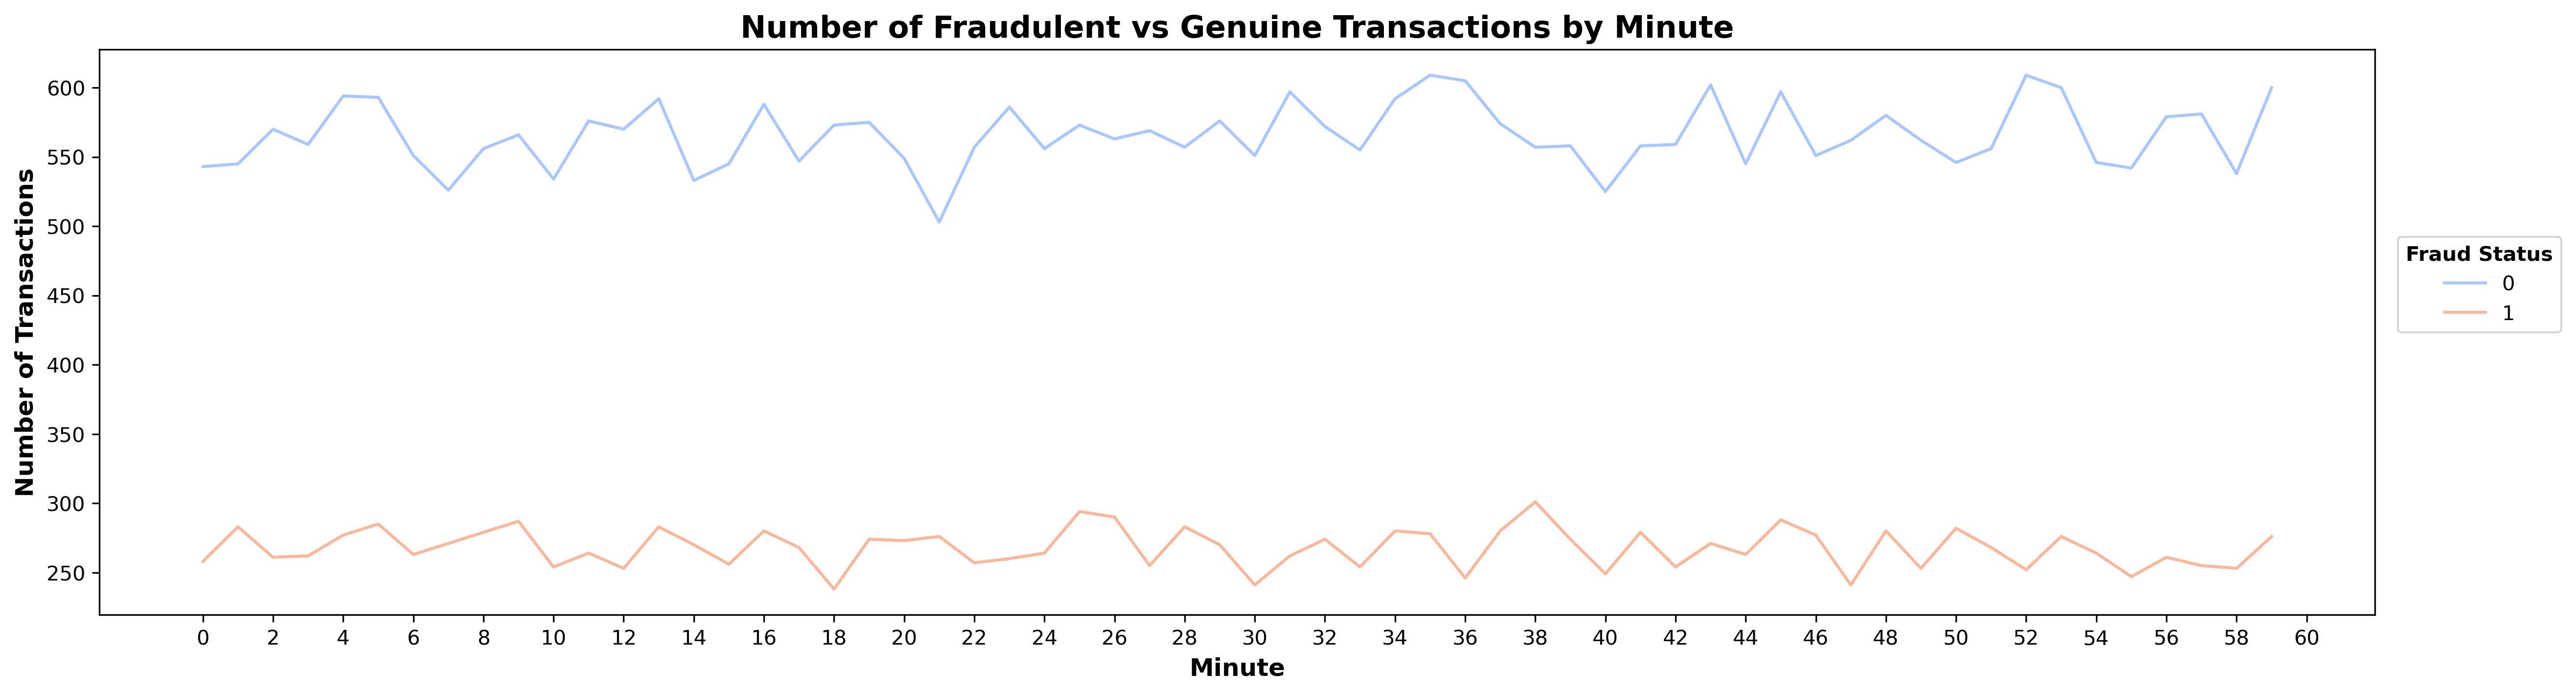

In [44]:
# Setting plot size
plt.figure(figsize = (20, 5), dpi = 300)

# Checking how many transactions were made each min
sns.lineplot(
    data = transactions_df.groupby(["transaction_min", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_min",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Adding title and labels to the plot
plt.title("Number of Fraudulent vs Genuine Transactions by Minute")
plt.xlabel("Minute")
plt.ylabel("Number of Transactions")

# Changing xtick values
plt.xticks(range(0, 61, 2))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

In [45]:
# Filtering out the fradulent transactions and groupping them by day of the month
fraud_df_month = transactions_df.groupby("transaction_date", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_month["fraud_rate"] = fraud_df_month["fraudulent_transaction_count"] / fraud_df_month["total_transaction_count"]
fraud_df_month

transaction_date  fraudulent_transaction_count  total_transaction_count  \
0                  1                           524                     1597   
1                  2                           527                     1620   
2                  3                           529                     1661   
3                  4                           519                     1677   
4                  5                           537                     1662   
5                  6                           527                     1653   
6                  7                           545                     1711   
7                  8                           526                     1592   
8                  9                           511                     1669   
9                 10                           541                     1673   
10                11                           496                     1693   
11                12                           508                     1621   
12                13                           491                     1631   
13                14                           546                     1604   
14                15                           544                     1636   
15                16                           517                     1582   
16                17                           544                     1653   
17                18                           509                     1660   
18                19                           523                     1585   
19                20                           536                     1636   
20                21                           513                     1676   
21                22                           562                     1670   
22                23                           539                     1640   
23                24                           546                     1654   
24                25                           490                     1621   
25                26                           549                     1620   
26                27                           492                     1637   
27                28                           546                     1624   
28                29                           509                     1522   
29                30                           500                     1582   
30                31                           321                      938   

    fraud_rate  
0     0.328115  
1     0.325309  
2     0.318483  
3     0.309481  
4     0.323105  
5     0.318814  
6     0.318527  
7     0.330402  
8     0.306171  
9     0.323371  
10    0.292971  
11    0.313387  
12    0.301042  
13    0.340399  
14    0.332518  
15    0.326802  
16    0.329099  
17    0.306627  
18    0.329968  
19    0.327628  
20    0.306086  
21    0.336527  
22    0.328659  
23    0.330109  
24    0.302283  
25    0.338889  
26    0.300550  
27    0.336207  
28    0.334428  
29    0.316056  
30    0.342217

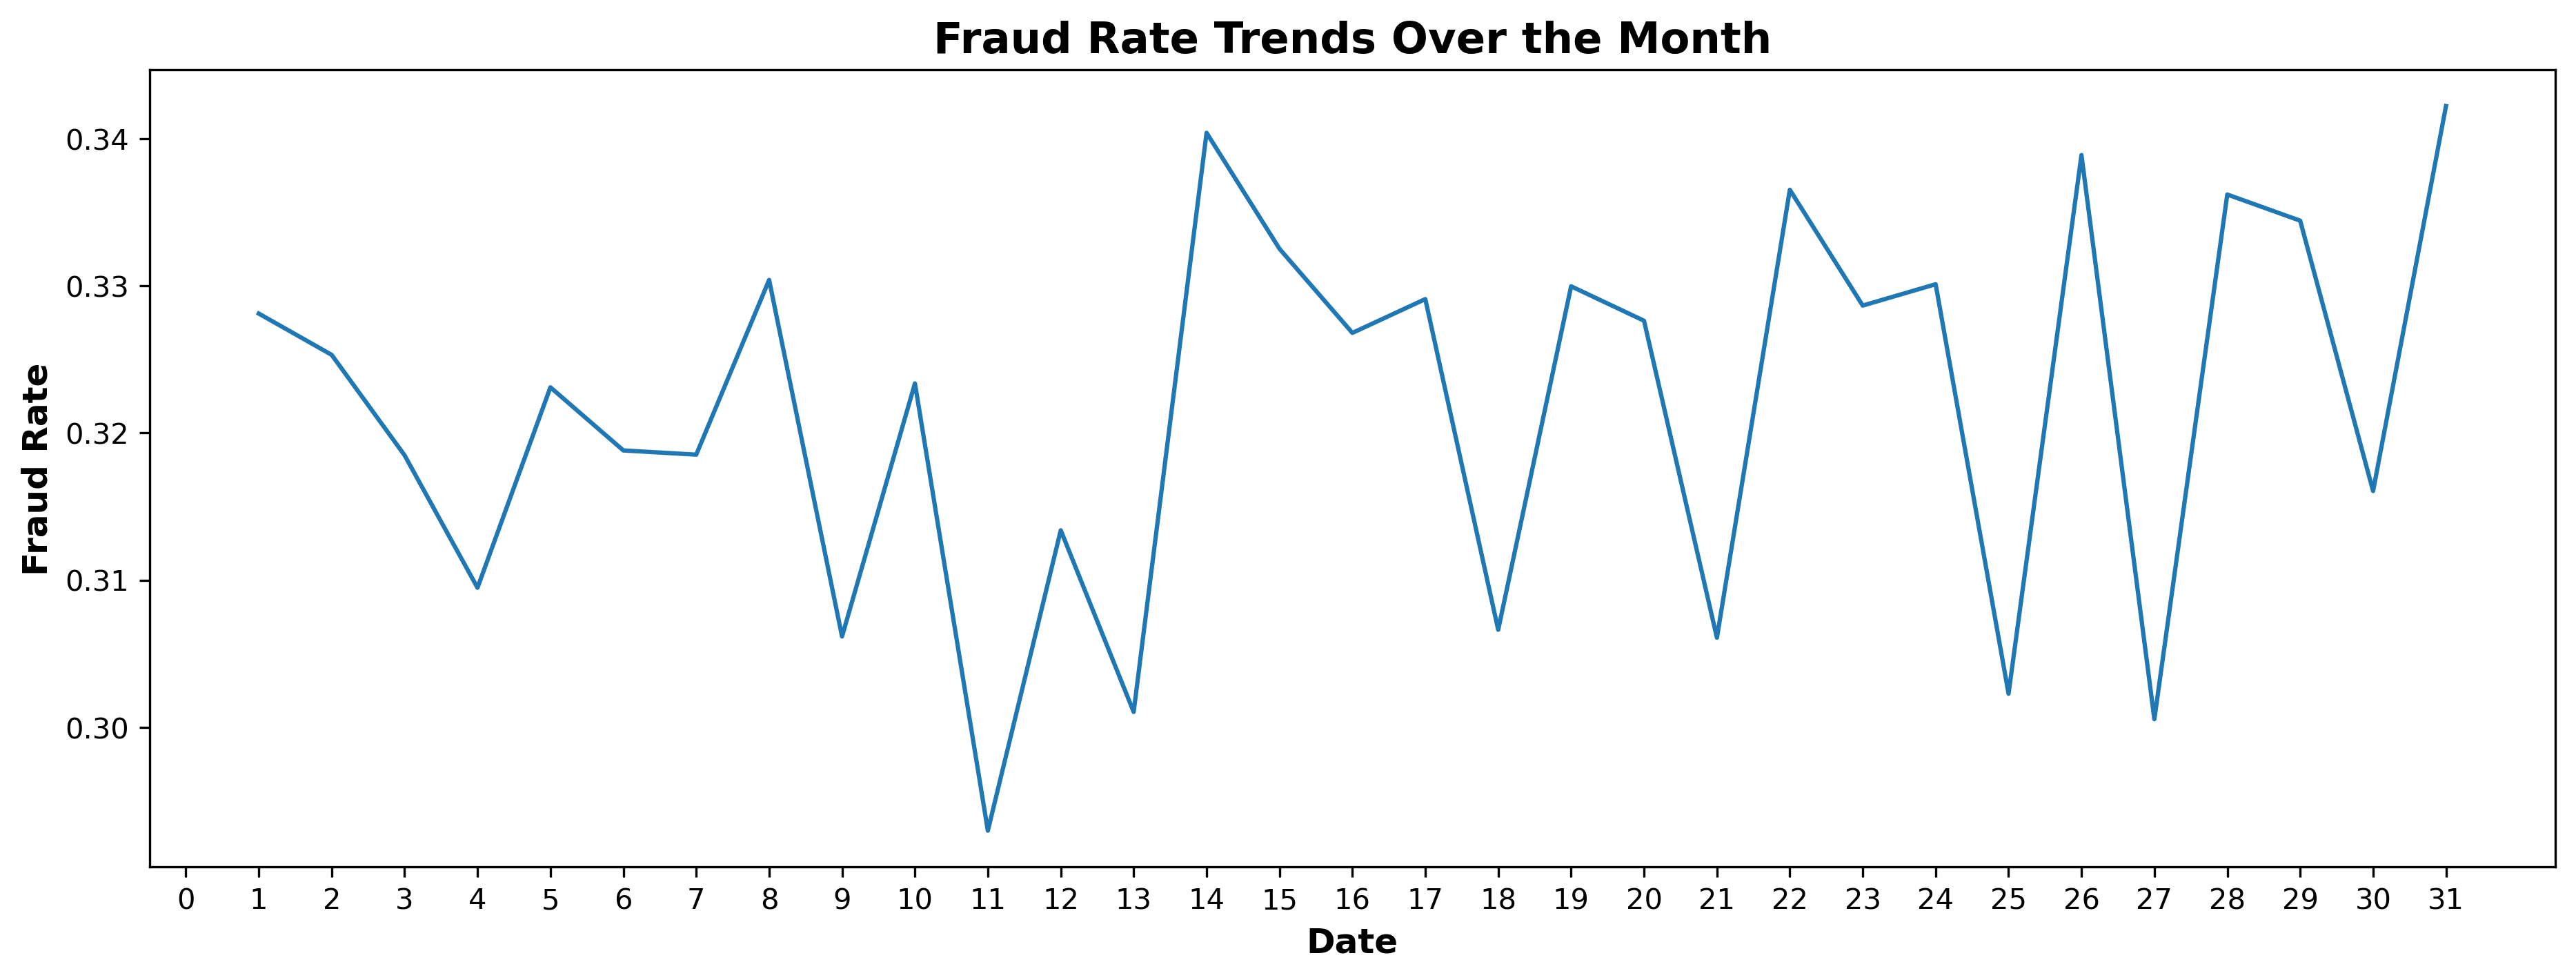

In [46]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how the fraud rate changes throughout the month
sns.lineplot(
    data = fraud_df_month,
    x = "transaction_date",
    y = "fraud_rate",
)

# Adding title and labels to the plot
plt.title("Fraud Rate Trends Over the Month")
plt.xlabel("Date")
plt.ylabel("Fraud Rate")

# Changing xtick values
plt.xticks(range(0, 32));

In [47]:
# Filtering out the fradulent transactions and groupping them by hour of the day
fraud_df_hour = transactions_df.groupby("transaction_hour", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_hour["fraud_rate"] = fraud_df_hour["fraudulent_transaction_count"] / fraud_df_hour["total_transaction_count"]
fraud_df_hour

transaction_hour  fraudulent_transaction_count  total_transaction_count  \
0                  0                           673                     2089   
1                  1                           607                     1996   
2                  2                           685                     2155   
3                  3                           669                     2095   
4                  4                           643                     2046   
5                  5                           634                     2058   
6                  6                           659                     2053   
7                  7                           650                     2024   
8                  8                           670                     2101   
9                  9                           657                     2000   
10                10                           685                     2100   
11                11                           722                     2200   
12                12                           677                     2122   
13                13                           685                     2073   
14                14                           679                     2082   
15                15                           683                     2086   
16                16                           704                     2168   
17                17                           676                     2079   
18                18                           687                     2108   
19                19                           663                     2110   
20                20                           695                     2098   
21                21                           594                     2068   
22                22                           706                     2091   
23                23                           664                     1998   

    fraud_rate  
0     0.322164  
1     0.304108  
2     0.317865  
3     0.319332  
4     0.314272  
5     0.308066  
6     0.320994  
7     0.321146  
8     0.318896  
9     0.328500  
10    0.326190  
11    0.328182  
12    0.319039  
13    0.330439  
14    0.326129  
15    0.327421  
16    0.324723  
17    0.325156  
18    0.325901  
19    0.314218  
20    0.331268  
21    0.287234  
22    0.337637  
23    0.332332

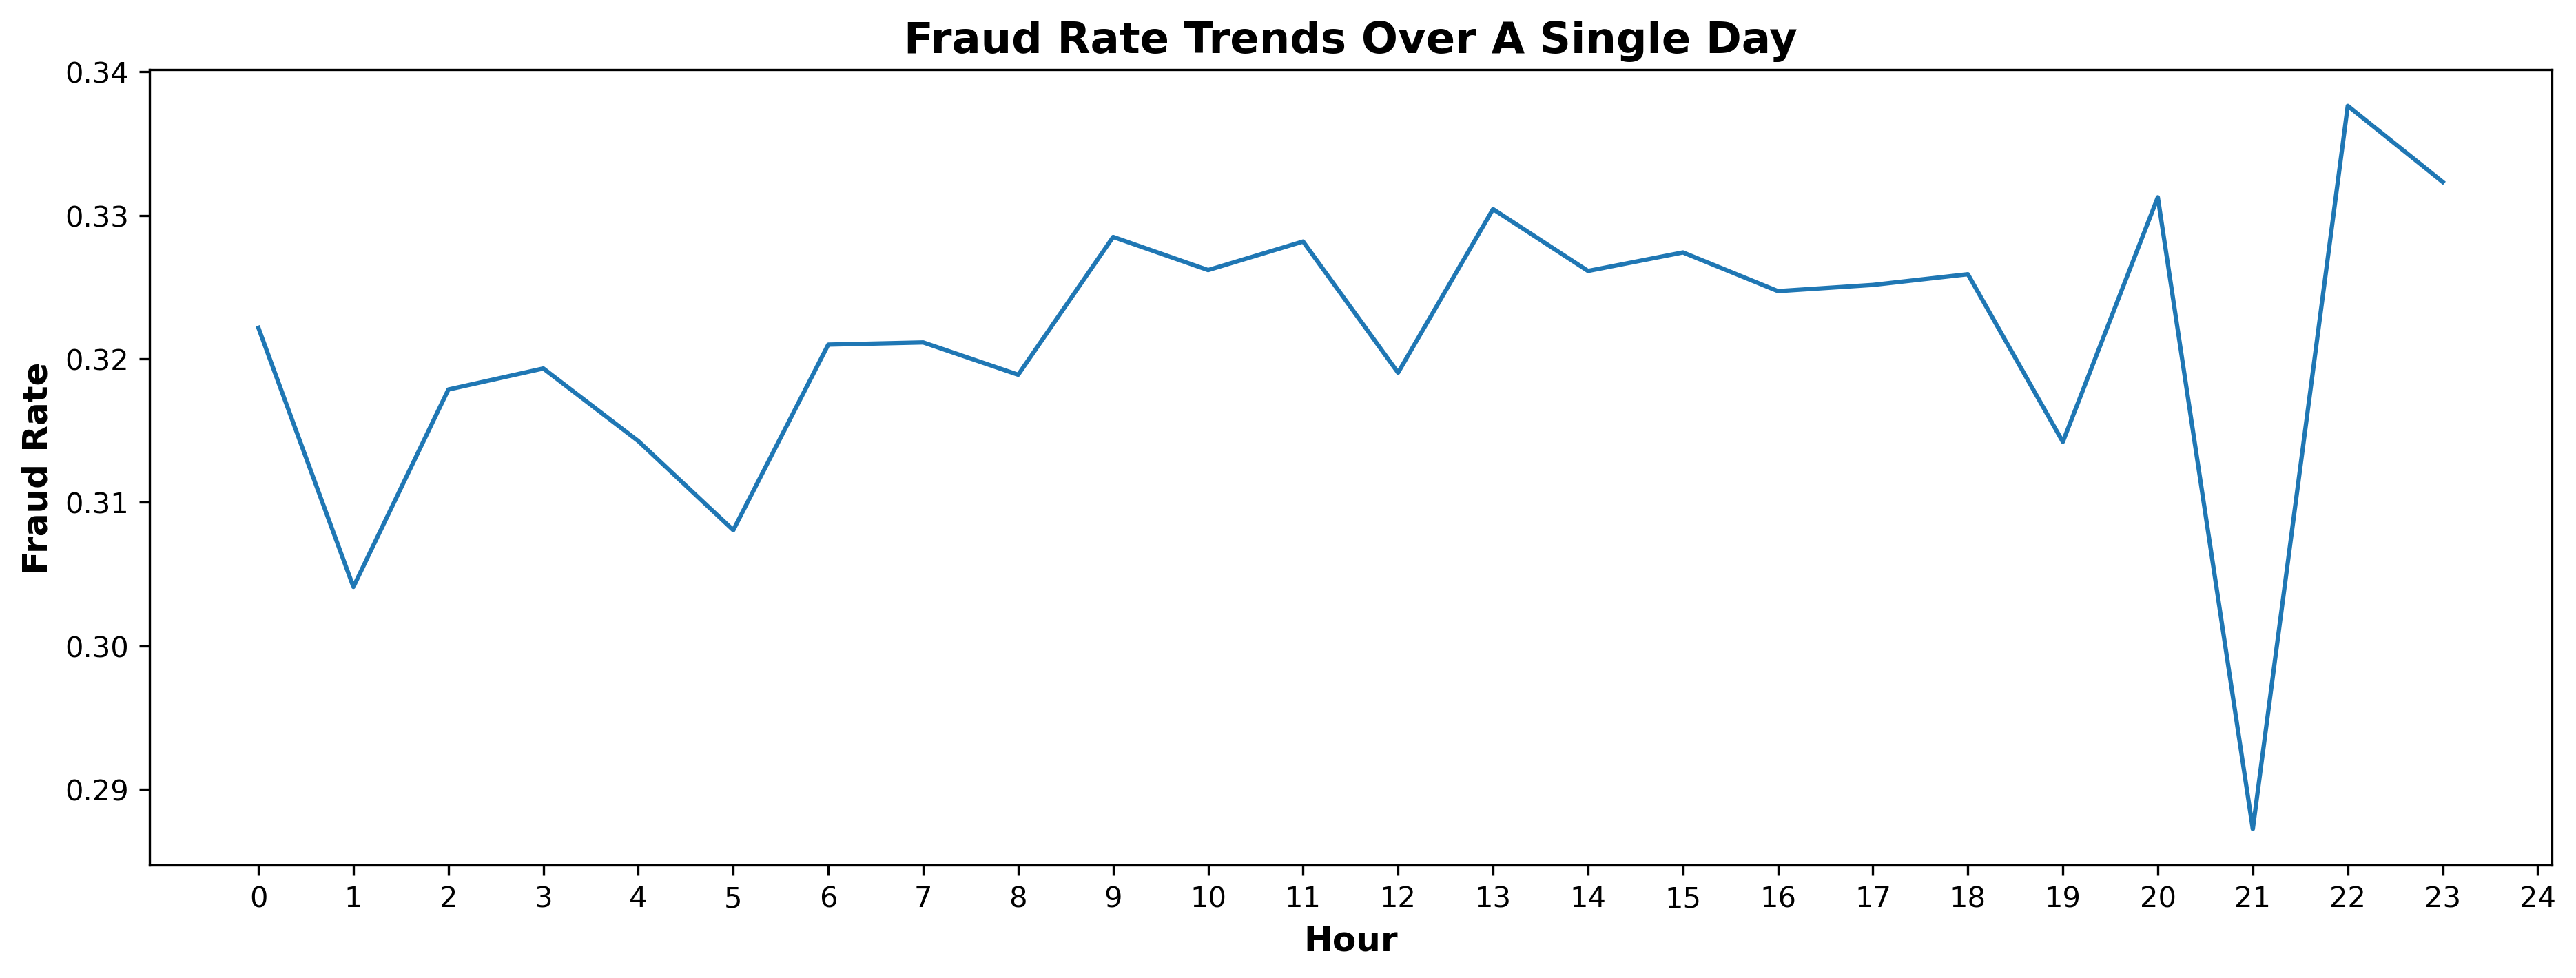

In [48]:
# Setting plot size
plt.figure(figsize = (15, 5), dpi = 300)

# Checking how the fraud rate changes throughout the day
sns.lineplot(
    data = fraud_df_hour,
    x = "transaction_hour",
    y = "fraud_rate",
)

# Adding title and labels to the plot
plt.title("Fraud Rate Trends Over A Single Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")

# Changing xtick values
plt.xticks(range(0, 25));

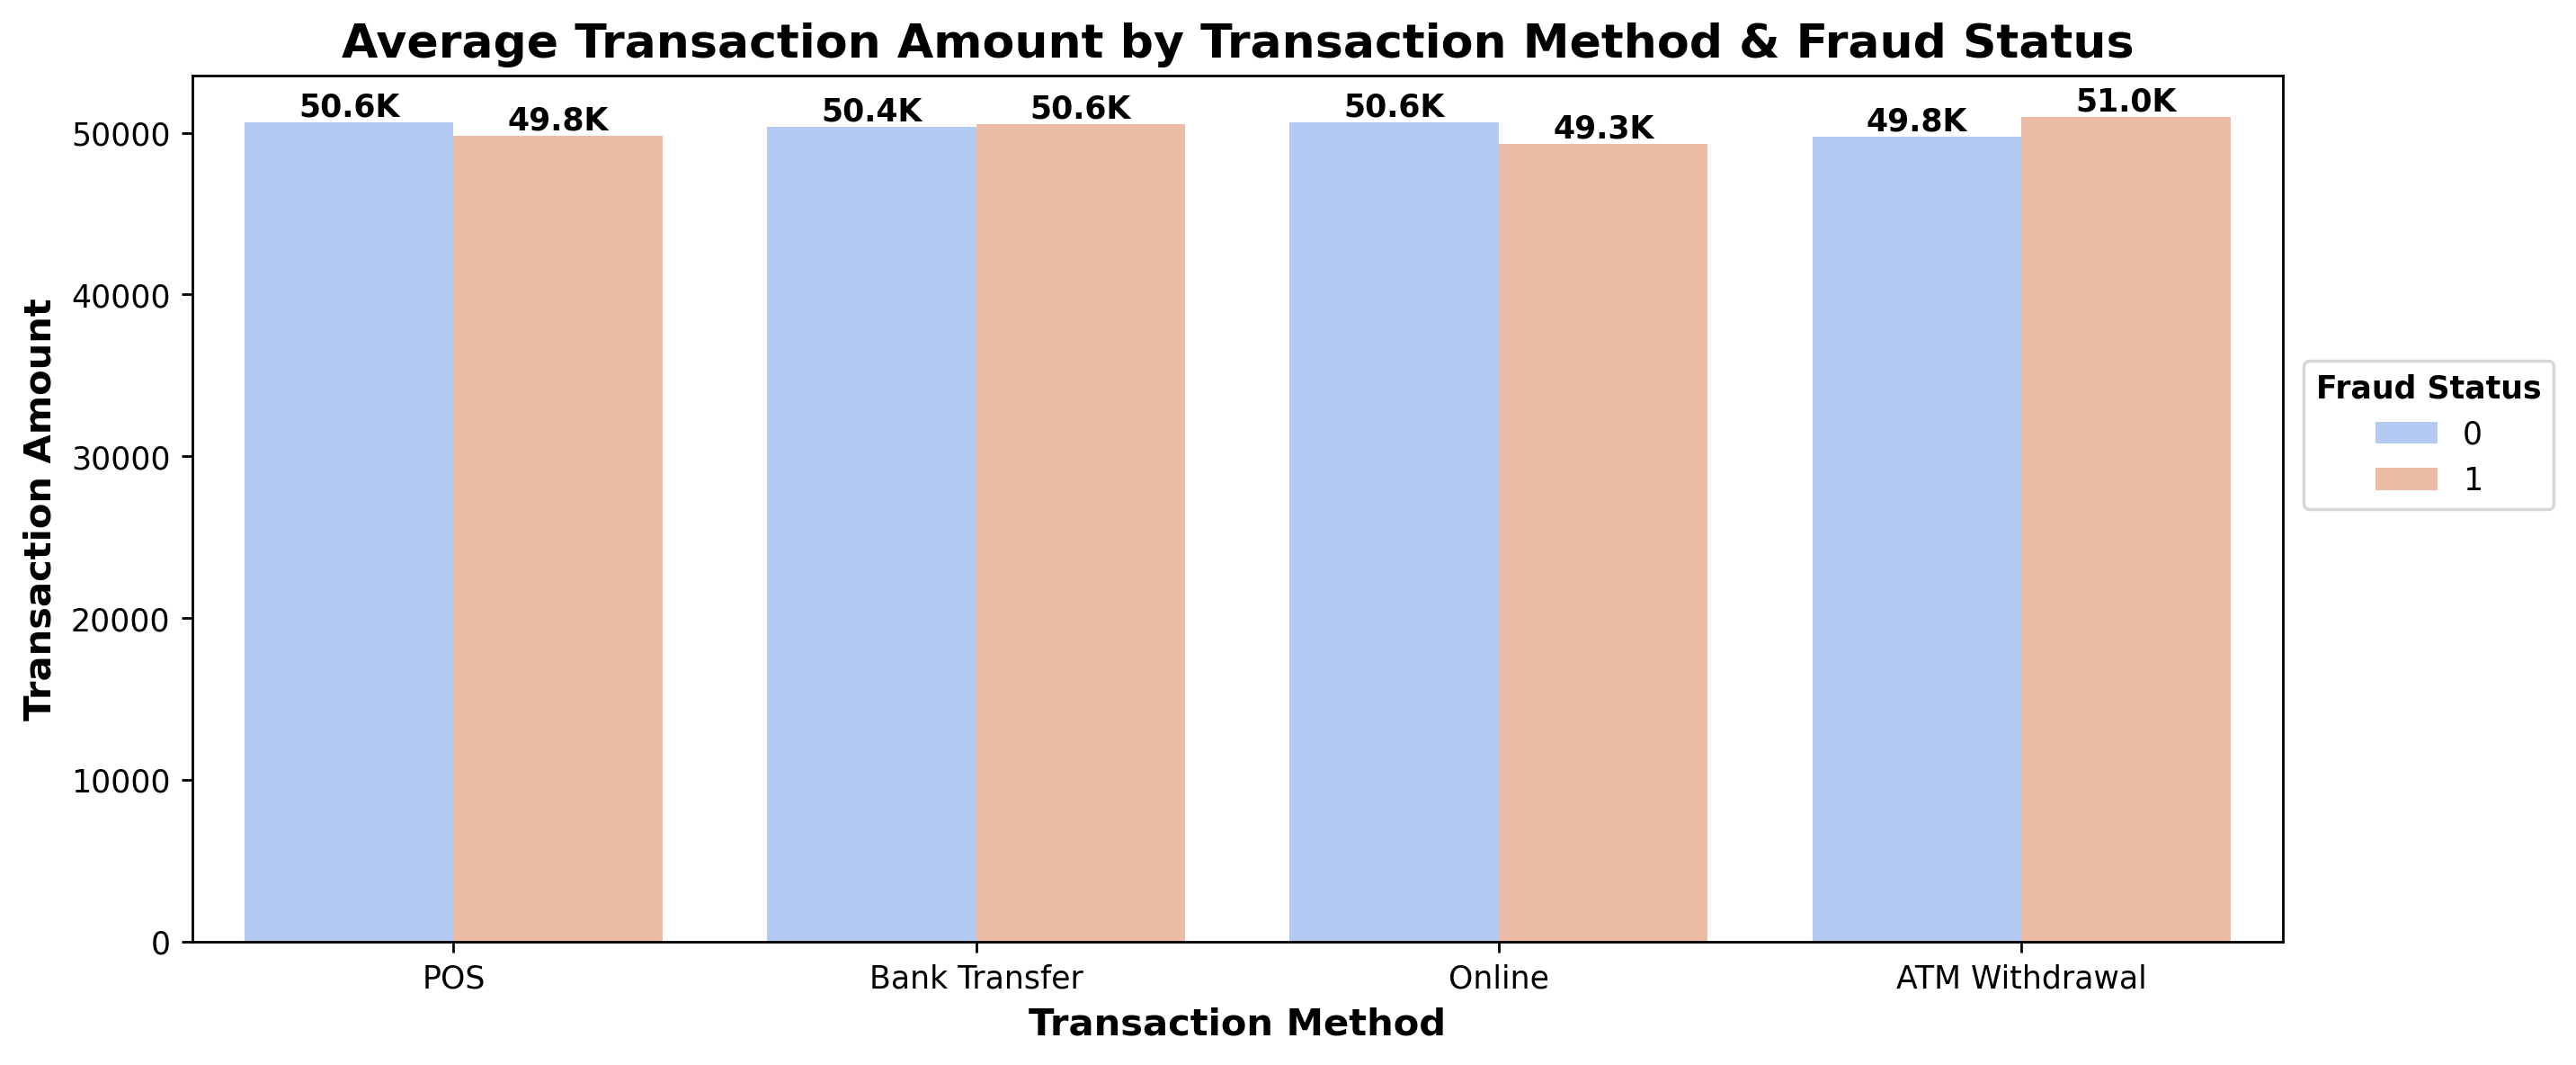

In [49]:
# Checking the average account balance for each transaction method separated by fraud status
ax = sns.barplot(
    data = transactions_df,
    x = "transaction_method",
    y = "account_balance",
    hue = "fraud_label",
    palette = "coolwarm",
    errorbar = None
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Average Transaction Amount by Transaction Method & Fraud Status")
plt.xlabel("Transaction Method")
plt.ylabel("Transaction Amount")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

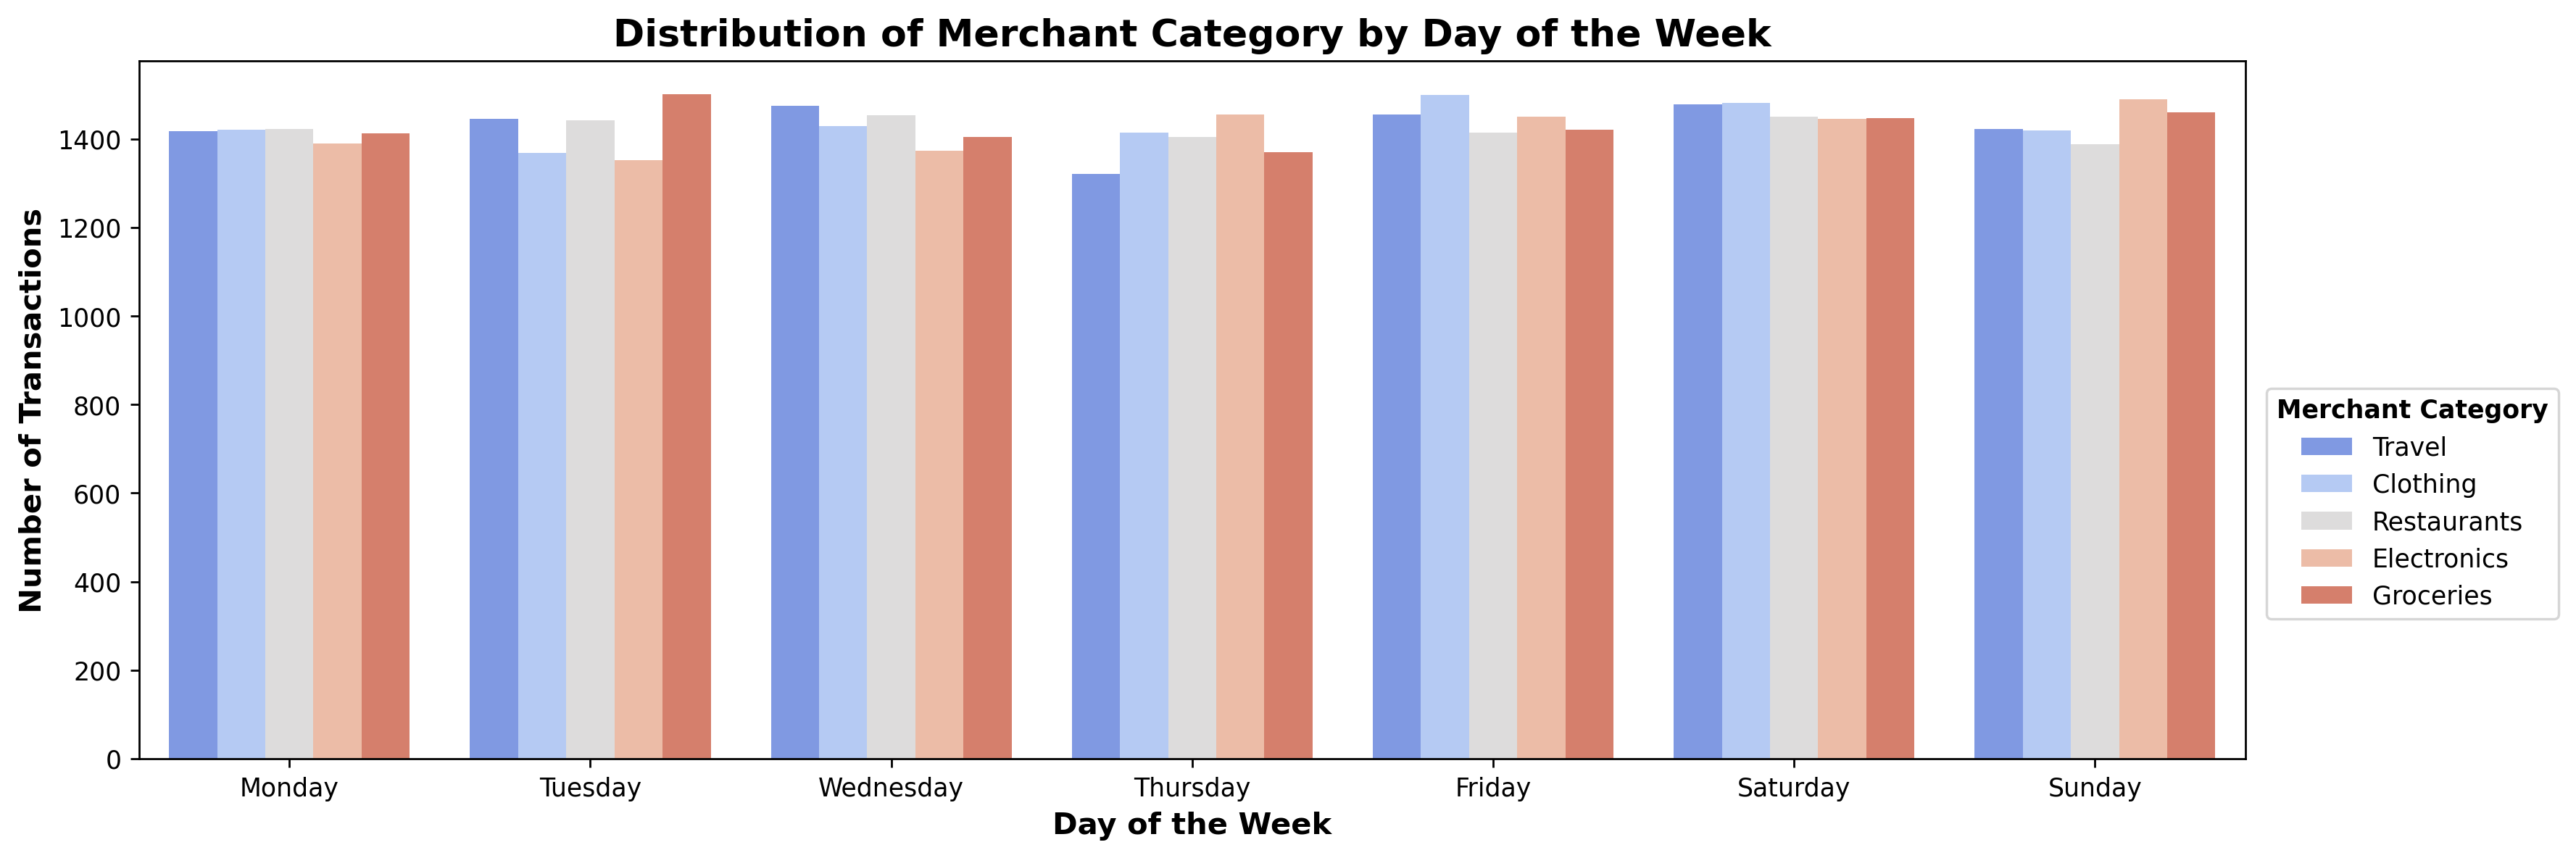

In [50]:
# Setting plot size
plt.figure(figsize = (15, 5))

# Checking how does the merchant category vary across different days of the week
ax = sns.countplot(
    data = transactions_df,
    x = "day_of_week",
    hue = "merchant_category",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Adding title and labels to the plot
plt.title("Distribution of Merchant Category by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Merchant Category", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.2));

In [51]:
# Create a new column to classify transactions as high-value or not based on 75th Quantile value
threshold = transactions_df['transaction_amount'].quantile(q=0.75)
transactions_df['is_high_value_transaction'] = transactions_df['transaction_amount'] > threshold
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_date  transaction_month  \
0                19                14                  8   
1                 4                 7                  6   
2                15                20                  6   
3                 0                 7                 12   
4                23                11                 11   

   is_high_value_transaction  
0                      False  
1                      False  
2                      False  
3                       True  
4                      False

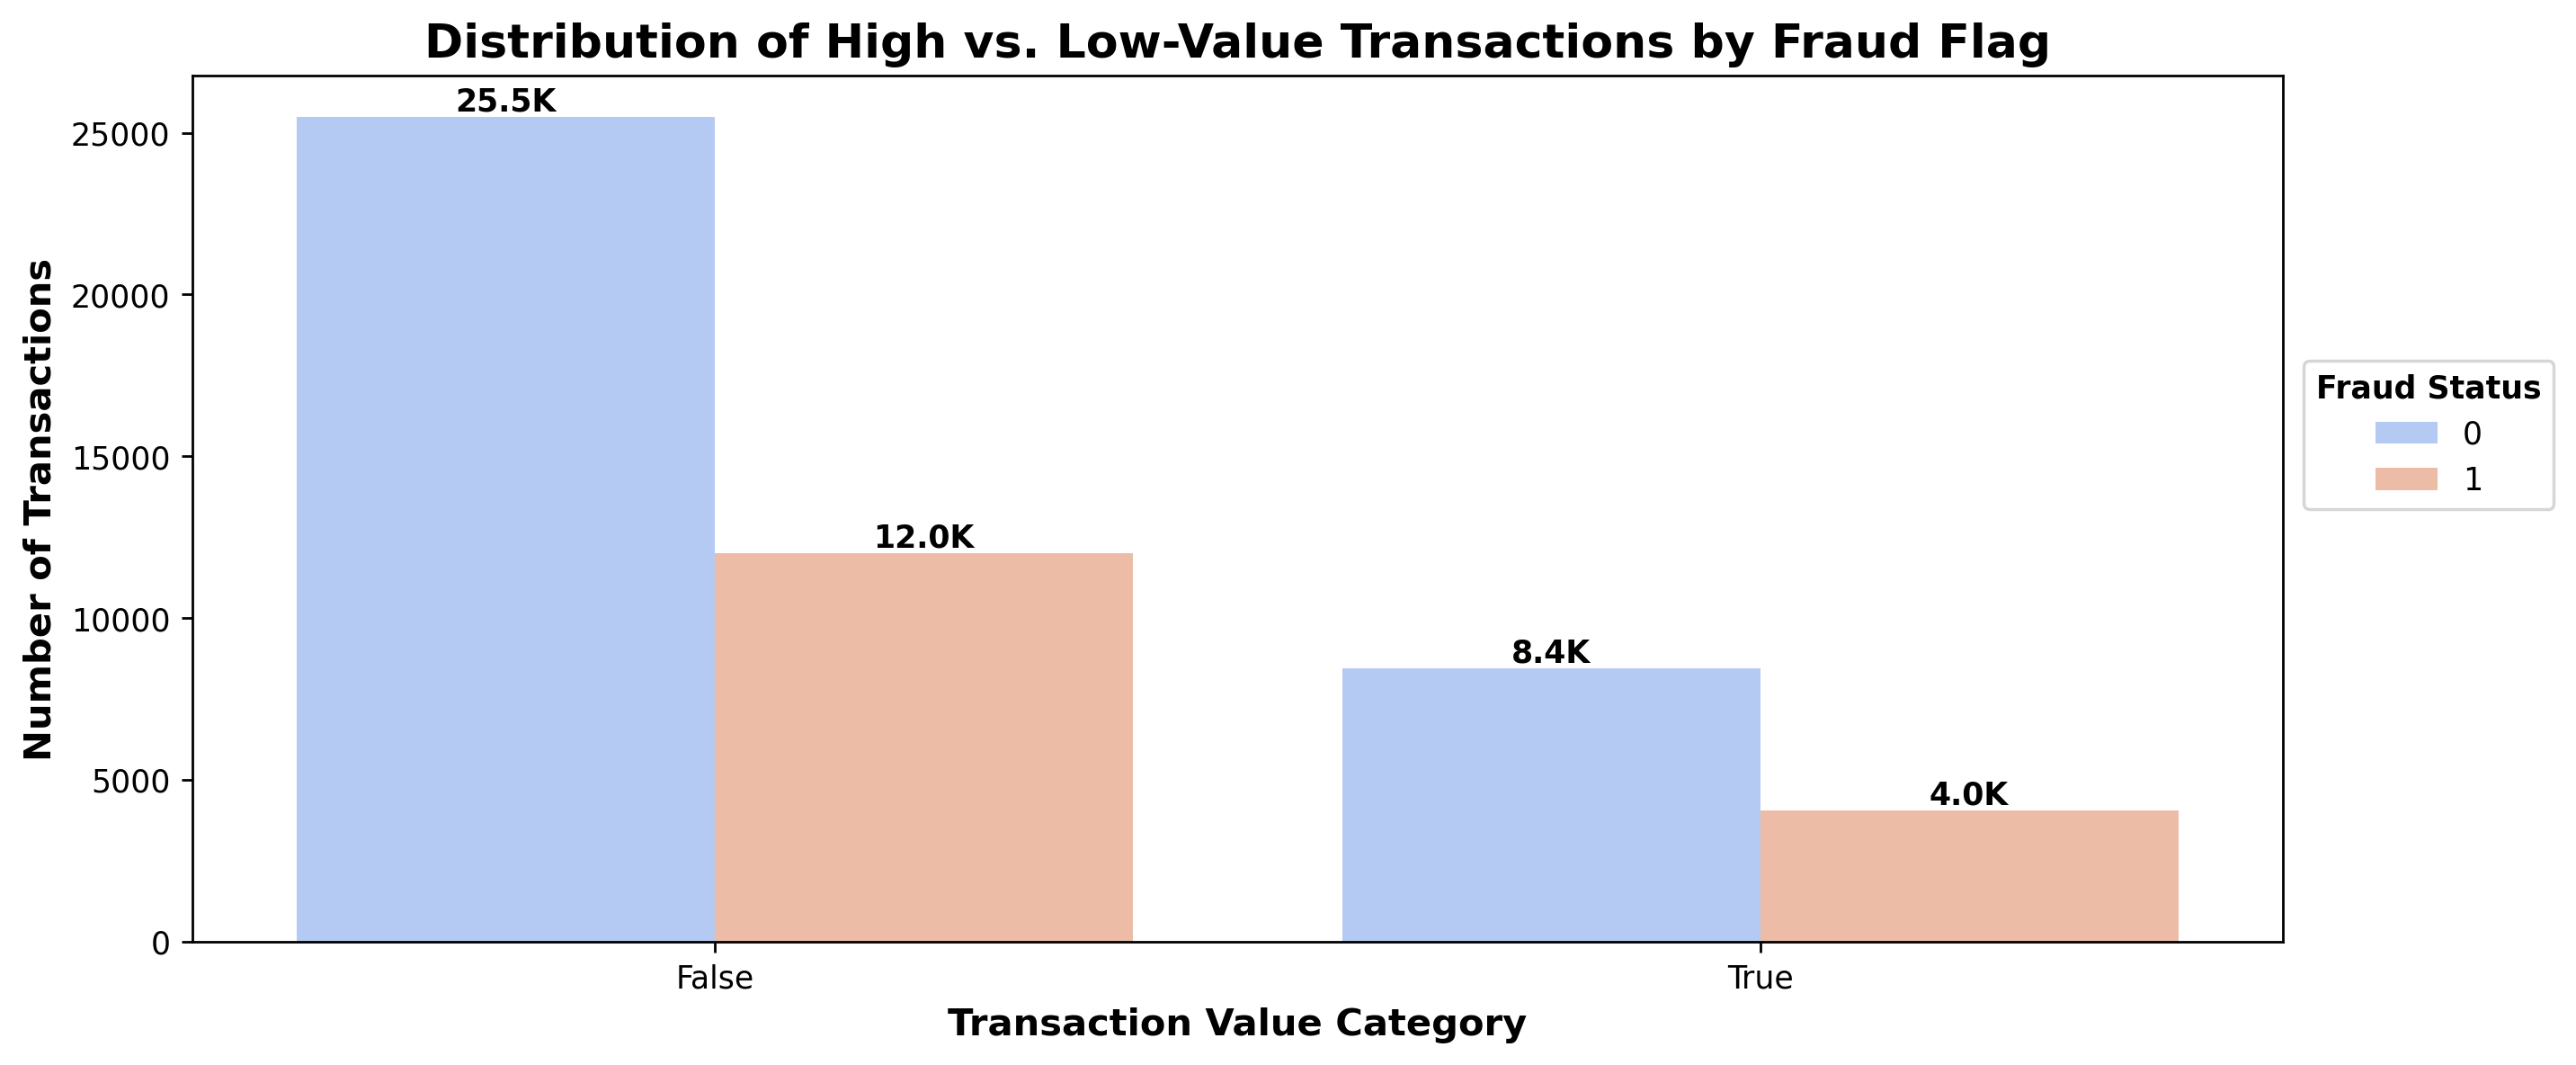

In [52]:
# Checking the number of high value vs low value transactions by fraud flag
ax = sns.countplot(
    data = transactions_df,
    x = "is_high_value_transaction",
    hue = "fraud_label",
    palette = "coolwarm"
)

# Annotating bars
annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of High vs. Low-Value Transactions by Fraud Flag")
plt.xlabel("Transaction Value Category")
plt.ylabel("Number of Transactions")

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

In [53]:
# Calculating a ratio between transaction amount and account balance
transactions_df["transaction_amount_to_balance_ratio"] = transactions_df["transaction_amount"] / transactions_df["account_balance"]
transactions_df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_date  transaction_month  \
0                19                14                  8   
1                 4                 7                  6   
2                15                20                  6   
3                 0                 7                 12   
4                23                11                 11   

   is_high_value_transaction  transaction_amount_to_balance_ratio  
0                      False                             0.000427  
1                      False                             0.000016  
2                      False                             0.018226  
3                       True                             0.003311  
4                      False                             0.000339

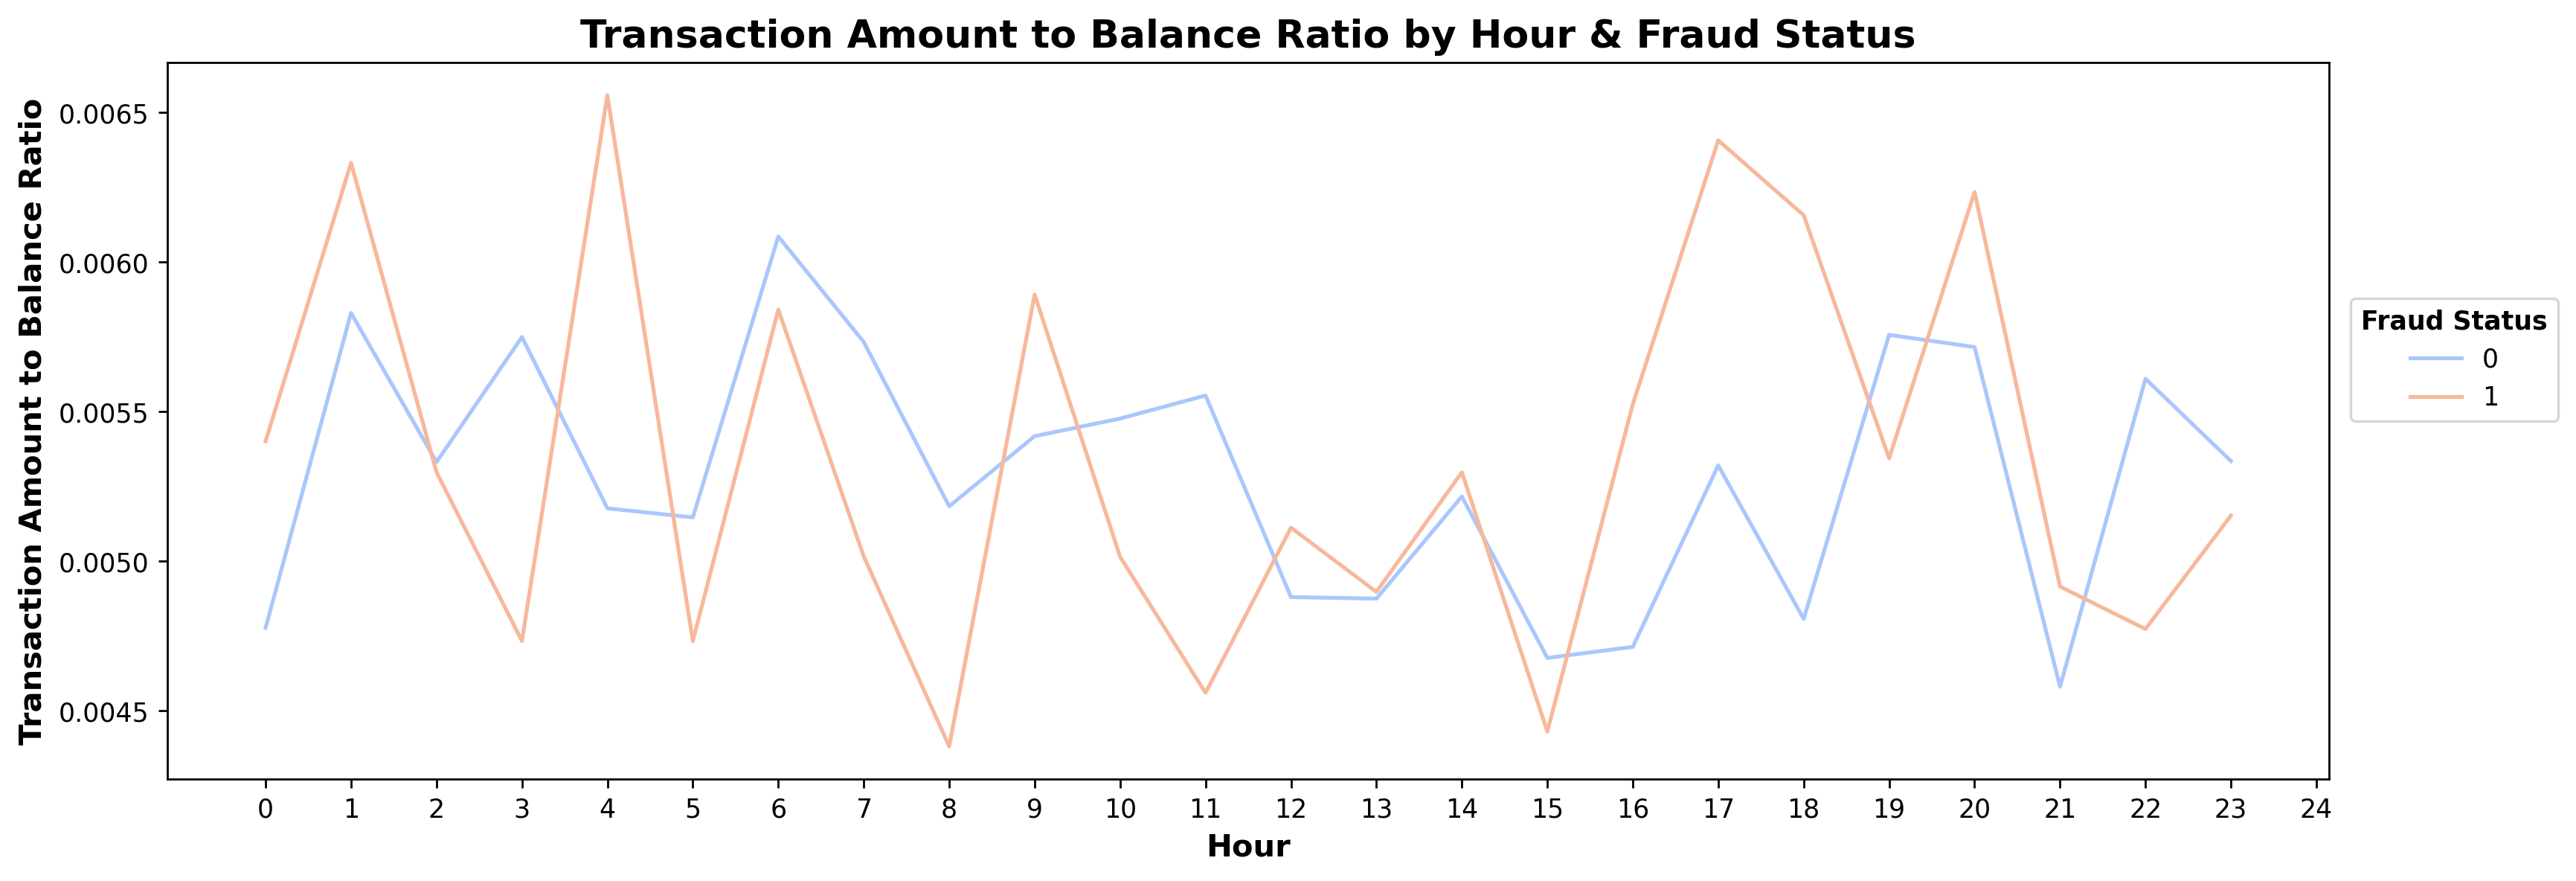

In [54]:
# Setting plot size
plt.figure(figsize = (15, 5))

# Checking how the transaction amount to balance ratio varies across different hours of the day by fraud status
sns.lineplot(
    data = transactions_df,
    x = "transaction_hour",
    y = "transaction_amount_to_balance_ratio",
    hue = "fraud_label",
    palette = "coolwarm",
    errorbar = None
)

# Adding title and labels to the plot
plt.title("Transaction Amount to Balance Ratio by Hour & Fraud Status")
plt.xlabel("Hour")
plt.ylabel("Transaction Amount to Balance Ratio")

# Setting xtick values
plt.xticks(range(0, 25))

# Setting location of the legend
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

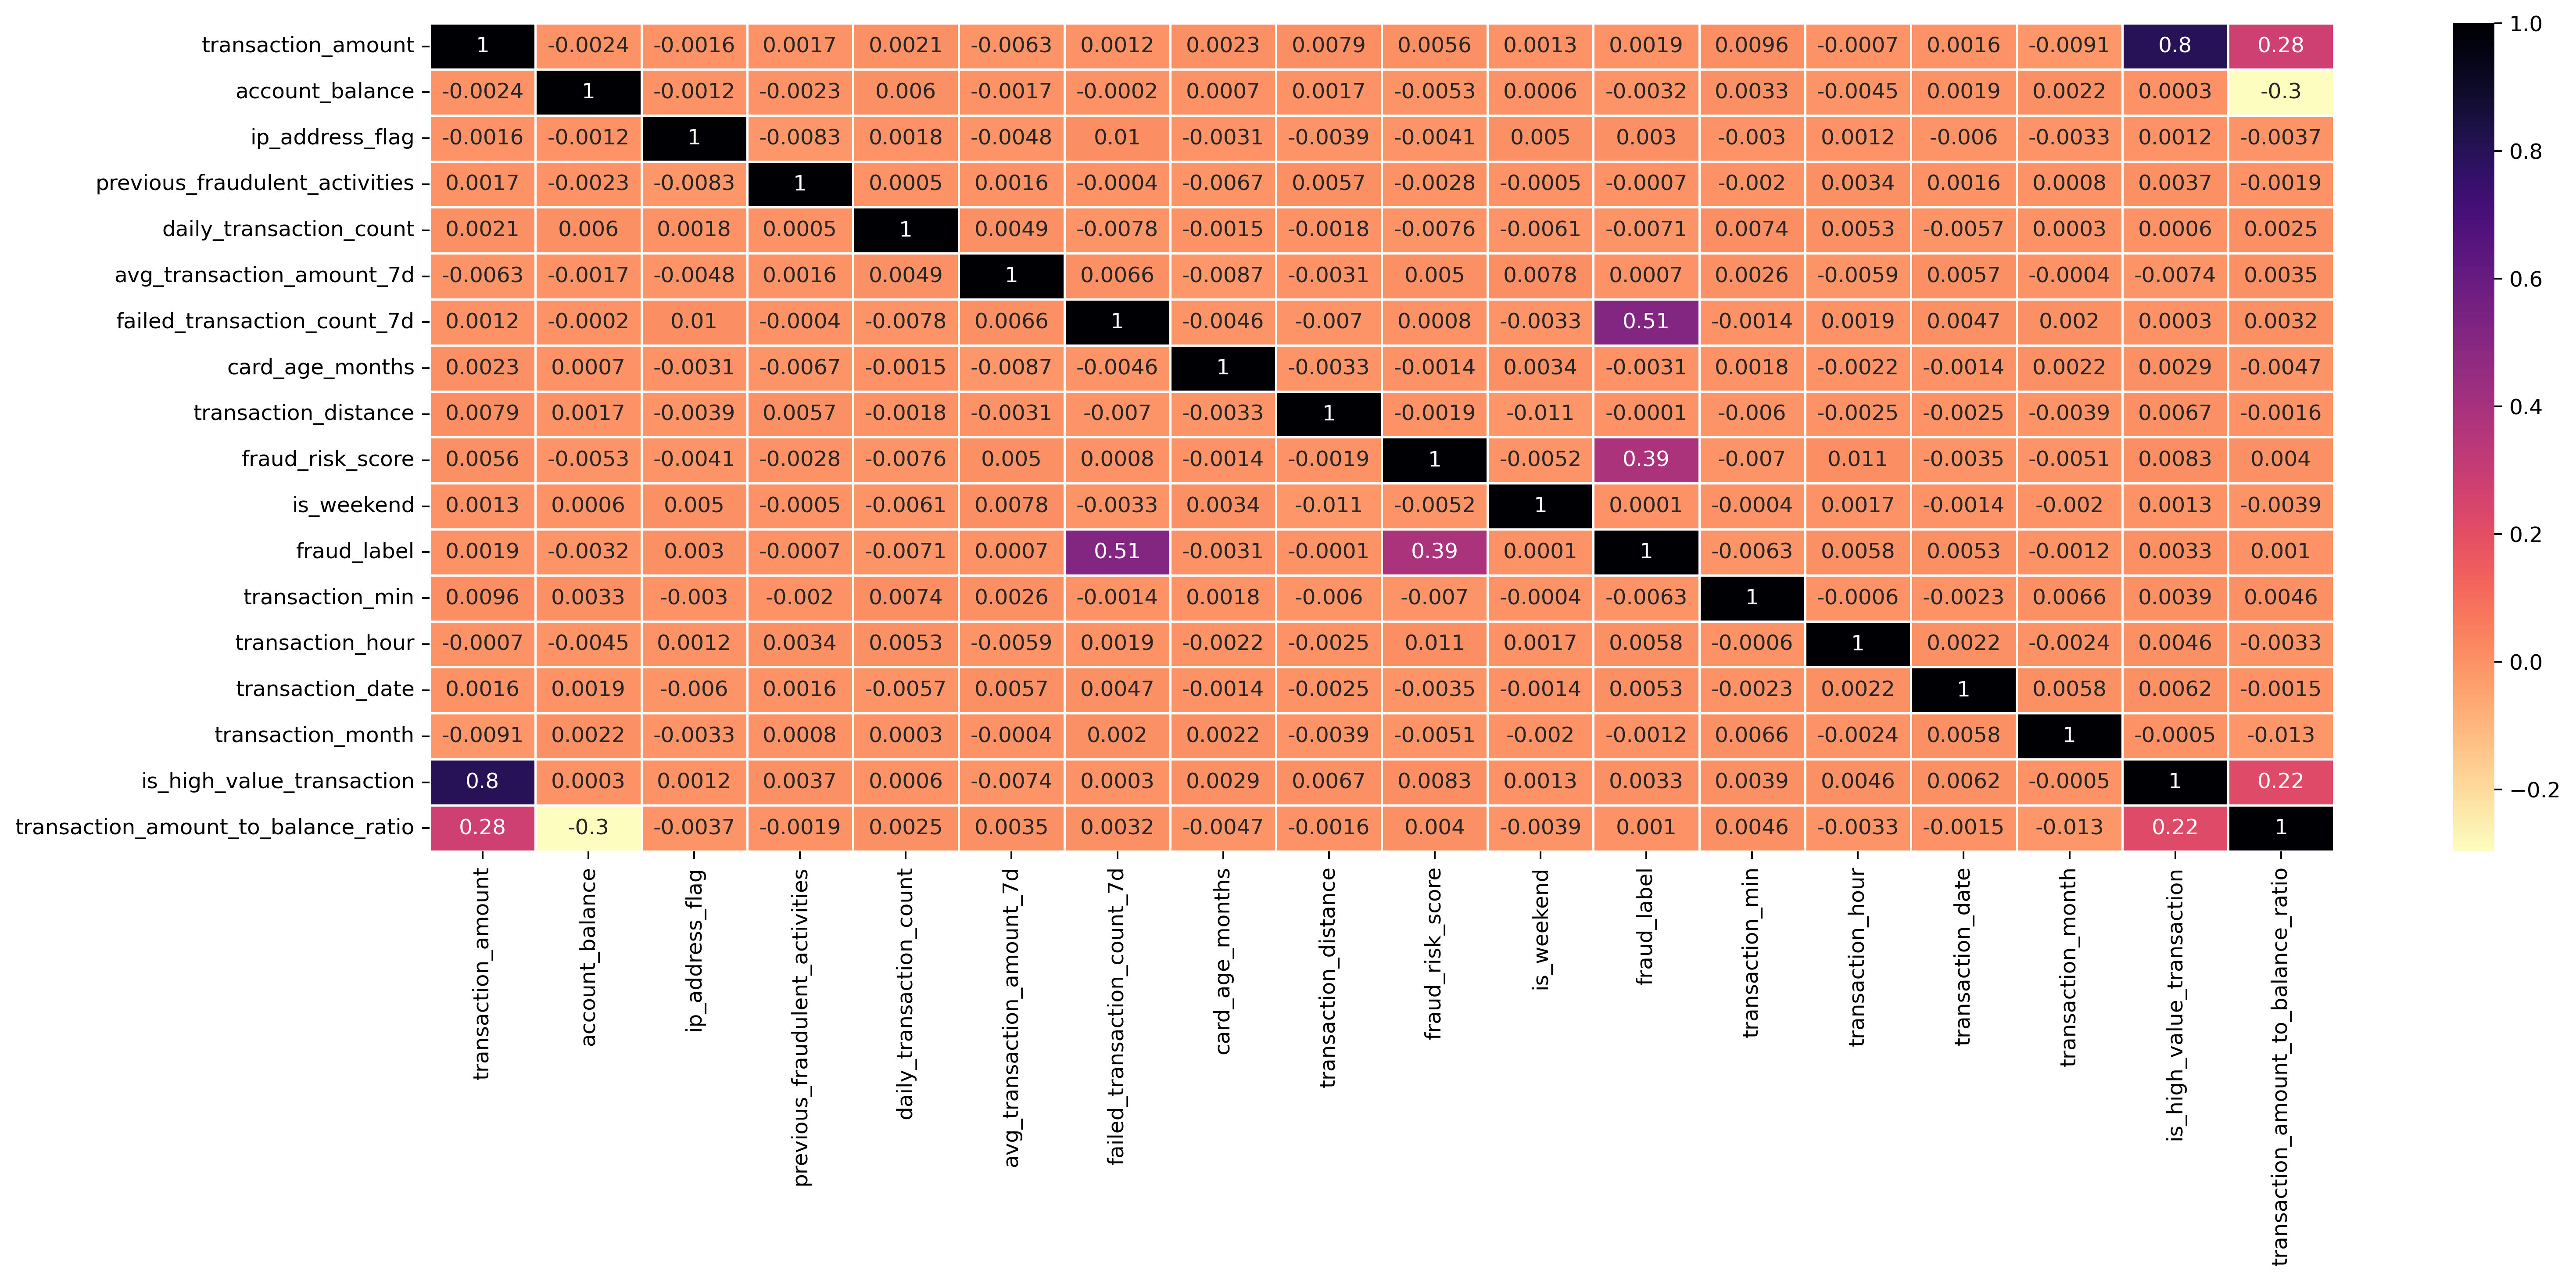

In [55]:
# Setting plot size
plt.figure(figsize = (20, 7), dpi = 350)

# Checking the correlation of each column with the fraud status
sns.heatmap(np.round(transactions_df.corr(numeric_only=True), 4), annot=True, linecolor='white', linewidths=1, cmap="magma_r");


## 5. Feature Selection

In [57]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



In [58]:
# Dropping unnecessary columns
cols_to_drop = ["transaction_id", "user_id", "transaction_date"]
transactions_df = transactions_df.drop(cols_to_drop, axis = 1)
transactions_df.head()

transaction_amount transaction_method  account_balance device_type  \
0               39.79                POS         93213.17      Laptop   
1                1.19      Bank Transfer         75725.25      Mobile   
2               28.96             Online          1588.96      Tablet   
3              254.32     ATM Withdrawal         76807.20      Tablet   
4               31.28                POS         92354.66      Mobile   

  transaction_location merchant_category  ip_address_flag  \
0               Sydney            Travel                0   
1             New York          Clothing                0   
2               Mumbai       Restaurants                0   
3             New York          Clothing                0   
4               Mumbai       Electronics                0   

   previous_fraudulent_activities  daily_transaction_count  \
0                               0                        7   
1                               0                       13   
2                               0                       14   
3                               0                        8   
4                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  is_high_value_transaction  \
0                19                  8                      False   
1                 4                  6                      False   
2                15                  6                      False   
3                 0                 12                       True   
4                23                 11                      False   

   transaction_amount_to_balance_ratio  
0                             0.000427  
1                             0.000016  
2                             0.018226  
3                             0.003311  
4                             0.000339

In [59]:
# Creating age categories for card age column
transactions_df['card_age_years'] = pd.cut(transactions_df['card_age_months'], bins=[0, 12, 60, 120, 250], labels=['0-1', '1-5', '5-10', '10+'])
transactions_df.head()

transaction_amount transaction_method  account_balance device_type  \
0               39.79                POS         93213.17      Laptop   
1                1.19      Bank Transfer         75725.25      Mobile   
2               28.96             Online          1588.96      Tablet   
3              254.32     ATM Withdrawal         76807.20      Tablet   
4               31.28                POS         92354.66      Mobile   

  transaction_location merchant_category  ip_address_flag  \
0               Sydney            Travel                0   
1             New York          Clothing                0   
2               Mumbai       Restaurants                0   
3             New York          Clothing                0   
4               Mumbai       Electronics                0   

   previous_fraudulent_activities  daily_transaction_count  \
0                               0                        7   
1                               0                       13   
2                               0                       14   
3                               0                        8   
4                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  is_high_value_transaction  \
0                19                  8                      False   
1                 4                  6                      False   
2                15                  6                      False   
3                 0                 12                       True   
4                23                 11                      False   

   transaction_amount_to_balance_ratio card_age_years  
0                             0.000427           5-10  
1                             0.000016            10+  
2                             0.018226            10+  
3                             0.003311           5-10  
4                             0.000339            10+

In [60]:
# Dropping card age month column
transactions_df = transactions_df.drop(['card_age_months'], axis = 1)
transactions_df.head()

transaction_amount transaction_method  account_balance device_type  \
0               39.79                POS         93213.17      Laptop   
1                1.19      Bank Transfer         75725.25      Mobile   
2               28.96             Online          1588.96      Tablet   
3              254.32     ATM Withdrawal         76807.20      Tablet   
4               31.28                POS         92354.66      Mobile   

  transaction_location merchant_category  ip_address_flag  \
0               Sydney            Travel                0   
1             New York          Clothing                0   
2               Mumbai       Restaurants                0   
3             New York          Clothing                0   
4               Mumbai       Electronics                0   

   previous_fraudulent_activities  daily_transaction_count  \
0                               0                        7   
1                               0                       13   
2                               0                       14   
3                               0                        8   
4                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  transaction_hour  \
0            0      Monday               30                19   
1            1   Wednesday                1                 4   
2            1     Tuesday               25                15   
3            1    Thursday               31                 0   
4            1    Saturday               44                23   

   transaction_month  is_high_value_transaction  \
0                  8                      False   
1                  6                      False   
2                  6                      False   
3                 12                       True   
4                 11                      False   

   transaction_amount_to_balance_ratio card_age_years  
0                             0.000427           5-10  
1                             0.000016            10+  
2                             0.018226            10+  
3                             0.003311           5-10  
4                             0.000339            10+

In [61]:
# Filtering categorical columns
categorical_feature_names = ["transaction_method", "device_type", "transaction_location","merchant_category", 
                         "card_type", "authentication_method", "day_of_week", "card_age_years"]

In [62]:
# Define features and target
TARGET_COL = "fraud_label"
features_df = transactions_df.drop(TARGET_COL, axis=1)
target_series = transactions_df[TARGET_COL]

In [63]:
# Splitting the data into train and test
X_train_df, X_test_df, y_train, y_test = train_test_split(features_df, target_series, test_size = 0.2, random_state = 101)


In [64]:
# Checking the number of instances for each class in the training set
print(f"Count of instances for the Negative Class: {len(y_train) - sum(y_train)}")
print(f"Count of instances for the Positive Class: {sum(y_train)}")

Count of instances for the Negative Class: 27185
Count of instances for the Positive Class: 12815


In [65]:
# Backward-compatible aliases (keeps downstream code working)
X_train = X_train_df
X_test = X_test_df
y_train = y_train
y_test = y_test

In [66]:
# Using OrdinalEncoder to encode the categorical data
encoder = OrdinalEncoder()
X_train.loc[:, categorical_feature_names] = encoder.fit_transform(X_train.loc[:, categorical_feature_names])
X_test.loc[:, categorical_feature_names] = encoder.transform(X_test.loc[:, categorical_feature_names])

In [67]:
# Using StandardScaler to scale the numerical data
scaler = StandardScaler()
X_train_df = scaler.fit_transform(X_train)
X_test_df = scaler.transform(X_test)

In [68]:
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [69]:
# Handling imbalanced data
from imblearn.over_sampling import SMOTE

In [70]:
# Using SMOTE to resample the data
smote_sampler = SMOTE(random_state=101)
X_train_resampled, y_train_resampled = smote_sampler.fit_resample(X_train, y_train)
(X_train_resampled.shape, y_train_resampled.shape)

((54370, 23), (54370,))

In [71]:
# Checking the number of instances for each class in the training set after resampling
print(f"Count of instances for the Negative Class: {len(y_train_resampled) - sum(y_train_resampled)}")
print(f"Count of instances for the Positive Class: {sum(y_train_resampled)}")

Count of instances for the Negative Class: 27185
Count of instances for the Positive Class: 27185


In [72]:
# Using SelectKBest to select best 15 features
selector = SelectKBest(score_func=f_classif , k=15)
selector.fit(X_train_resampled, y_train_resampled)

SelectKBest(k=15)

In [73]:
# Checking the importance scores of each feature
feat_scores = pd.Series(selector.scores_, index=features_df.columns).sort_values(ascending = False)
feat_scores

failed_transaction_count_7d            17080.353243
fraud_risk_score                       11210.493131
is_weekend                              1016.030000
previous_fraudulent_activities           378.980966
is_high_value_transaction                308.022891
ip_address_flag                          212.678030
daily_transaction_count                   84.095850
transaction_month                         68.837007
transaction_amount                        25.146049
transaction_amount_to_balance_ratio       13.504054
transaction_hour                          11.693060
transaction_min                            7.357814
device_type                                6.446836
transaction_location                       4.560752
transaction_method                         2.045379
authentication_method                      0.792549
day_of_week                                0.670268
merchant_category                          0.605085
transaction_distance                       0.324917
card_age_yea

**Observation**: 
Features with higher values, such as failed_transaction_count_7d, fraud_risk_score, and transaction_amount_to_balance_ratio, are the most significant in distinguishing between fraudulent and non-fraudulent transactions.

On the other hand, features like card_type, avg_transaction_amount_7d, and authentication_method have lower values, indicating that they contribute less to the prediction task.

In [75]:
# Checking the list of selected featuers
selected_cols = features_df.columns[selector.get_support()]
selected_cols

Index(['transaction_amount', 'transaction_method', 'device_type',
       'transaction_location', 'ip_address_flag',
       'previous_fraudulent_activities', 'daily_transaction_count',
       'failed_transaction_count_7d', 'fraud_risk_score', 'is_weekend',
       'transaction_min', 'transaction_hour', 'transaction_month',
       'is_high_value_transaction', 'transaction_amount_to_balance_ratio'],
      dtype='object')

In [76]:
# Transforming the training and testing sets
X_train_resampled = selector.transform(X_train_resampled)
X_test_df = selector.transform(X_test)

## 6. Model Execution

In [77]:
# Dictionary of model to be tested
models = {
    "LogisticRegression" : LogisticRegression(C=0.01, solver = "saga", class_weight="balanced", random_state=101),
    "SGDClassifier" : SGDClassifier(class_weight="balanced", learning_rate="adaptive", eta0=0.03, loss="log_loss", random_state=101),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=50, max_depth=7, class_weight="balanced", random_state=101),
    "AdaBoostClassifier" : AdaBoostClassifier(n_estimators=50, learning_rate=0.3, random_state=101),
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=50, max_depth = 7, random_state=101),
    "XGBClassifier" : XGBClassifier(n_estimators=50, max_depth=7, enable_categorical = True, random_state = 101)
}

In [78]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_classifier(model, X_train, y_train, X_test, y_test, cv):
    """Train a classifier and return a dictionary of evaluation metrics."""
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_score) if y_score is not None else np.nan,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
    }

    # Cross-validation on the training data only (more standard than CV on test set)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc")
    metrics["Avg Training CV Score"] = float(np.mean(cv_scores))
    metrics["Training CV Score Std"] = float(np.std(cv_scores))

    return metrics

# Store model performances
model_performance = {}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Training: {model_name}")
    model_performance[model_name] = evaluate_classifier(
        model=model,
        X_train=X_train_resampled,
        y_train=y_train_resampled,
        X_test=X_test_df,
        y_test=y_test,
        cv=skf,
    )
    print(f"Completed: {model_name}\n")

Training: LogisticRegression


C:\Users\atulm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\atulm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\atulm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\atulm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\atulm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\atulm\

Completed: LogisticRegression

Training: SGDClassifier
Completed: SGDClassifier

Training: KNeighborsClassifier
Completed: KNeighborsClassifier

Training: RandomForestClassifier
Completed: RandomForestClassifier

Training: AdaBoostClassifier
Completed: AdaBoostClassifier

Training: GradientBoostingClassifier
Completed: GradientBoostingClassifier

Training: XGBClassifier
Completed: XGBClassifier



## 7. Results

In [80]:
# Checking the performance of different models
model_performance_df = pd.DataFrame(model_performance)
model_performance_df

LogisticRegression  SGDClassifier  \
Accuracy                         0.718400       0.793100   
Precision                        0.547828       0.657356   
Recall                           0.767835       0.759840   
F1-Score                         0.639437       0.704892   
ROC AUC                          0.818875       0.890757   
TP                            2497.000000    2471.000000   
TN                            4687.000000    5460.000000   
FP                            2061.000000    1288.000000   
FN                             755.000000     781.000000   
Avg Training CV Score            0.810846       0.884369   
Training CV Score Std            0.009464       0.002047   

                       KNeighborsClassifier  RandomForestClassifier  \
Accuracy                           0.584900                1.000000   
Precision                          0.402176                1.000000   
Recall                             0.568266                1.000000   
F1-Score                           0.471008                1.000000   
ROC AUC                            0.605629                1.000000   
TP                              1848.000000             3252.000000   
TN                              4001.000000             6748.000000   
FP                              2747.000000                0.000000   
FN                              1404.000000                0.000000   
Avg Training CV Score              0.675662                0.995189   
Training CV Score Std              0.007028                0.000966   

                       AdaBoostClassifier  GradientBoostingClassifier  \
Accuracy                         0.999000                    1.000000   
Precision                        0.996934                    1.000000   
Recall                           1.000000                    1.000000   
F1-Score                         0.998465                    1.000000   
ROC AUC                          1.000000                    1.000000   
TP                            3252.000000                 3252.000000   
TN                            6738.000000                 6748.000000   
FP                              10.000000                    0.000000   
FN                               0.000000                    0.000000   
Avg Training CV Score            0.993195                    0.999601   
Training CV Score Std            0.000825                    0.000184   

                       XGBClassifier  
Accuracy                    0.998800  
Precision                   0.998768  
Recall                      0.997540  
F1-Score                    0.998154  
ROC AUC                     0.999995  
TP                       3244.000000  
TN                       6744.000000  
FP                          4.000000  
FN                          8.000000  
Avg Training CV Score       0.999640  
Training CV Score Std       0.000145

## Conclusion

The results clearly demonstrate significant performance differences across the evaluated classification models, highlighting the strengths of ensemble-based approaches for fraud detection tasks.

**Ensemble models**—specifically **Random Forest, Gradient Boosting, AdaBoost, and XGBoost**—consistently outperformed all other methods across every evaluation metric. Random Forest and Gradient Boosting achieved **perfect classification performance**, with Accuracy, Precision, Recall, F1-Score, and ROC AUC all equal to 1.0, and zero false positives or false negatives. Their extremely high and stable cross-validation scores further indicate strong generalization and minimal risk of overfitting. XGBoost closely followed, delivering near-perfect results with only a small number of misclassifications, while maintaining an exceptionally high ROC AUC

**AdaBoost** also demonstrated excellent performance, achieving near-perfect accuracy and recall with only a minimal number of false positives. Its strong cross-validation scores suggest that it remains a highly reliable option, particularly when computational efficiency is a consideration.

In contrast, **linear models** such as **Logistic Regression** and **SGDClassifier** showed moderate performance. While they maintained reasonable recall, they suffered from lower precision and higher false-positive rates, limiting their effectiveness in scenarios where incorrect fraud flags can negatively impact customer experience. These models remain useful primarily in cases where interpretability, simplicity, or rapid training is required.

**K-Nearest Neighbors (KNN)** performed the weakest among all evaluated models, exhibiting lower accuracy, precision, and ROC AUC, along with a high number of false positives and false negatives. This indicates limited suitability for high-stakes fraud detection tasks without further tuning or feature optimization.

Overall, the findings strongly support the use of **ensemble learning methods** as the preferred solution for fraud detection. Their ability to capture complex patterns, maintain high recall without sacrificing precision, and generalize effectively makes them well-suited for real-world financial risk mitigation systems. 